In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Shin\Desktop\for-kr-pjt\NoonMap-Project\data\file_data\수위_api.csv')

In [3]:
df

Unnamed: 0  station_code    obs_date     WL
0             52561       1007604  2016123123  146.0
1             52562       1007604  2016123122  146.0
2             52563       1007604  2016123121  146.0
3             52564       1007604  2016123120  146.0
4             52565       1007604  2016123119  146.0
...             ...           ...         ...    ...
7709754    13008999       1201654  2020010204  256.0
7709755    13009000       1201654  2020010203  258.0
7709756    13009001       1201654  2020010202  253.0
7709757    13009002       1201654  2020010201  259.0
7709758    13009004       1201654  2020010123  260.0

[7709759 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7709759 entries, 0 to 7709758
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   station_code  int64  
 2   obs_date      int64  
 3   WL            float64
dtypes: float64(1), int64(3)
memory usage: 235.3 MB


In [5]:
df.isna().sum()

Unnamed: 0      0
station_code    0
obs_date        0
WL              0
dtype: int64

# 'obs_date' 열의 관측값 형식 변환

In [6]:
from datetime import datetime

In [7]:
df['obs_date'] = pd.to_datetime(df['obs_date'], format='%Y%m%d%H')

In [8]:
df

Unnamed: 0  station_code            obs_date     WL
0             52561       1007604 2016-12-31 23:00:00  146.0
1             52562       1007604 2016-12-31 22:00:00  146.0
2             52563       1007604 2016-12-31 21:00:00  146.0
3             52564       1007604 2016-12-31 20:00:00  146.0
4             52565       1007604 2016-12-31 19:00:00  146.0
...             ...           ...                 ...    ...
7709754    13008999       1201654 2020-01-02 04:00:00  256.0
7709755    13009000       1201654 2020-01-02 03:00:00  258.0
7709756    13009001       1201654 2020-01-02 02:00:00  253.0
7709757    13009002       1201654 2020-01-02 01:00:00  259.0
7709758    13009004       1201654 2020-01-01 23:00:00  260.0

[7709759 rows x 4 columns]

# 수위 테이블과 수위 관측소 테이블 병합

In [9]:
df_station = pd.read_csv(r'C:\Users\Shin\Desktop\for-kr-pjt\NoonMap-Project\data\file_data\수위_관측소.csv')

In [10]:
merge_df = pd.merge(df_station, df, on='station_code')

In [11]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709759 entries, 0 to 7709758
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0_x  int64         
 1   station_code  int64         
 2   station_name  object        
 3   address       object        
 4   etc_address   object        
 5   longitude     object        
 6   latitude      object        
 7   location      object        
 8   Unnamed: 0_y  int64         
 9   obs_date      datetime64[ns]
 10  WL            float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 705.8+ MB


In [12]:
merge_df.drop(columns = ["Unnamed: 0_x", "longitude", "latitude", "Unnamed: 0_y"], axis=1, inplace=True)

In [13]:
merge_df

station_code station_name      address etc_address  \
0             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
2             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
3             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
4             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
...               ...          ...          ...         ...   
7709754       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7709755       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7709756       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7709757       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7709758       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   

                                        location            obs_date     WL  
0        [37.10666666666667, 127.43361111111112] 2016-12-31 23:00:00  146.0  
1        [37.10666666666667, 127.43361111111112] 2016-12-31 22:00:00  146.0  
2        [37.10666666666667, 127.43361111111112] 2016-12-31 21:00:00  146.0  
3        [37.10666666666667, 127.43361111111112] 2016-12-31 20:00:00  146.0  
4        [37.10666666666667, 127.43361111111112] 2016-12-31 19:00:00  146.0  
...                                          ...                 ...    ...  
7709754  [37.56111111111111, 126.60277777777777] 2020-01-02 04:00:00  256.0  
7709755  [37.56111111111111, 126.60277777777777] 2020-01-02 03:00:00  258.0  
7709756  [37.56111111111111, 126.60277777777777] 2020-01-02 02:00:00  253.0  
7709757  [37.56111111111111, 126.60277777777777] 2020-01-02 01:00:00  259.0  
7709758  [37.56111111111111, 126.60277777777777] 2020-01-01 23:00:00  260.0  

[7709759 rows x 7 columns]

In [38]:
merge_df.to_csv('수위_수위관측소_매칭.csv')

# EDA

In [14]:
import missingno as mino

<AxesSubplot:>

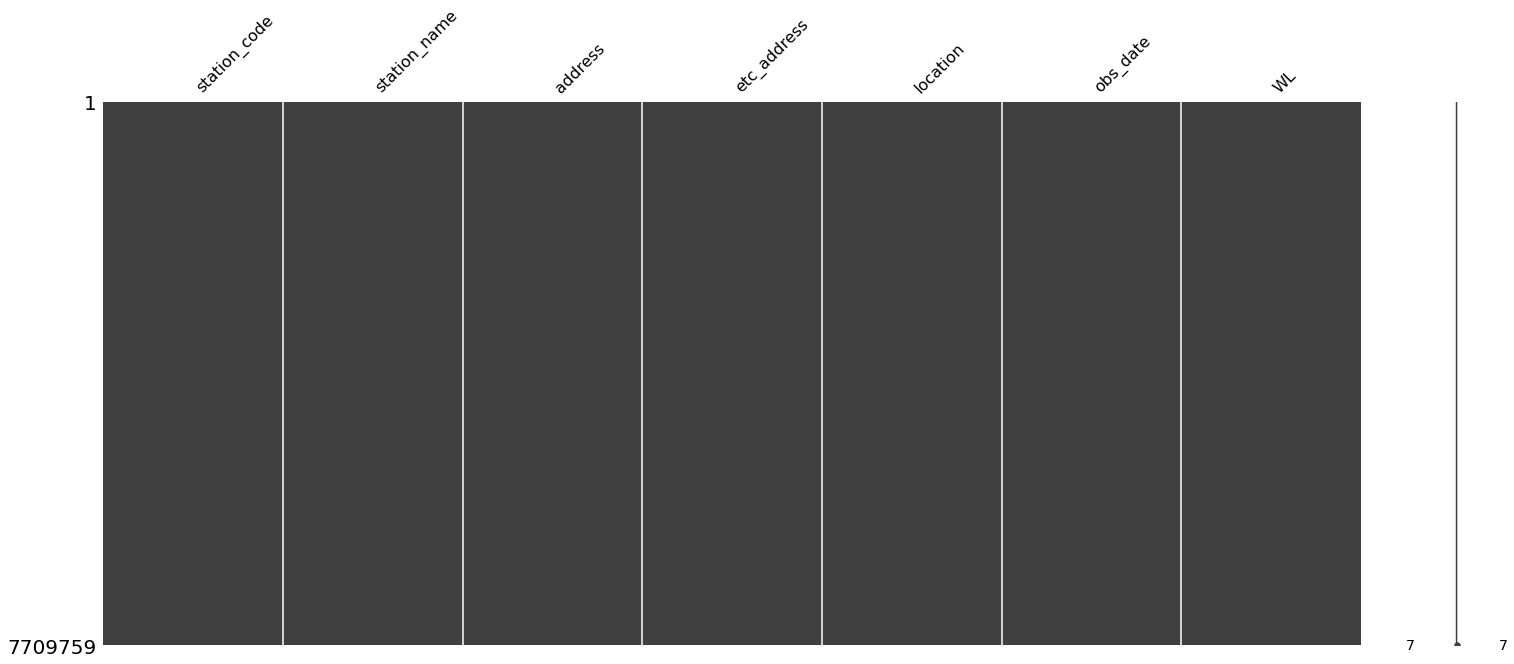

In [15]:
mino.matrix(merge_df) # 결측값 재확인

In [16]:
merge_df.corr()

station_code        WL
station_code      1.000000 -0.139427
WL               -0.139427  1.000000

In [18]:
import seaborn as sns

<AxesSubplot:>

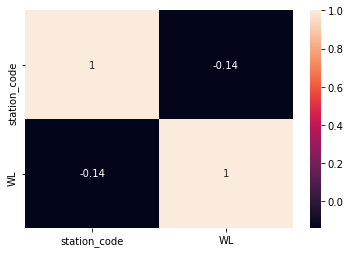

In [19]:
sns.heatmap(merge_df.corr(), annot=True)

In [20]:
merge_df.groupby('station_code').agg(['min', 'max'])['WL']

min    max
station_code              
1007604         0.0  632.0
1007605        70.0  834.0
1007615        41.0  740.0
1007617       -50.0  622.0
1007620      -166.0  491.0
...             ...    ...
1201620      -531.0  834.0
1201651         0.0  397.0
1201652      -498.0  492.0
1201653      -529.0  538.0
1201654      -506.0  521.0

[120 rows x 2 columns]

In [21]:
merge_df.groupby('station_code').count()

station_name  address  etc_address  location  obs_date     WL
station_code                                                               
1007604              33257    33257        33257     33257     33257  33257
1007605              90638    90638        90638     90638     90638  90638
1007615              92044    92044        92044     92044     92044  92044
1007617              88855    88855        88855     88855     88855  88855
1007620              92228    92228        92228     92228     92228  92228
...                    ...      ...          ...       ...       ...    ...
1201620              90090    90090        90090     90090     90090  90090
1201651              23223    23223        23223     23223     23223  23223
1201652              23229    23229        23229     23229     23229  23229
1201653              23230    23230        23230     23230     23230  23230
1201654              23259    23259        23259     23259     23259  23259

[120 rows x 6 columns]

In [22]:
from matplotlib import pyplot

In [23]:
pyplot.rcParams["figure.figsize"] = (20, 10)

<AxesSubplot:xlabel='station_code'>

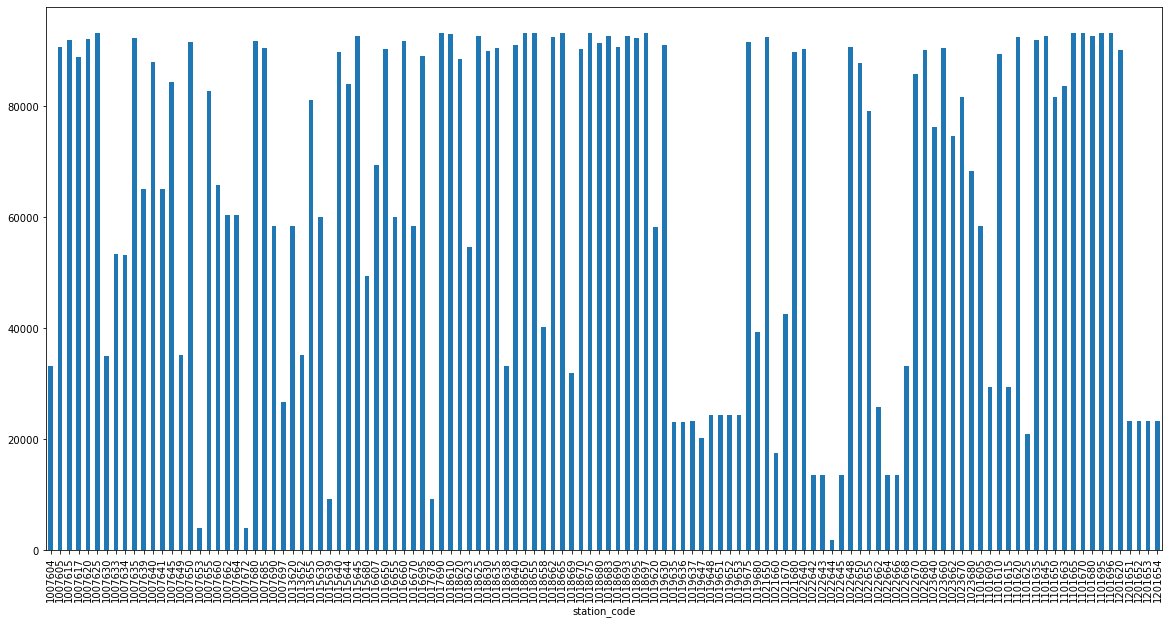

In [24]:
merge_df.groupby('station_code').count()['WL'].plot.bar() # 관측 수가 현저히 적은 관측소들이 있음

In [25]:
len(merge_df.groupby('station_code'))

120

In [26]:
station_code_list = pd.unique(merge_df['station_code']).tolist()

In [29]:
df_list = [merge_df[merge_df['station_code']==i] for i in station_code_list]

In [35]:
for i in range(len(df_list)):
    df_list[i] = df_list[i].sort_values(['obs_date'])

In [36]:
df_list[0]

station_code station_name      address etc_address  \
1270        1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1269        1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1268        1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1267        1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1266        1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
...             ...          ...          ...         ...   
27546       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
27545       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
27544       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
27543       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
27542       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   

                                      location            obs_date     WL  
1270   [37.10666666666667, 127.43361111111112] 2016-11-09 01:00:00  145.0  
1269   [37.10666666666667, 127.43361111111112] 2016-11-09 02:00:00  145.0  
1268   [37.10666666666667, 127.43361111111112] 2016-11-09 03:00:00  145.0  
1267   [37.10666666666667, 127.43361111111112] 2016-11-09 04:00:00  146.0  
1266   [37.10666666666667, 127.43361111111112] 2016-11-09 05:00:00  146.0  
...                                        ...                 ...    ...  
27546  [37.10666666666667, 127.43361111111112] 2020-08-26 21:00:00  198.0  
27545  [37.10666666666667, 127.43361111111112] 2020-08-26 22:00:00  200.0  
27544  [37.10666666666667, 127.43361111111112] 2020-08-26 23:00:00  202.0  
27543  [37.10666666666667, 127.43361111111112] 2020-08-27 00:00:00  204.0  
27542  [37.10666666666667, 127.43361111111112] 2020-08-27 01:00:00  206.0  

[33257 rows x 7 columns]

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.rc('font', family='Malgun Gothic')

In [33]:
station_name_list = pd.unique(merge_df['station_name']).tolist()

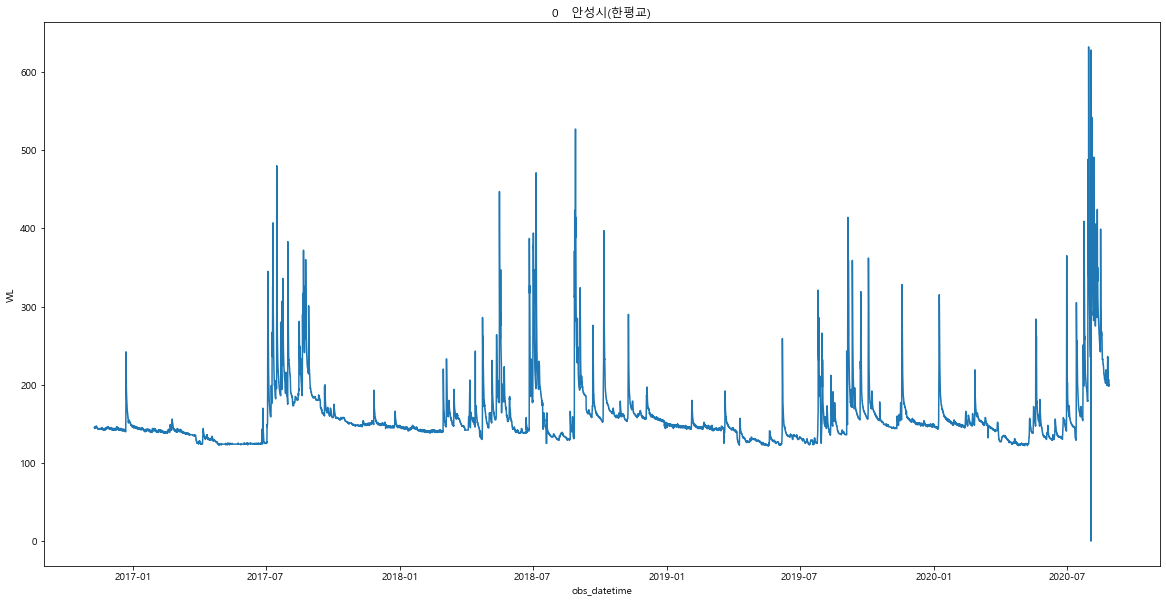

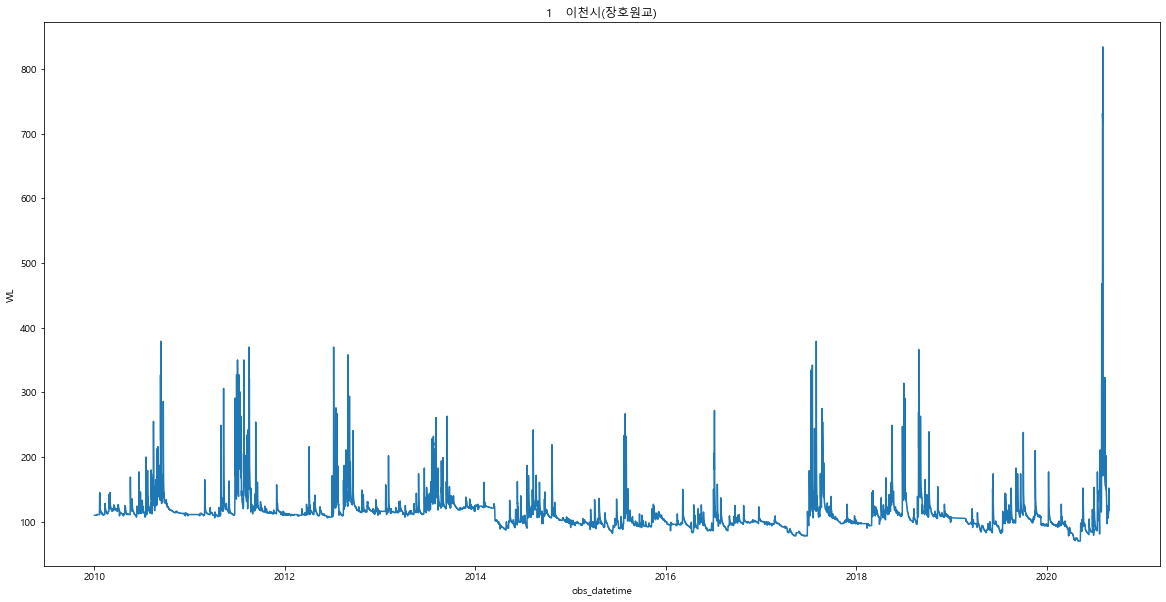

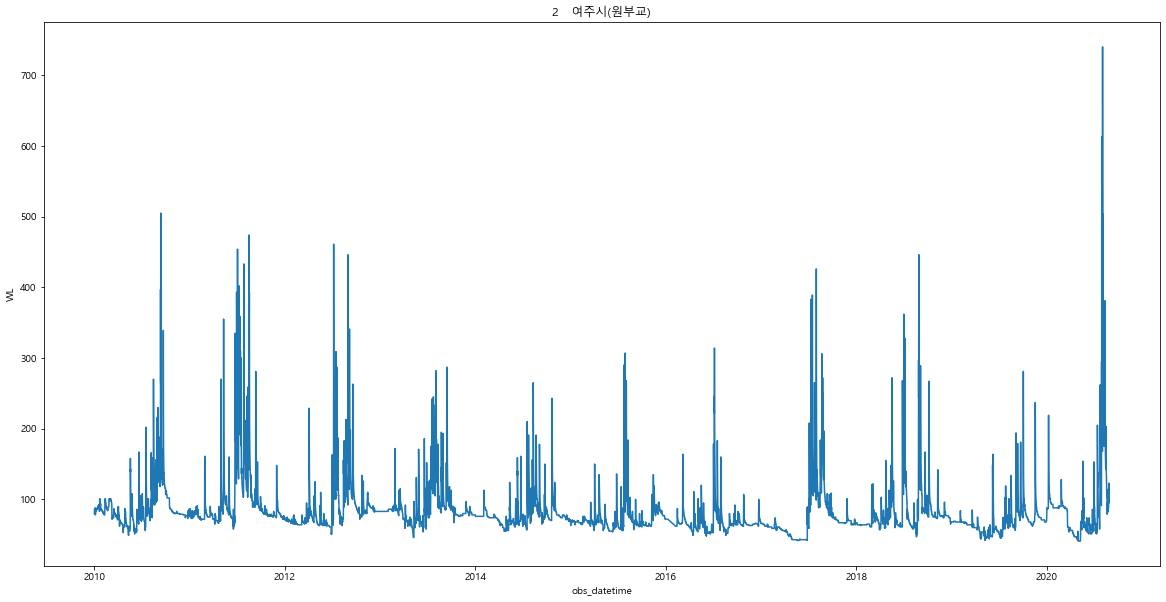

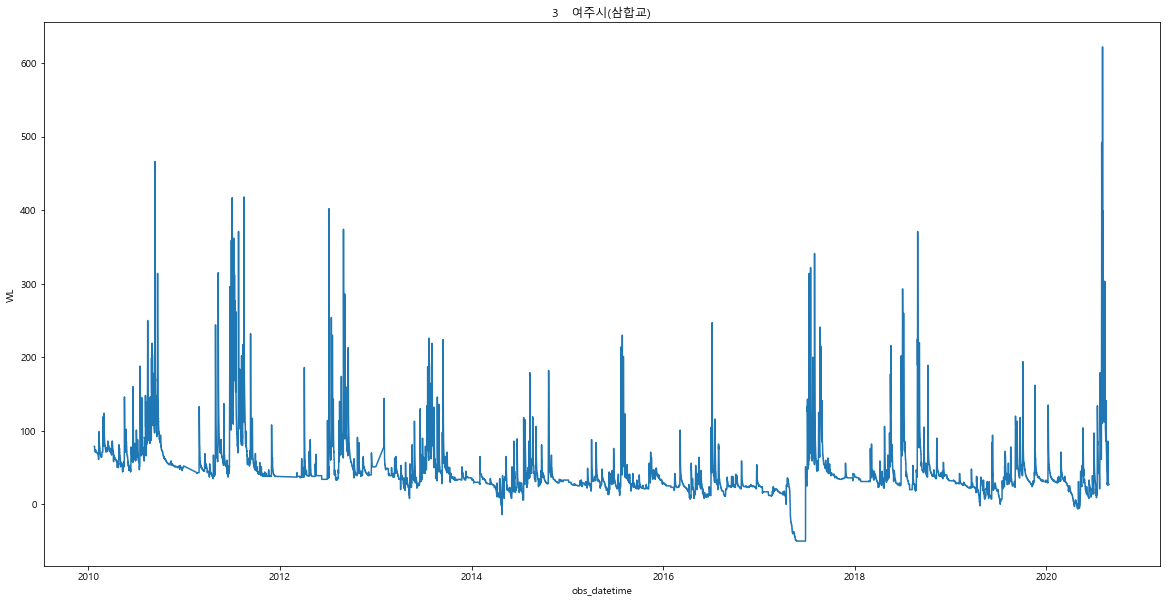

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


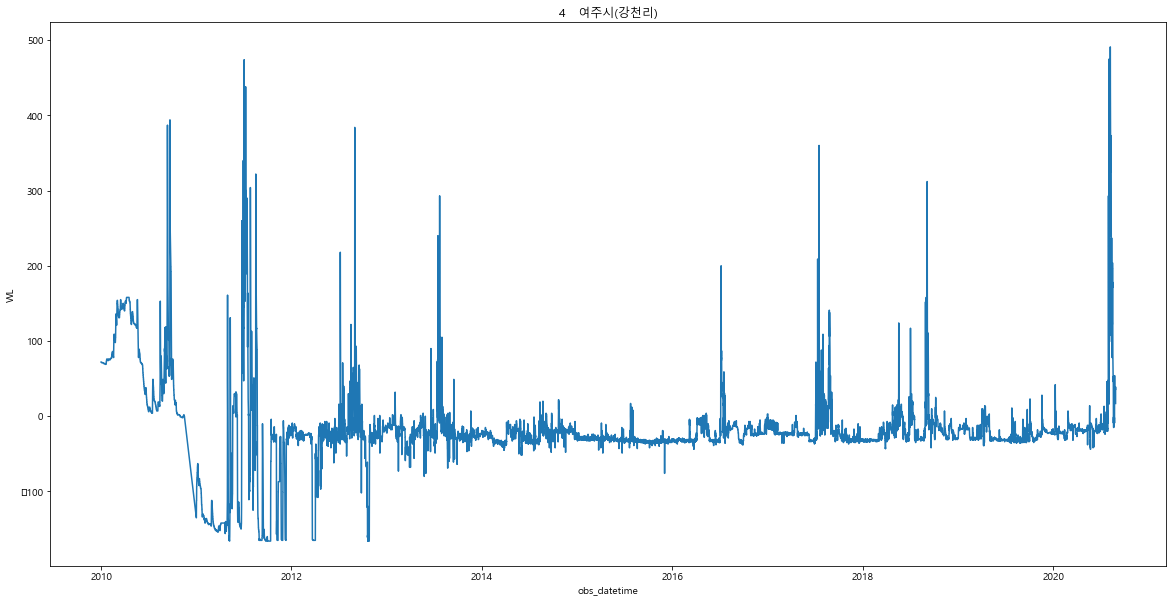

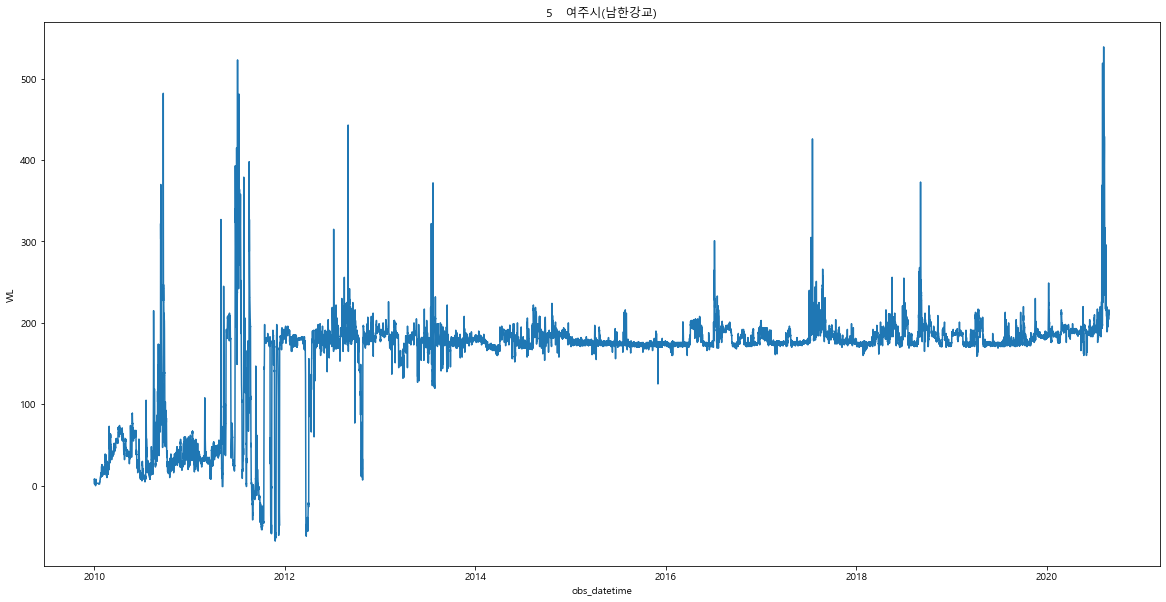

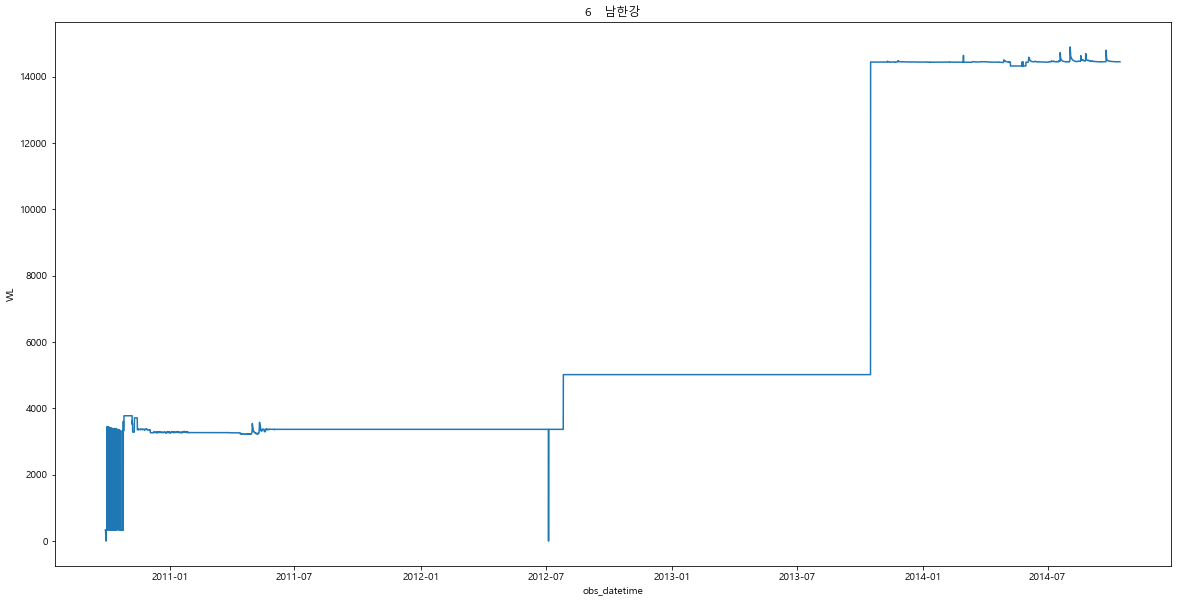

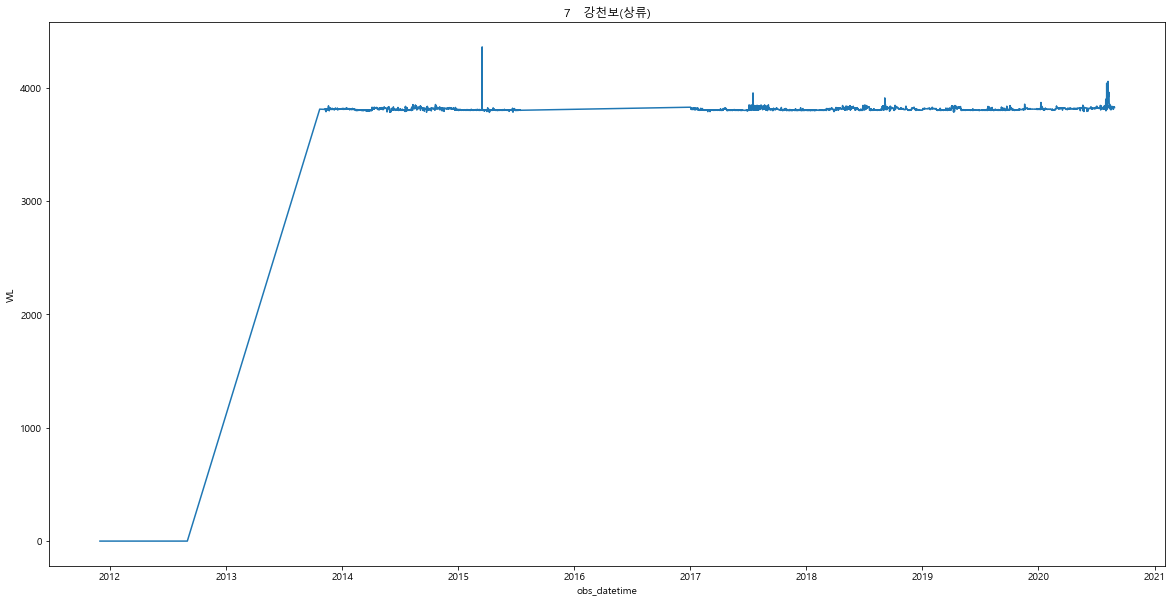

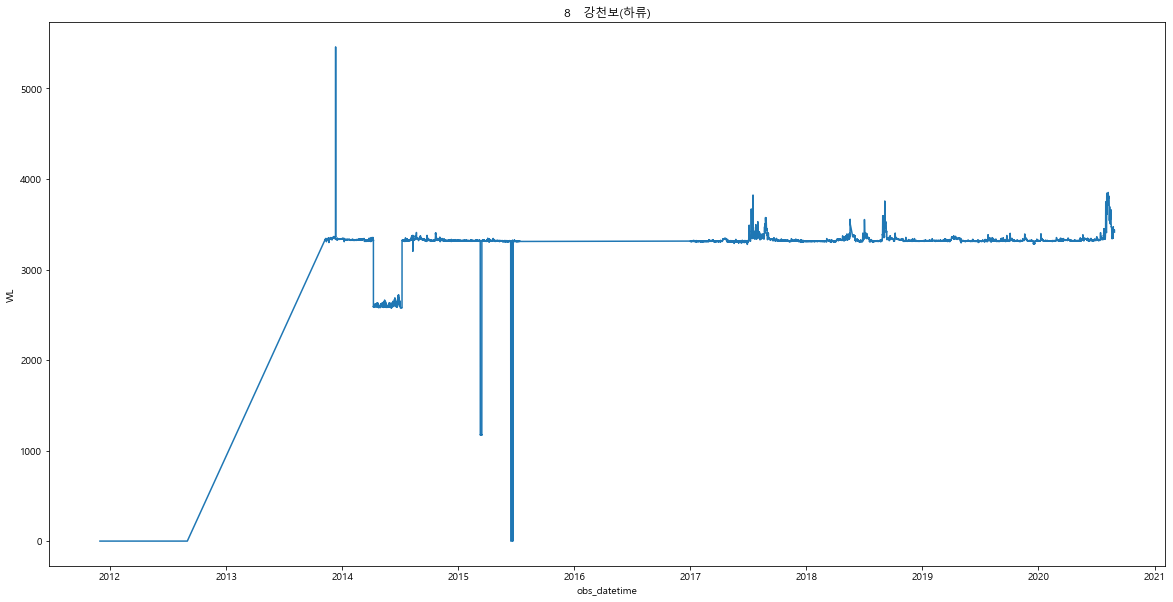

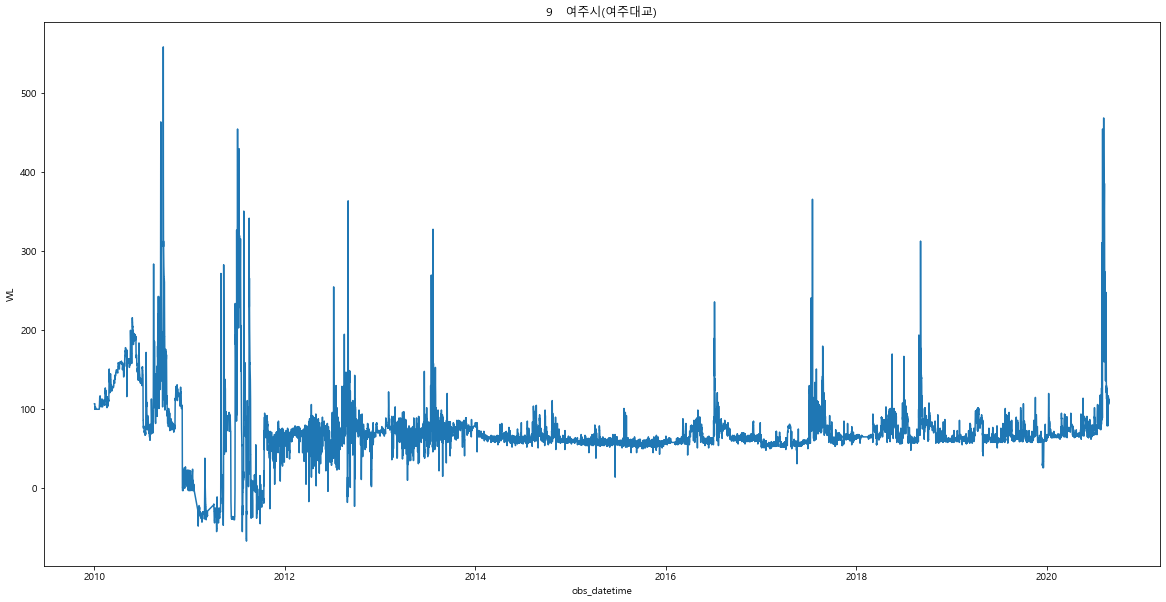

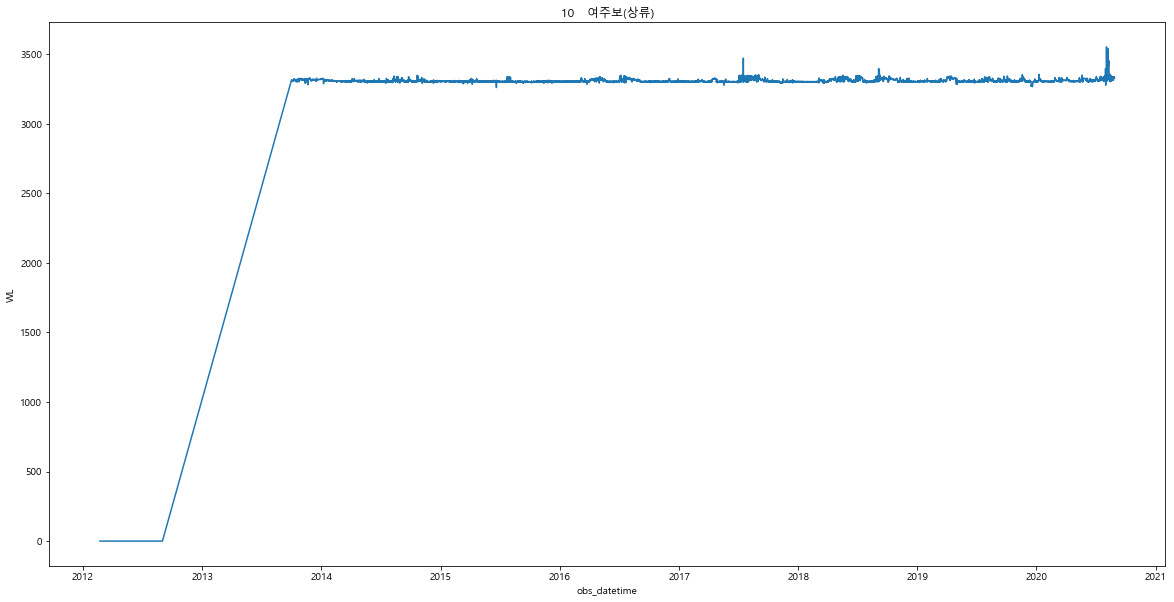

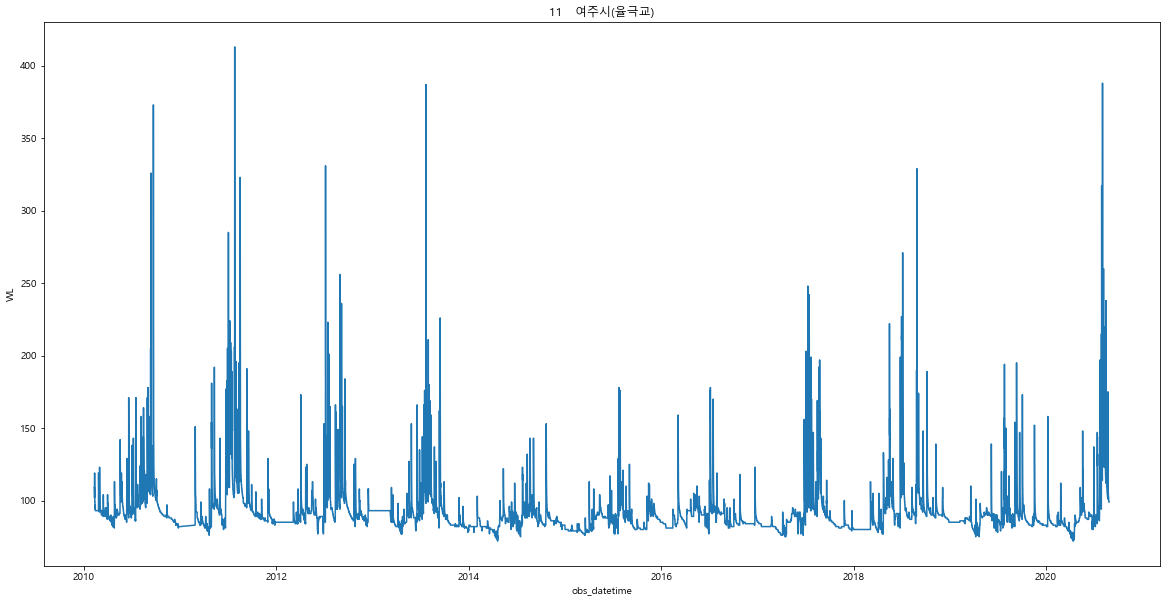

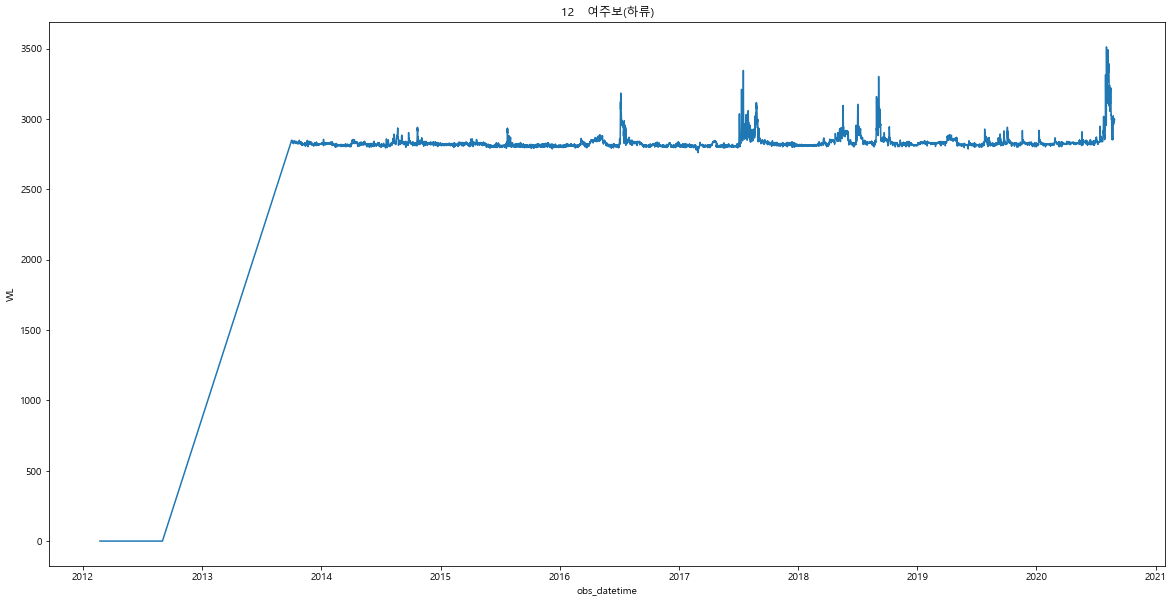

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


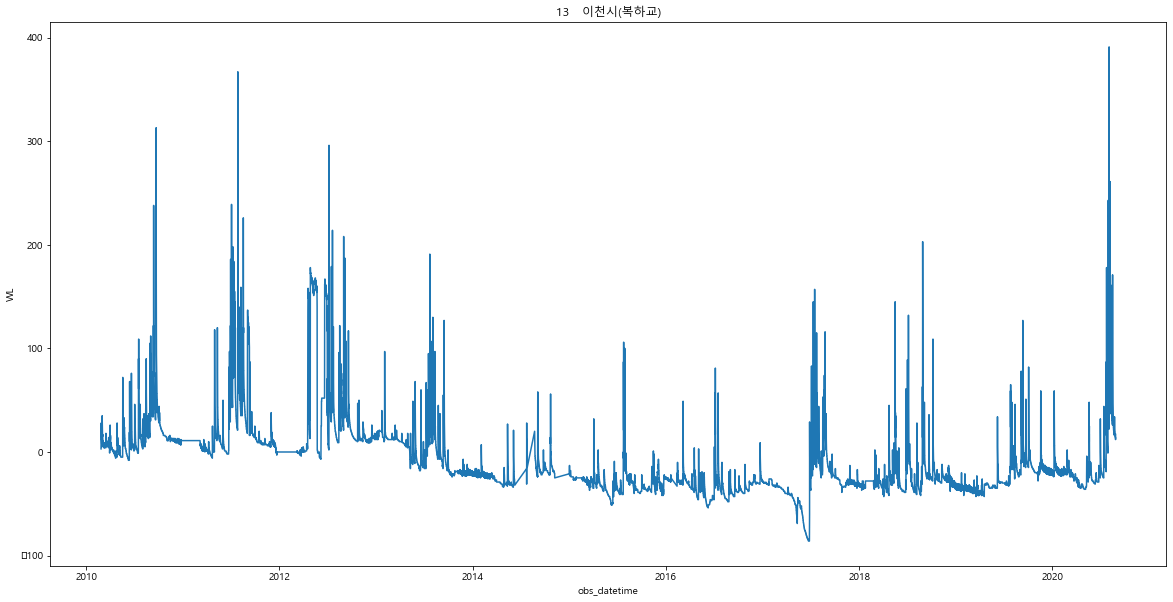

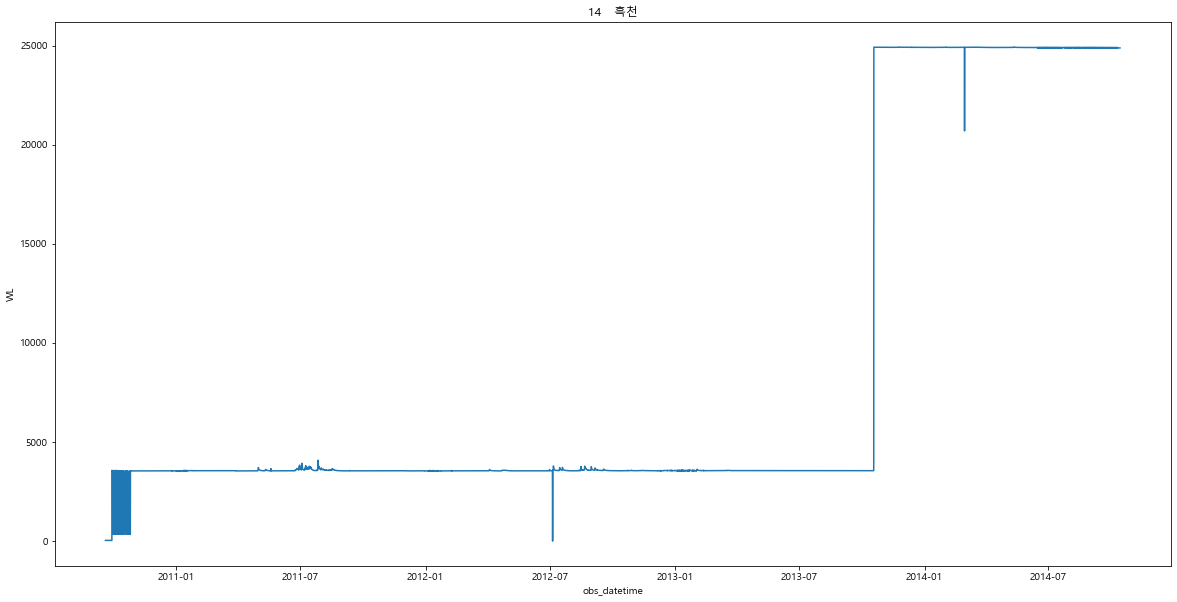

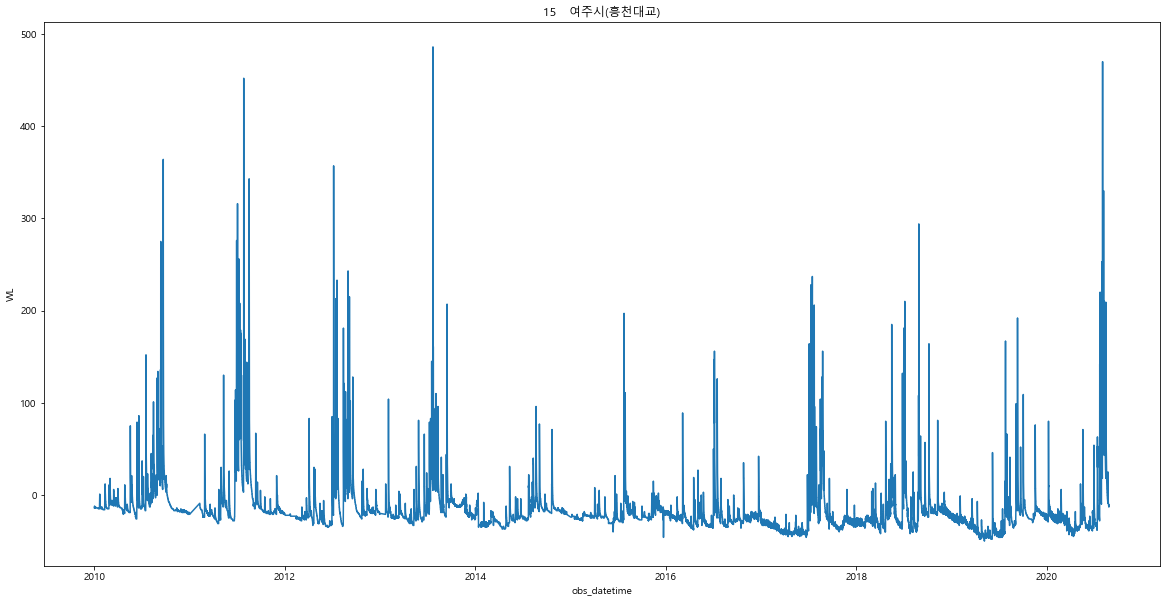

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


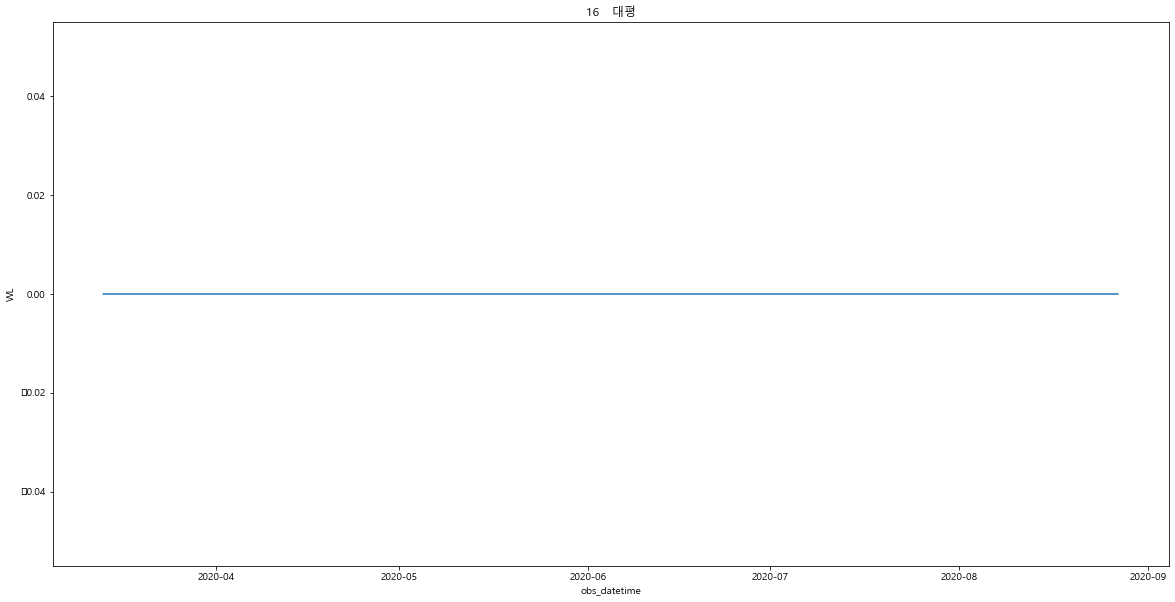

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


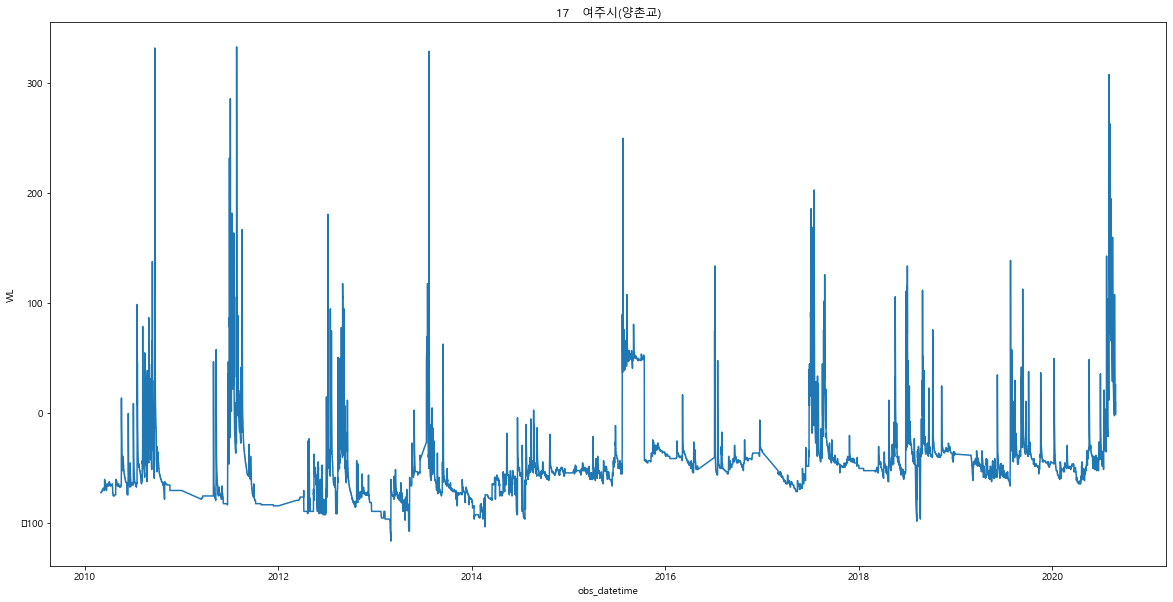

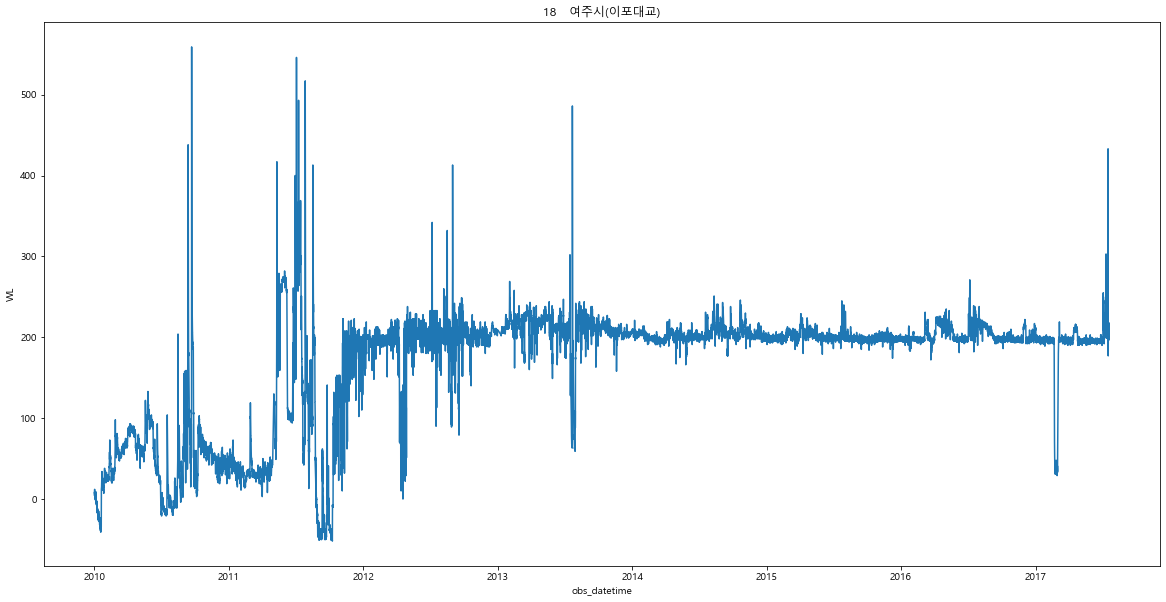

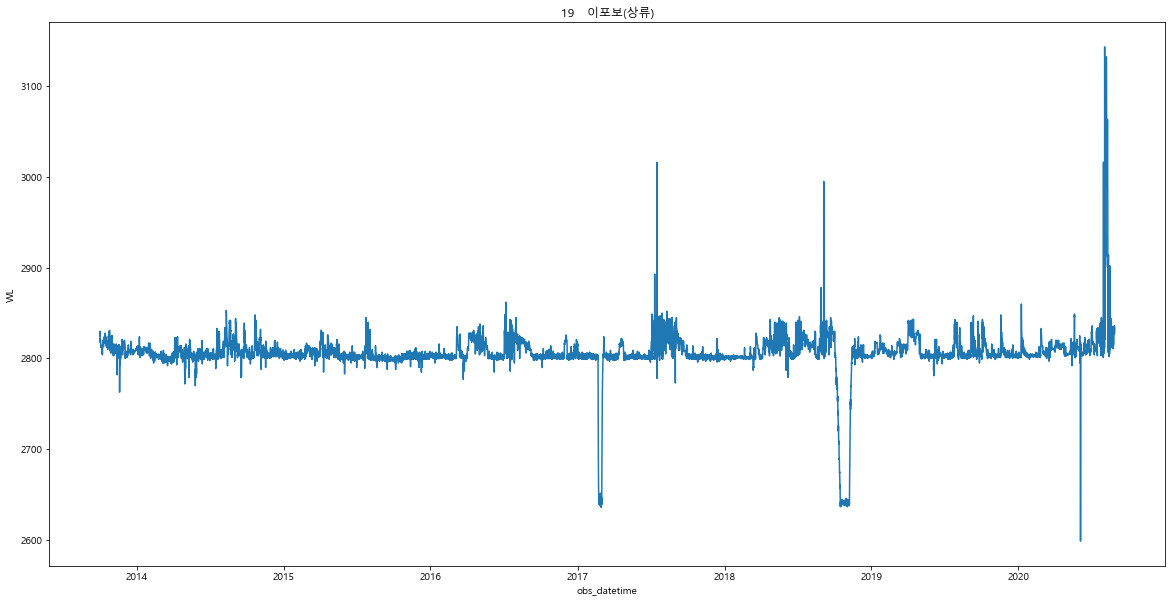

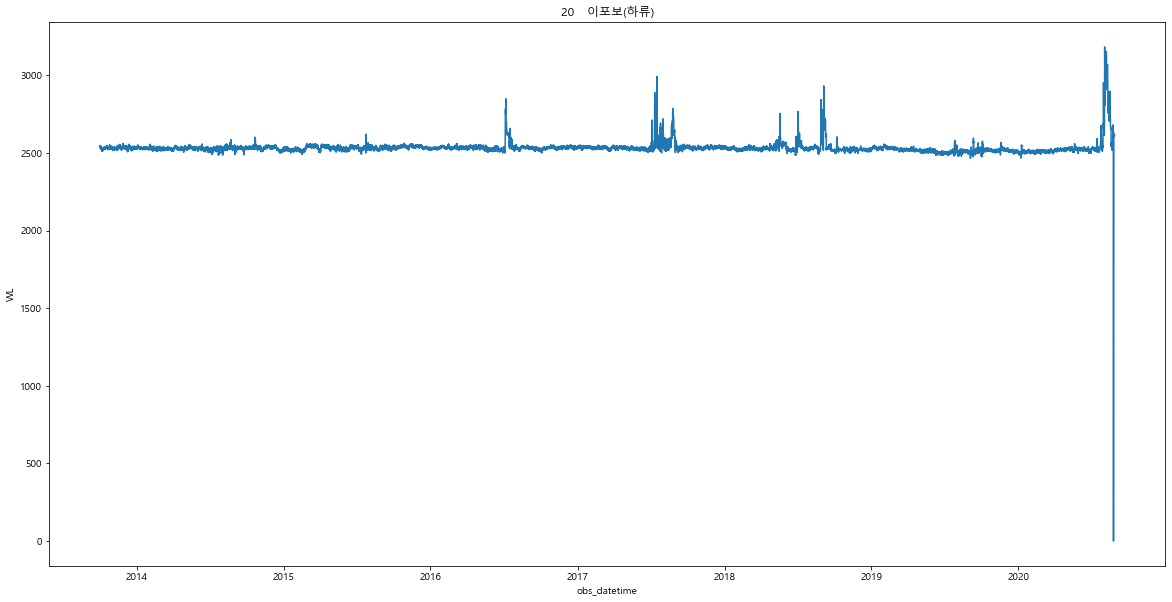

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


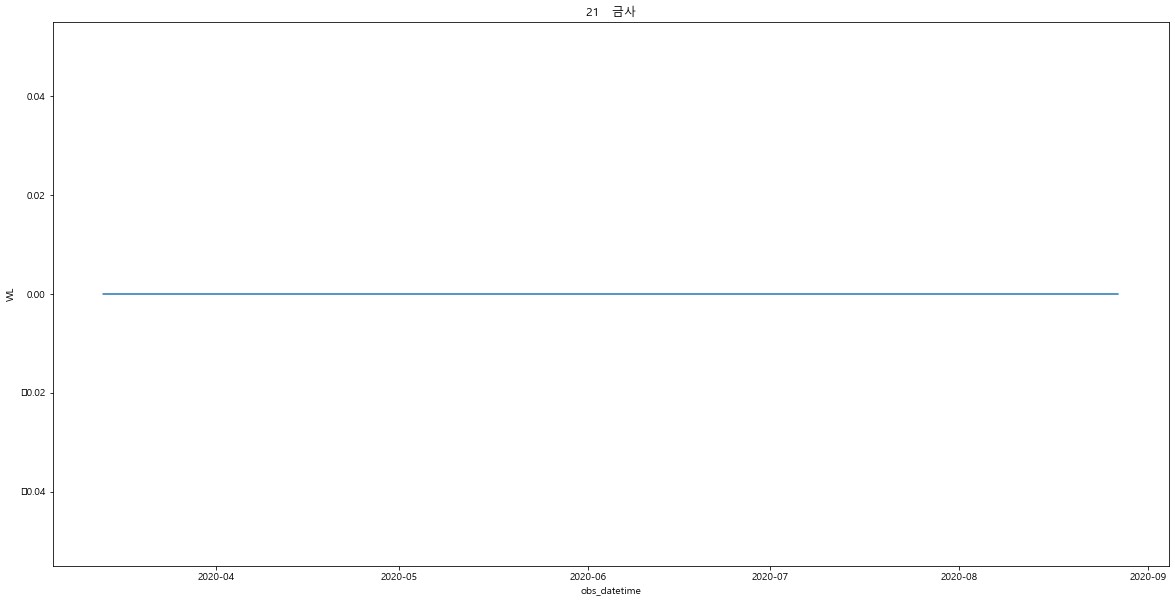

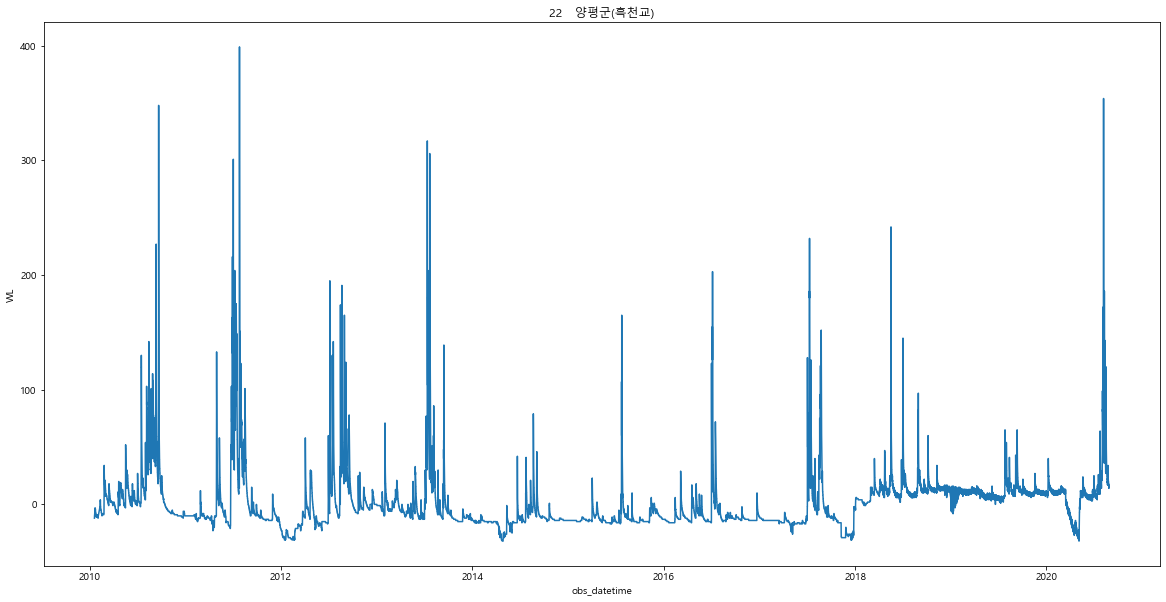

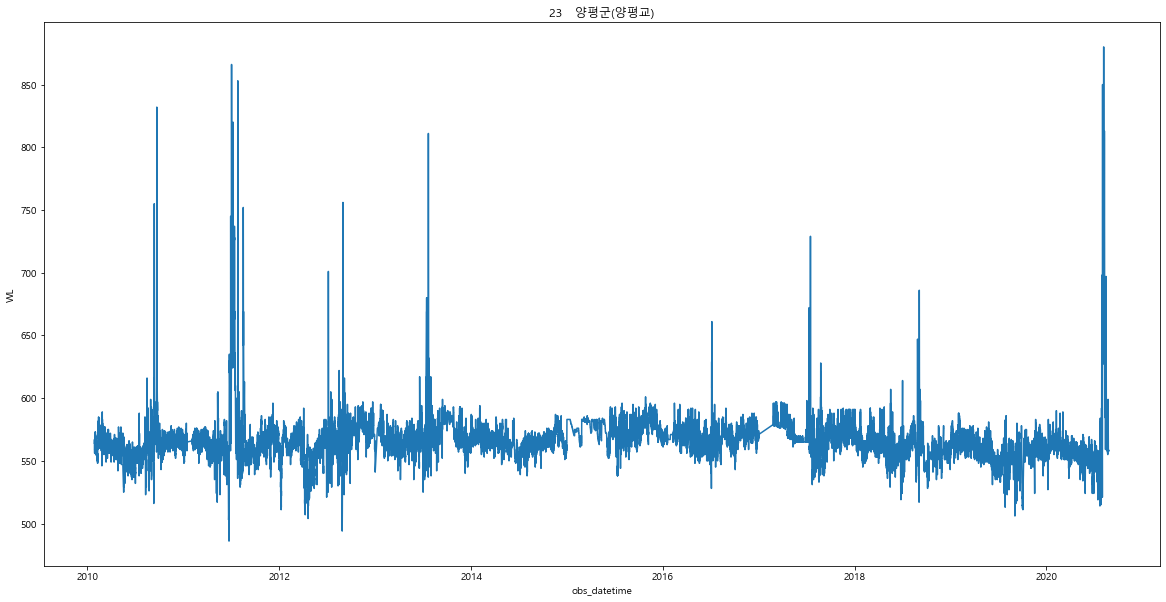

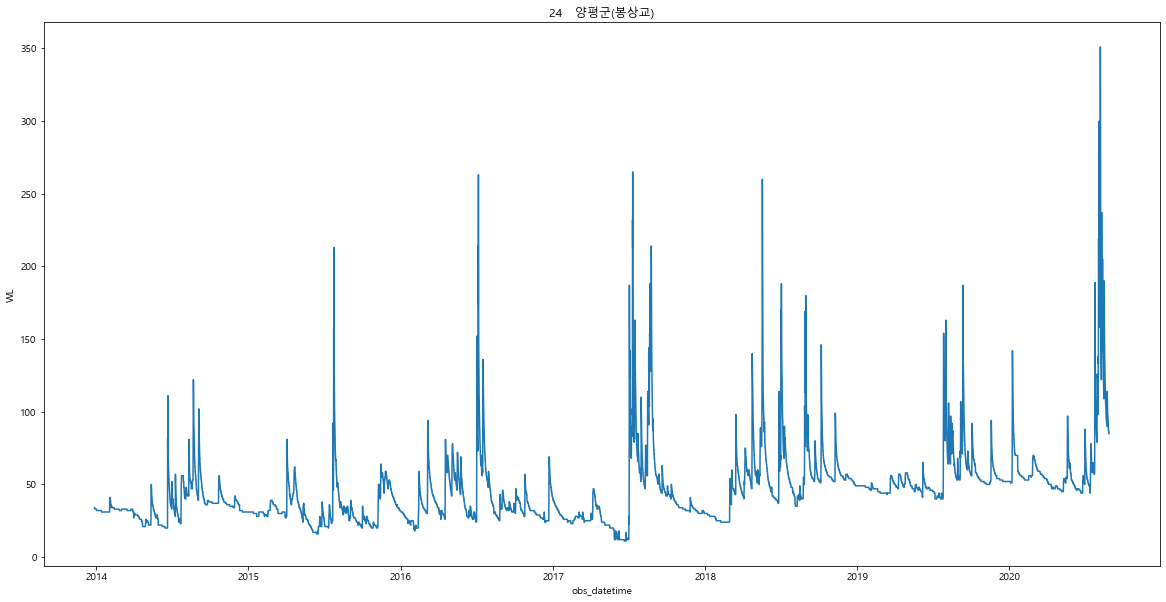

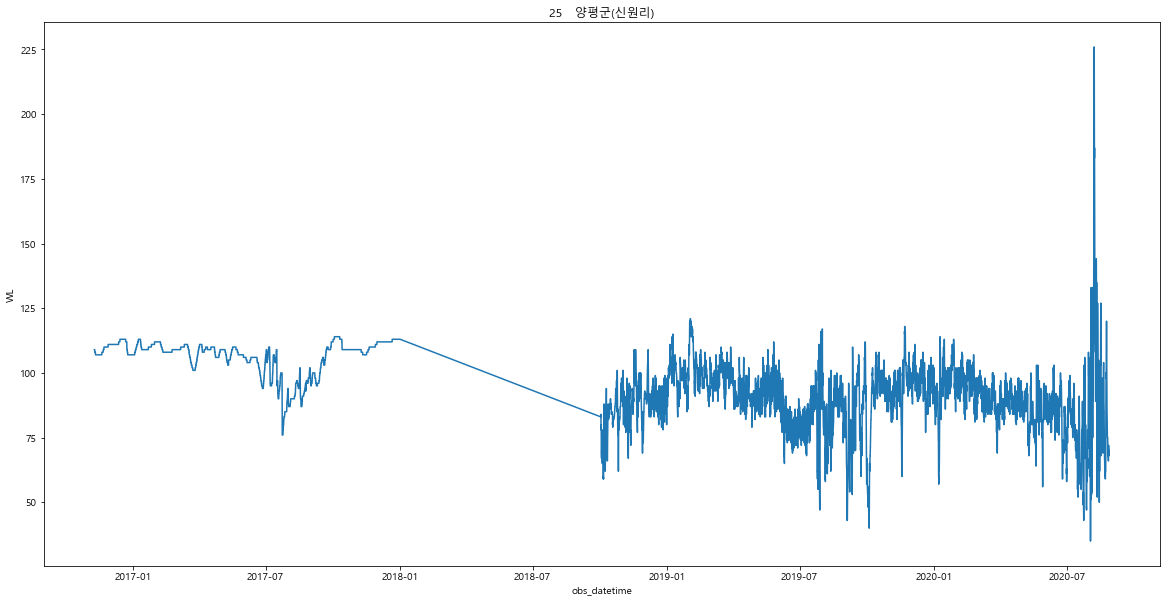

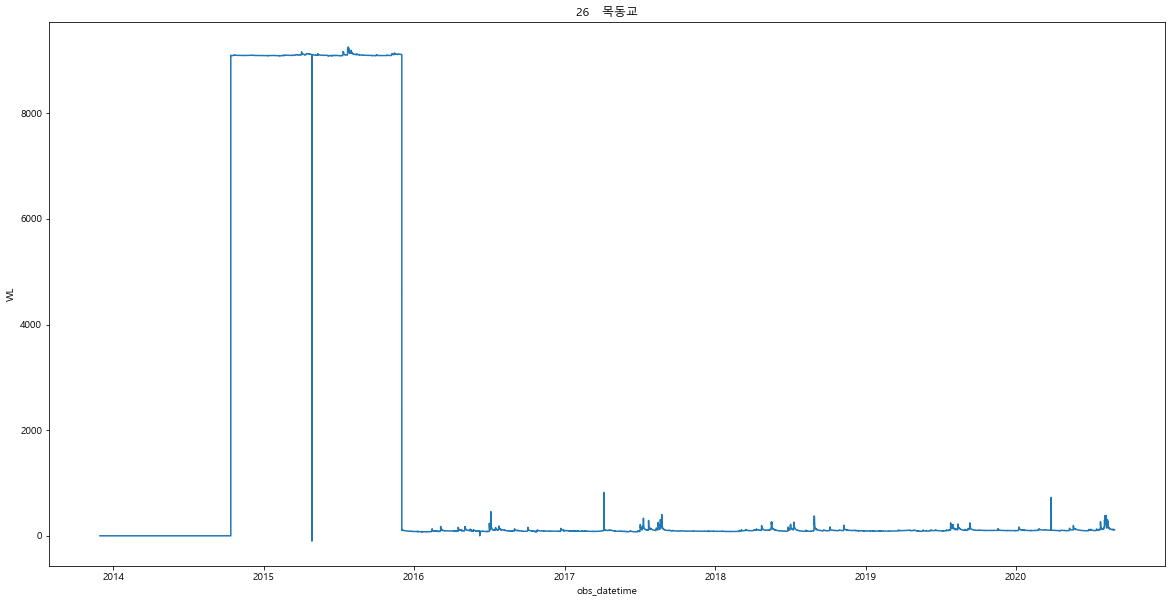

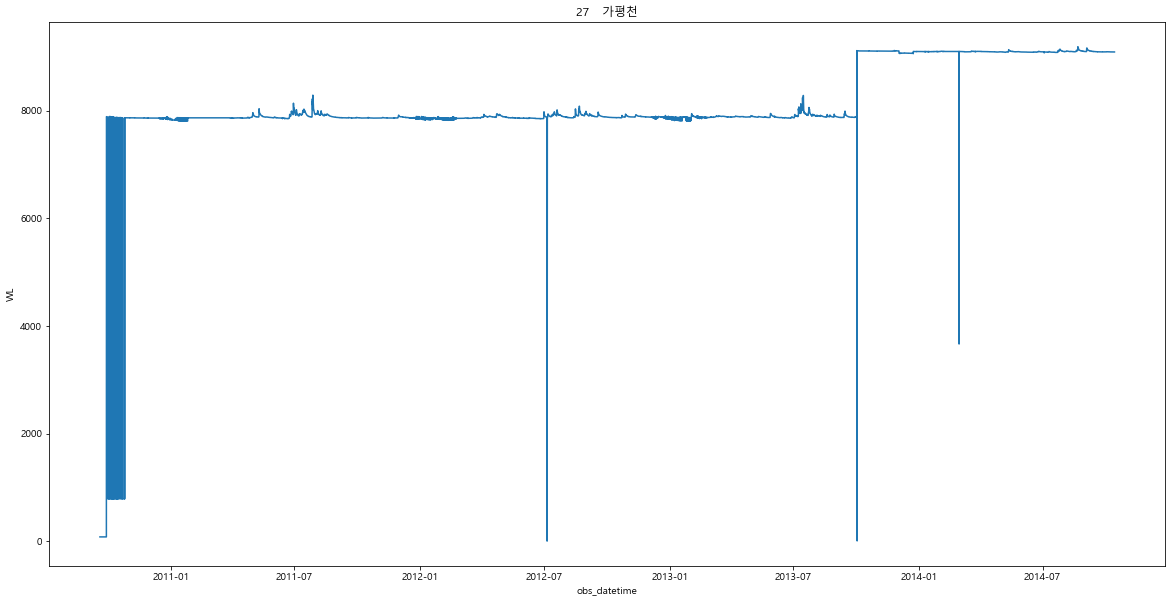

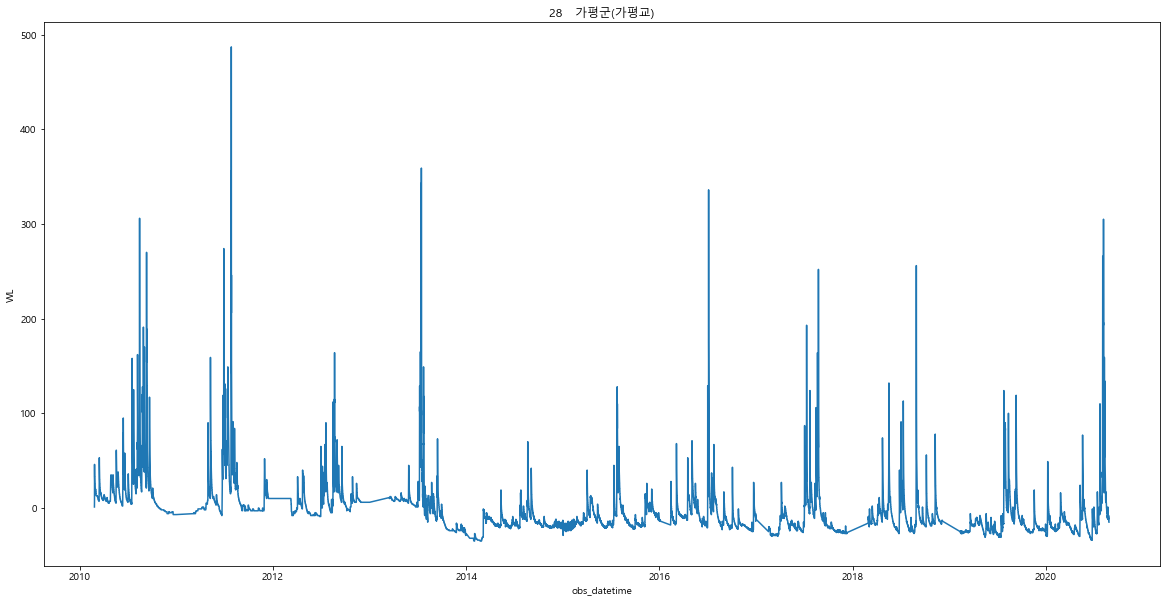

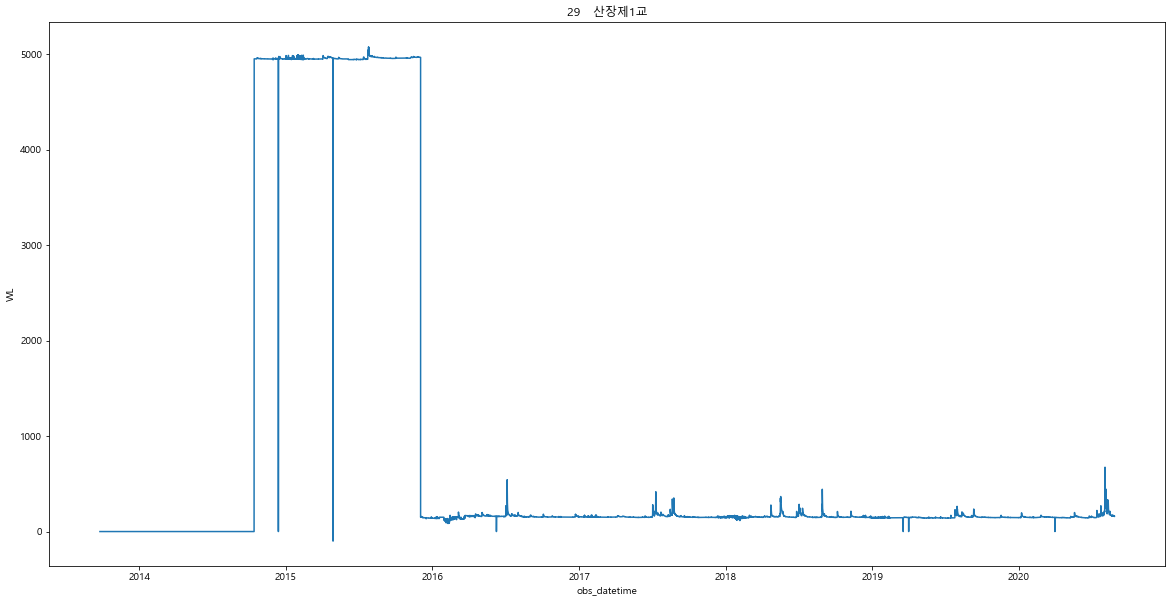

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


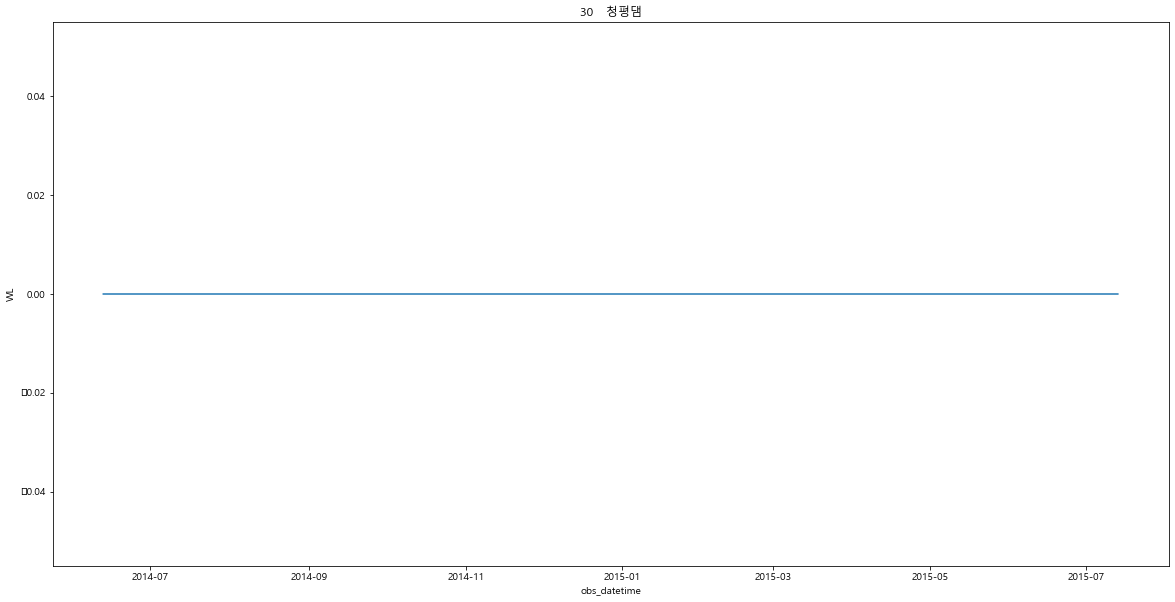

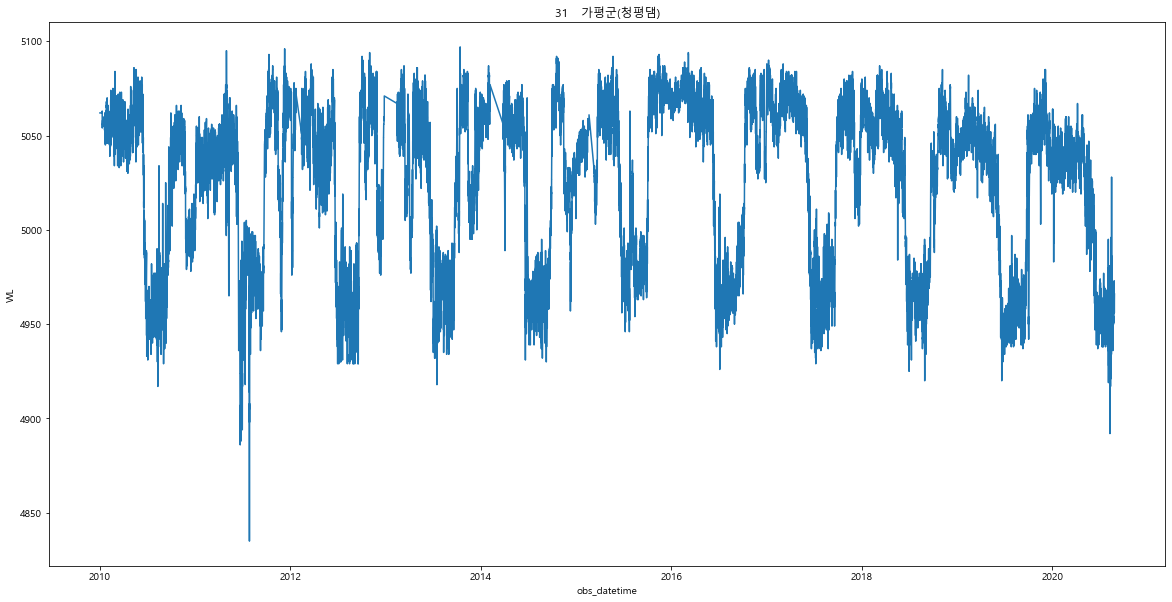

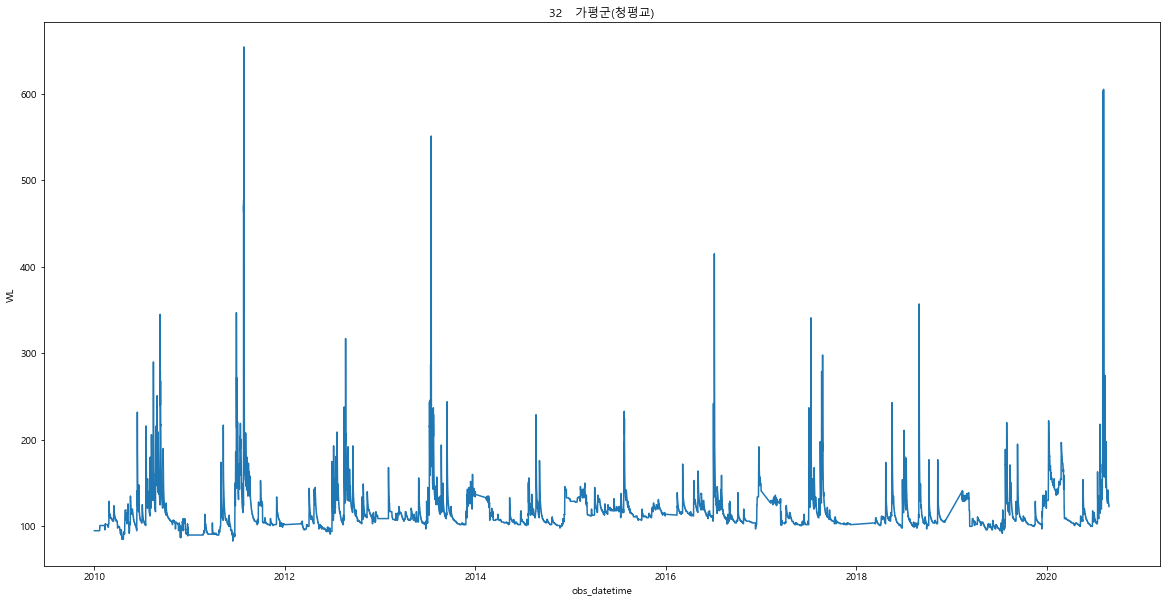

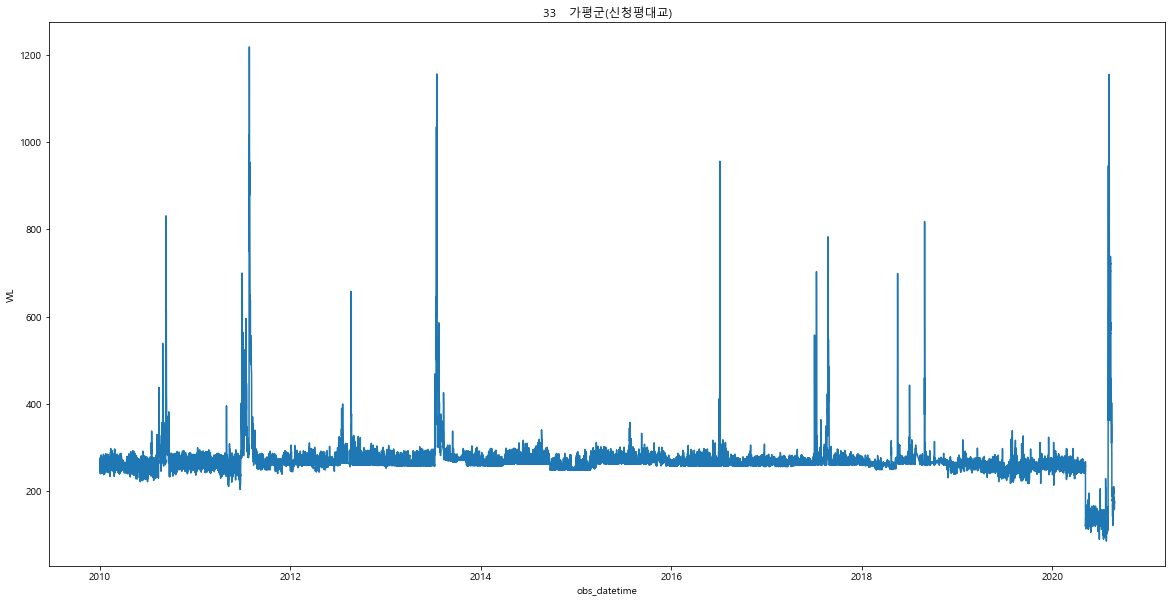

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


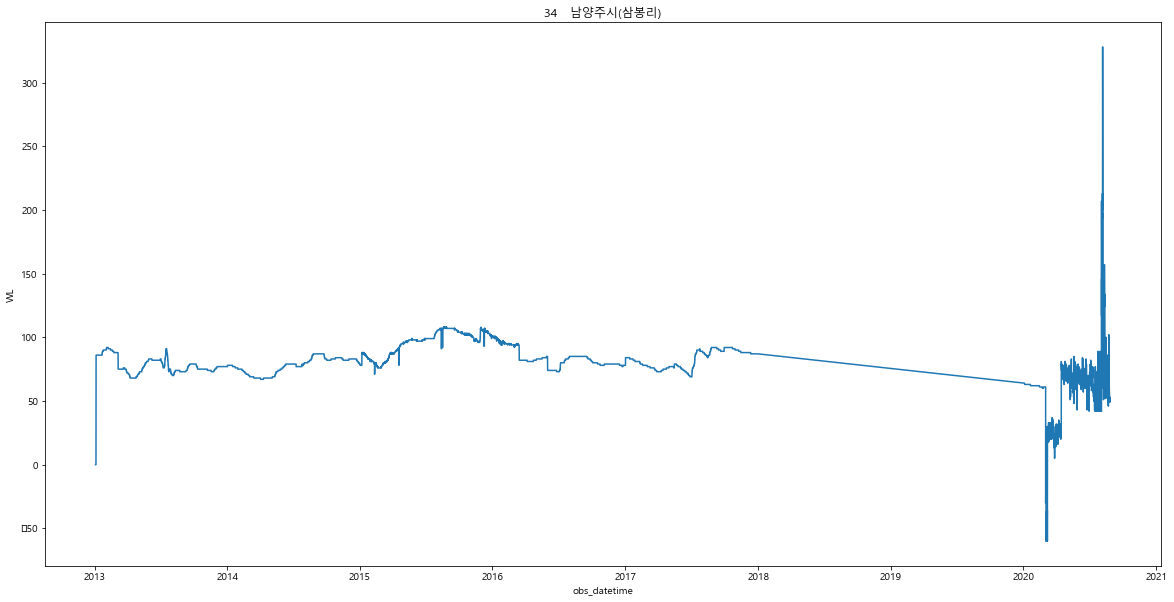

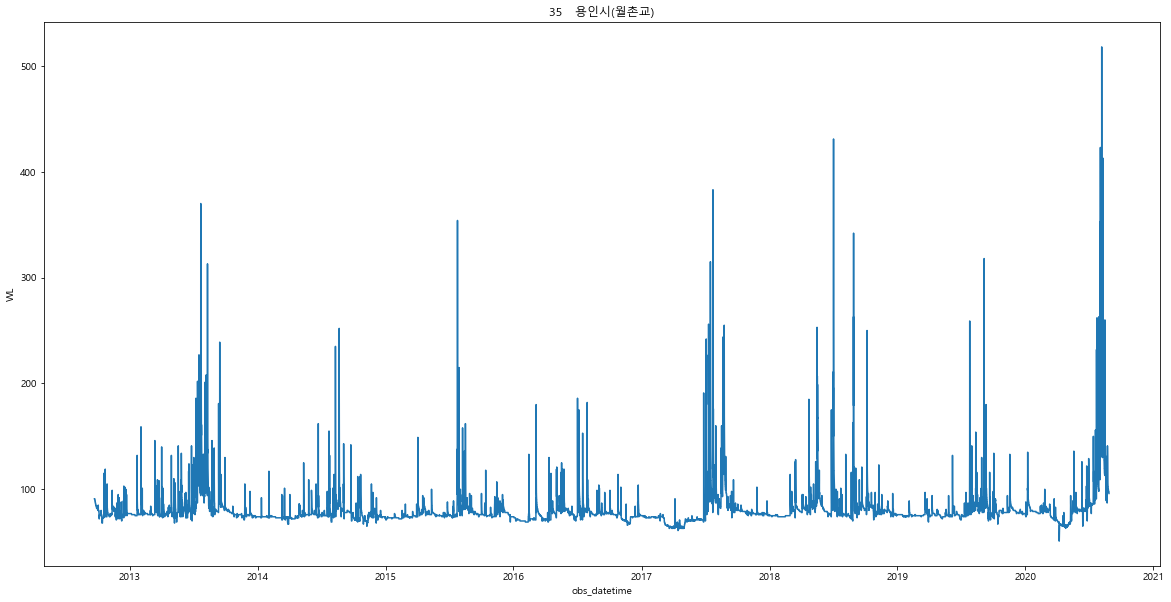

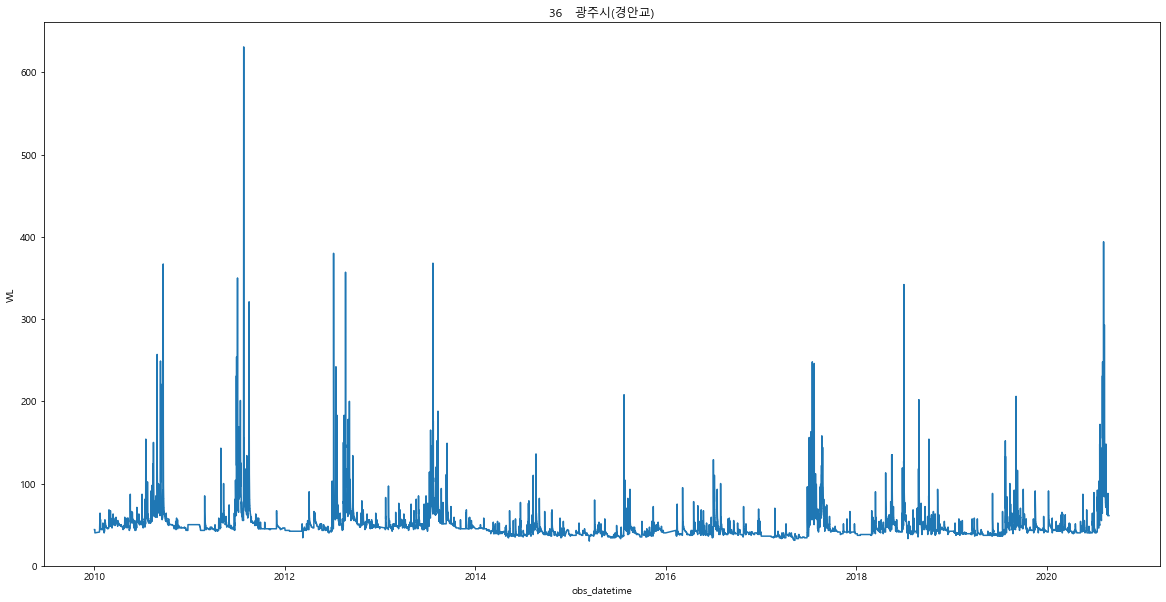

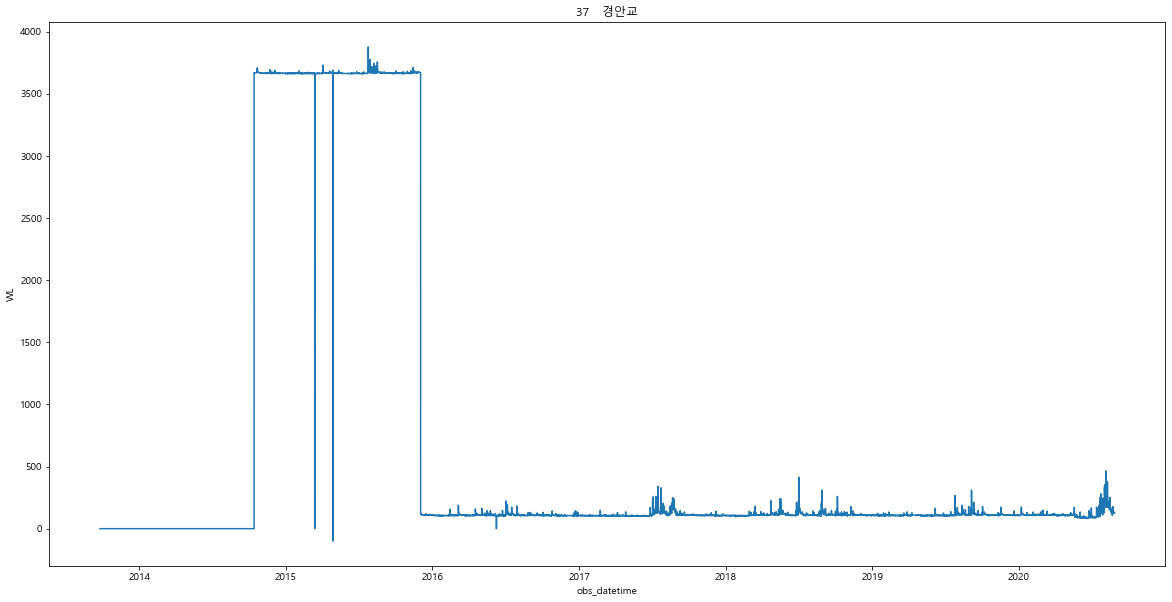

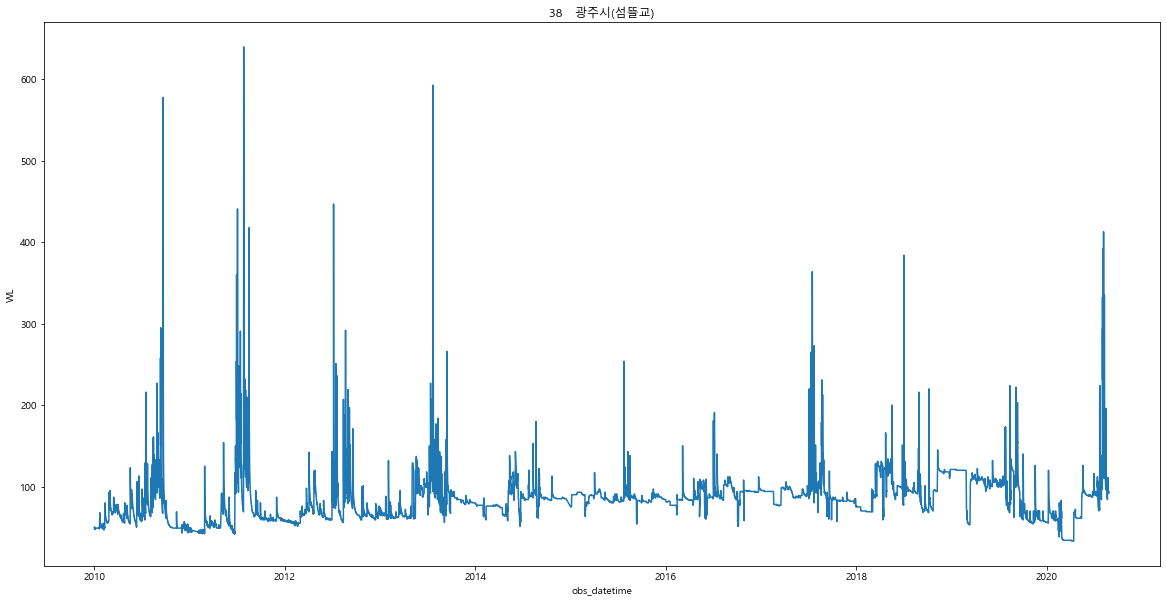

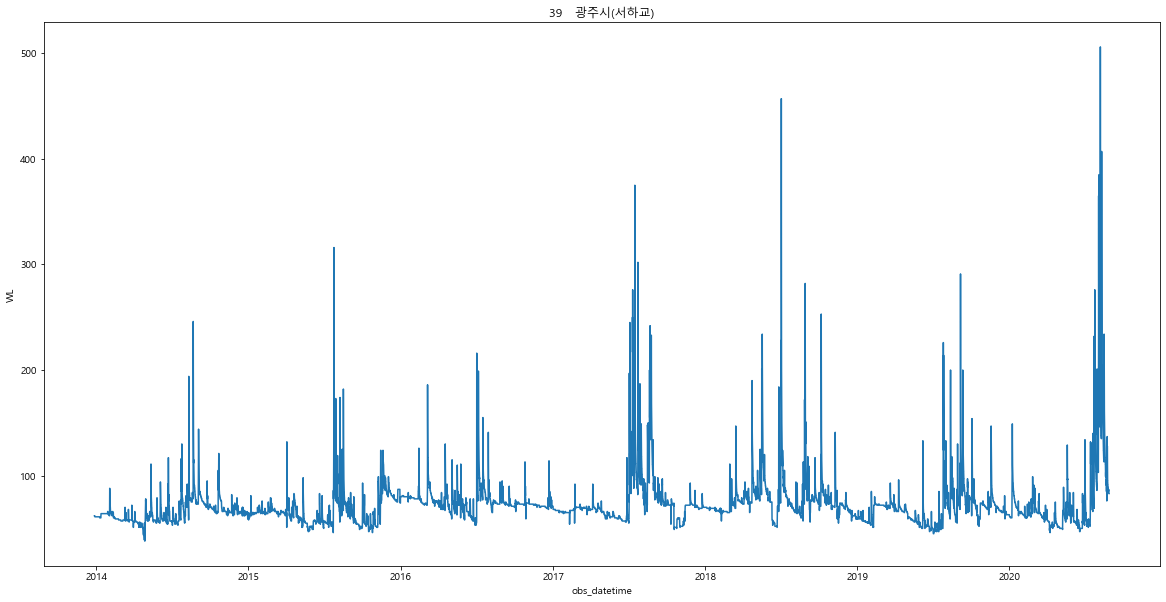

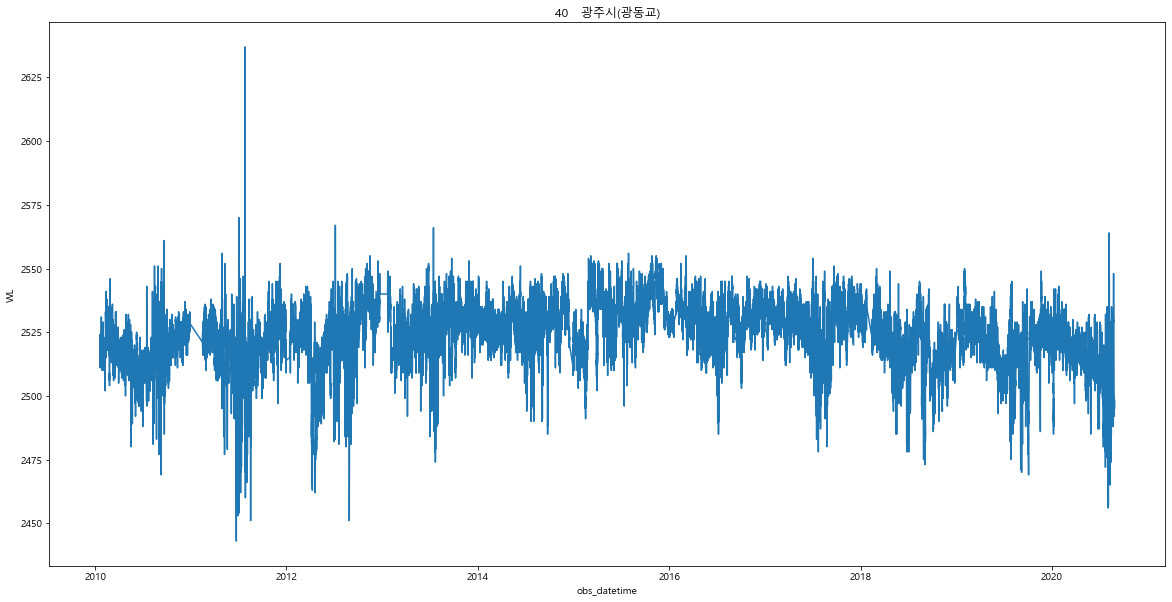

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


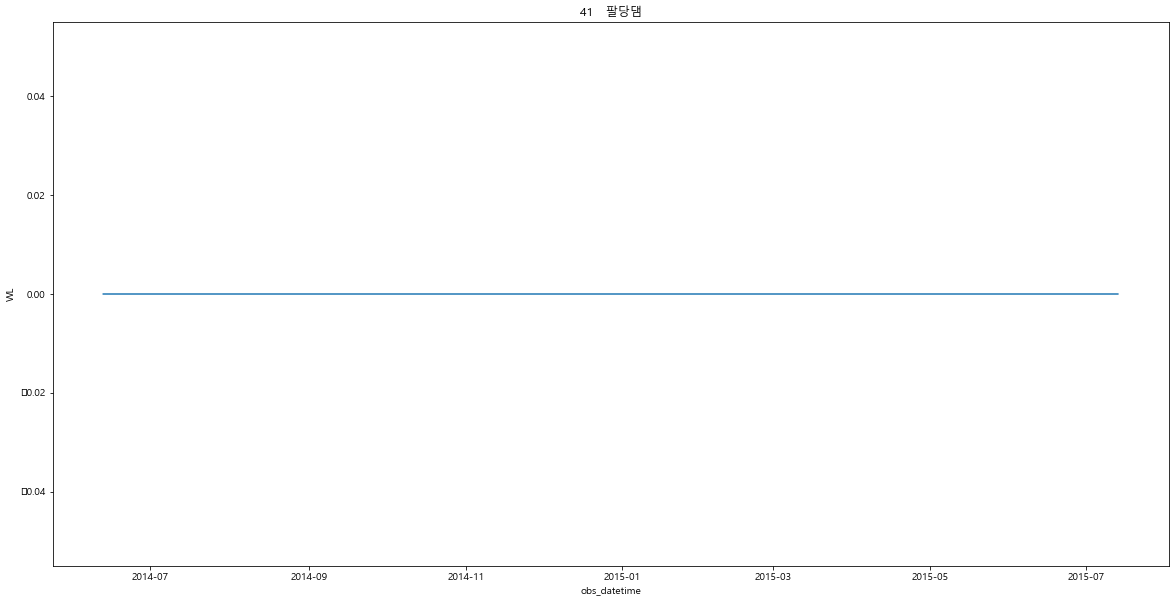

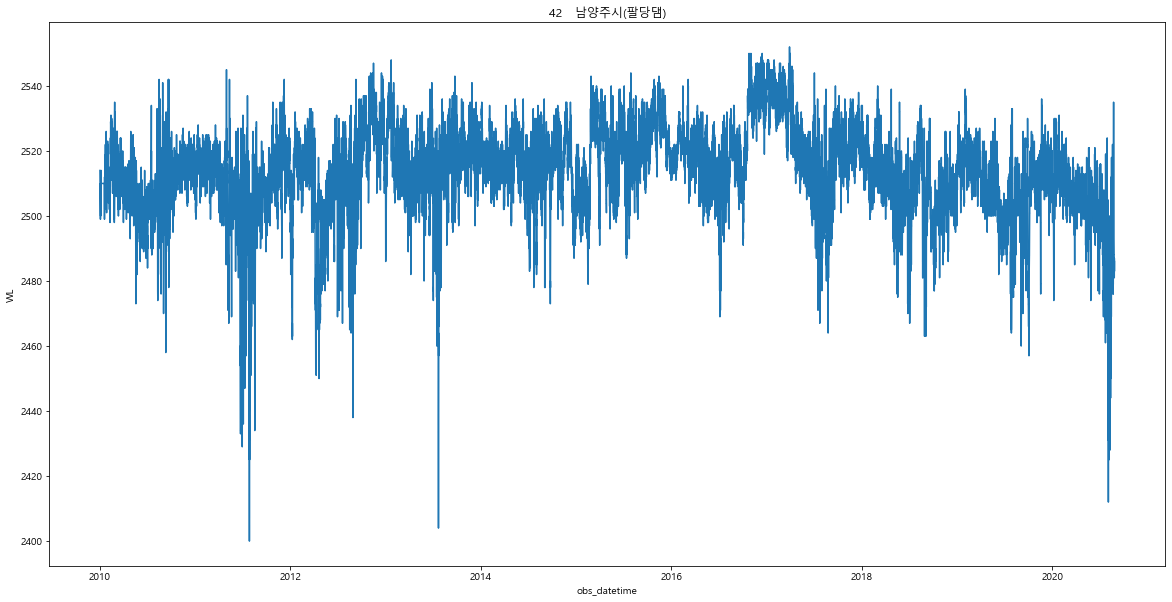

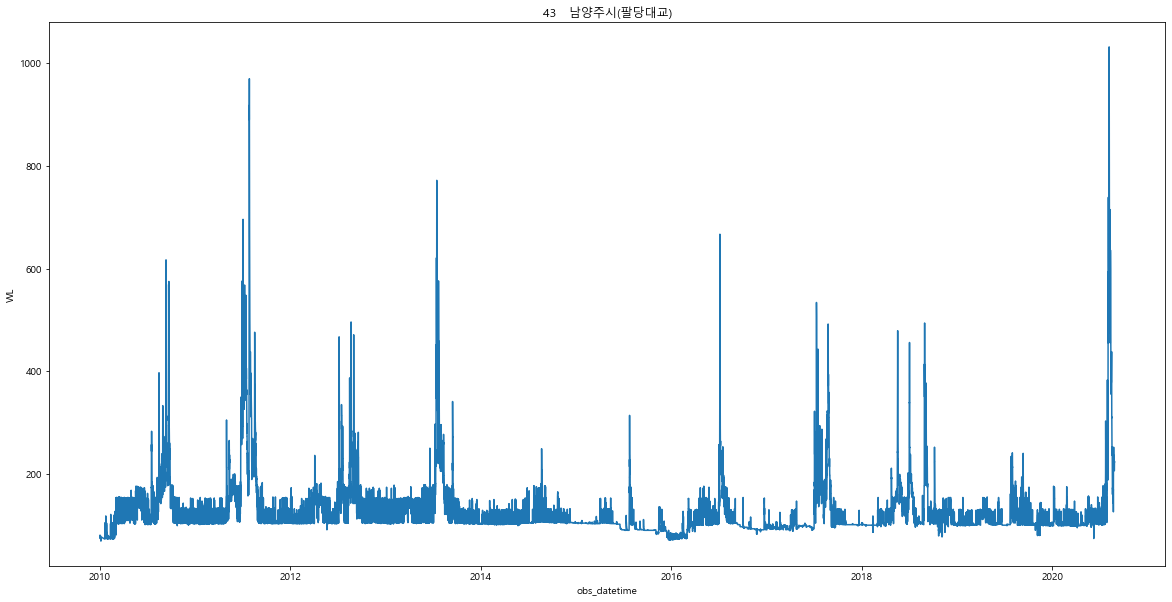

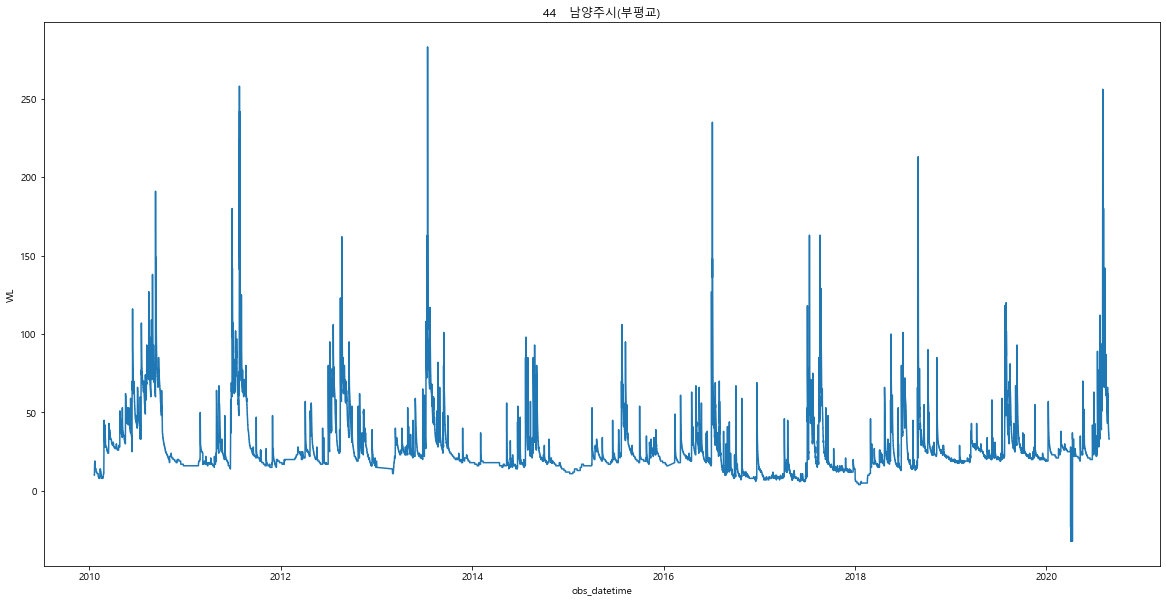

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


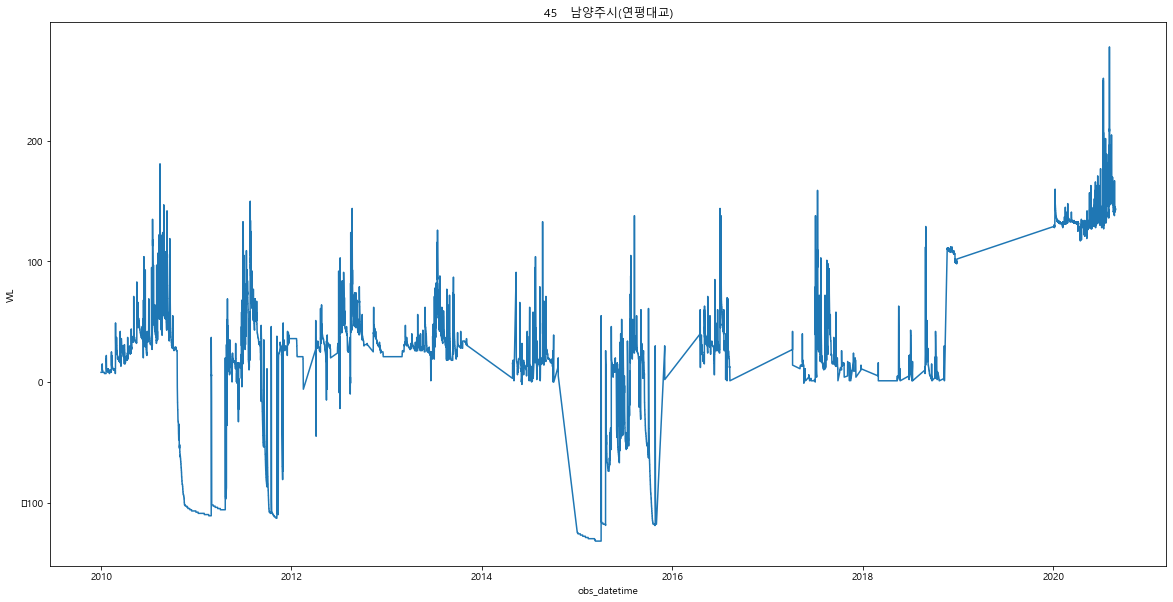

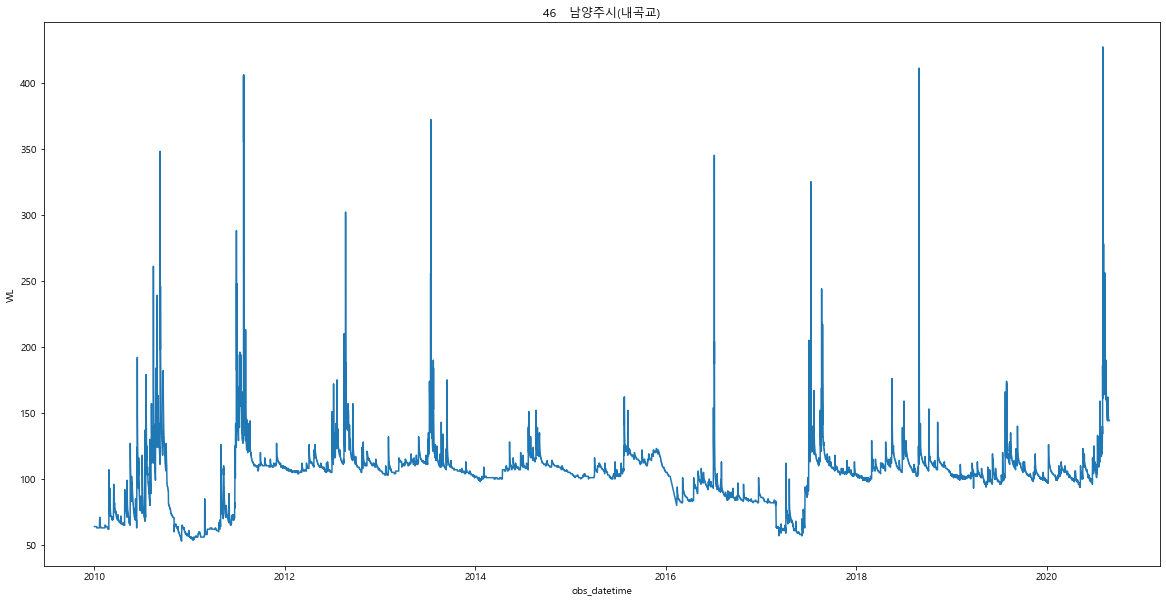

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


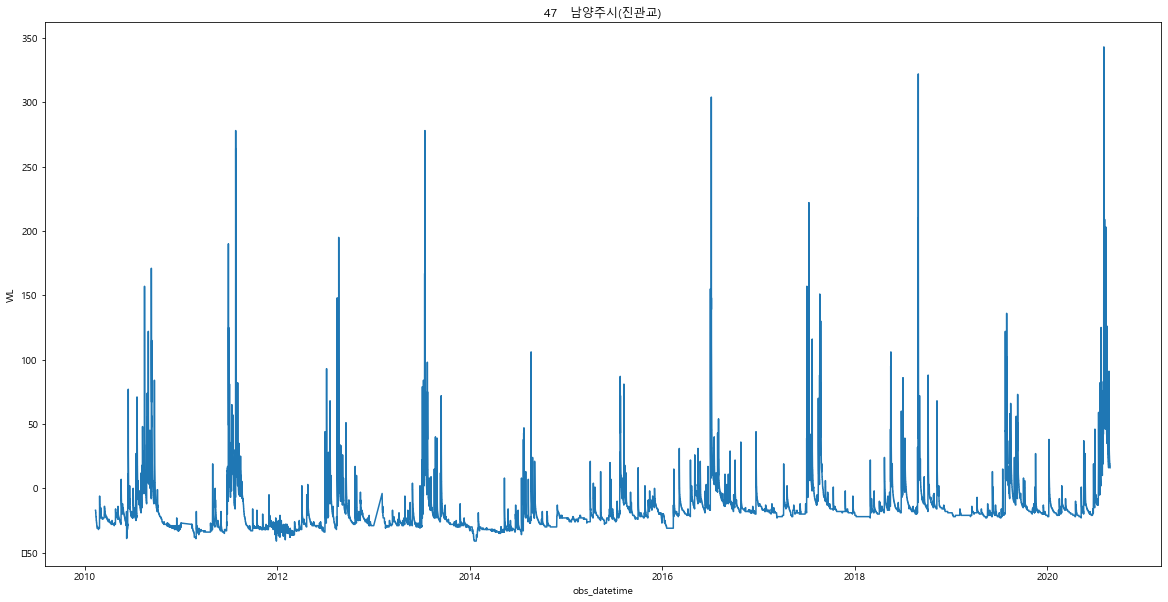

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


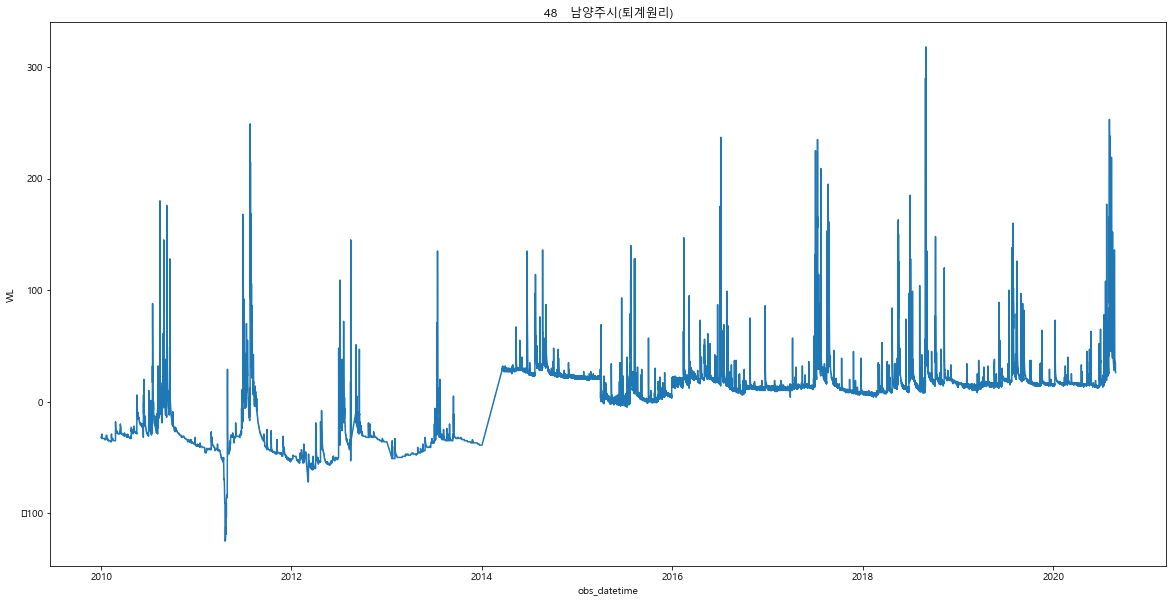

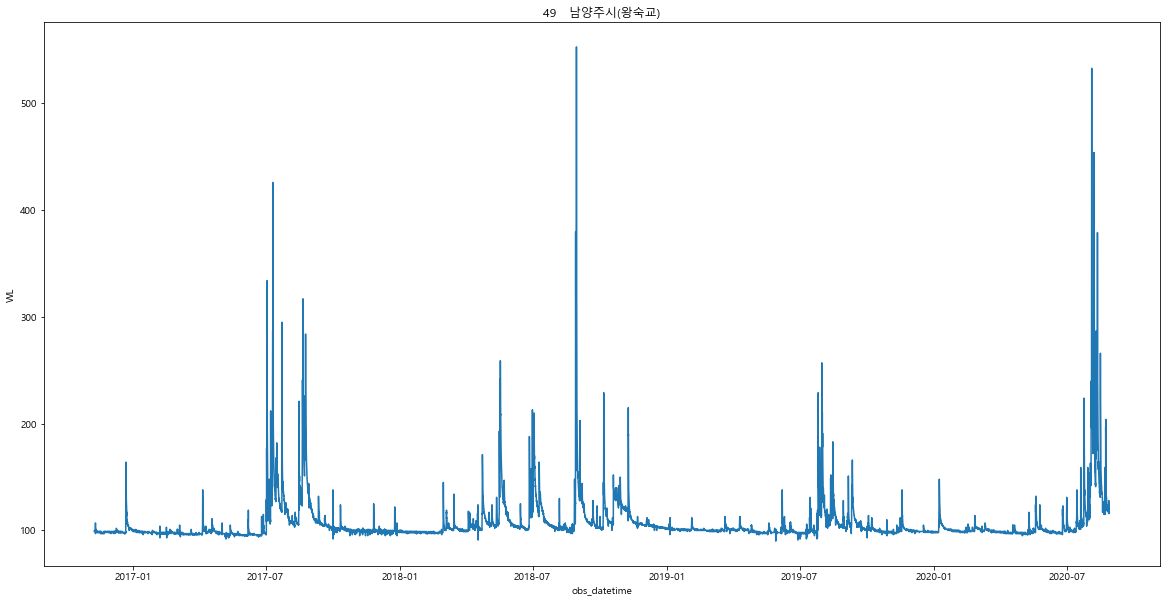

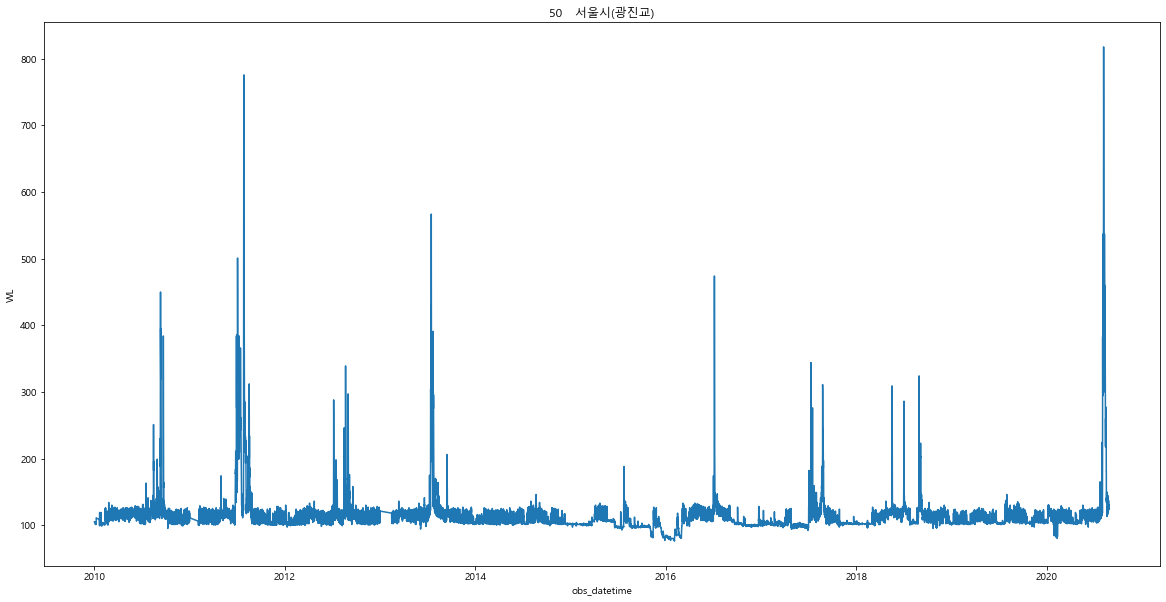

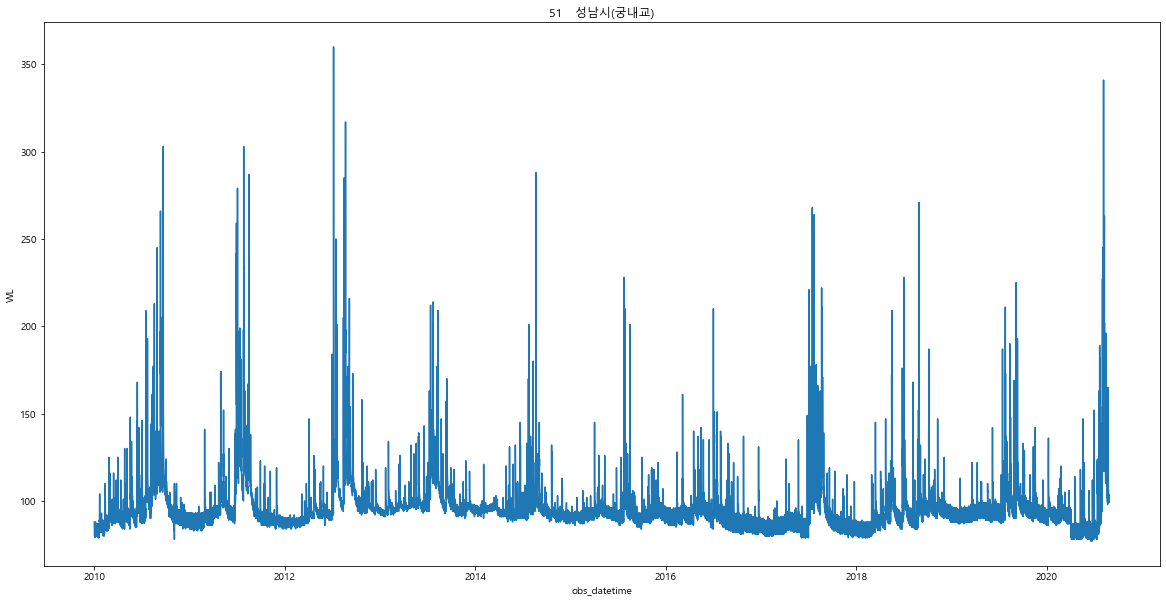

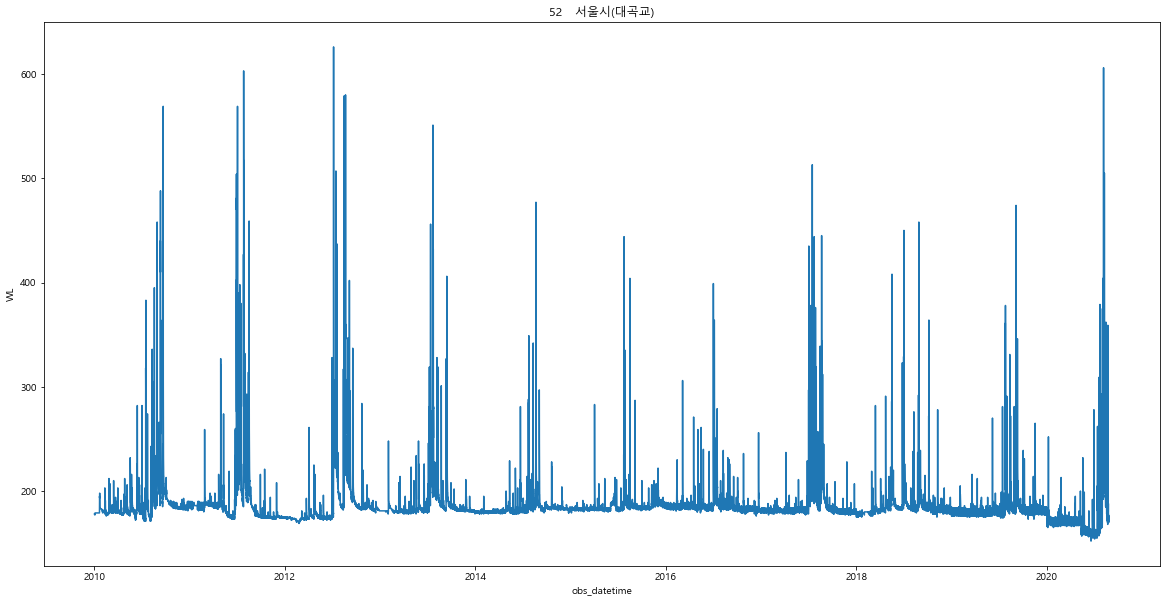

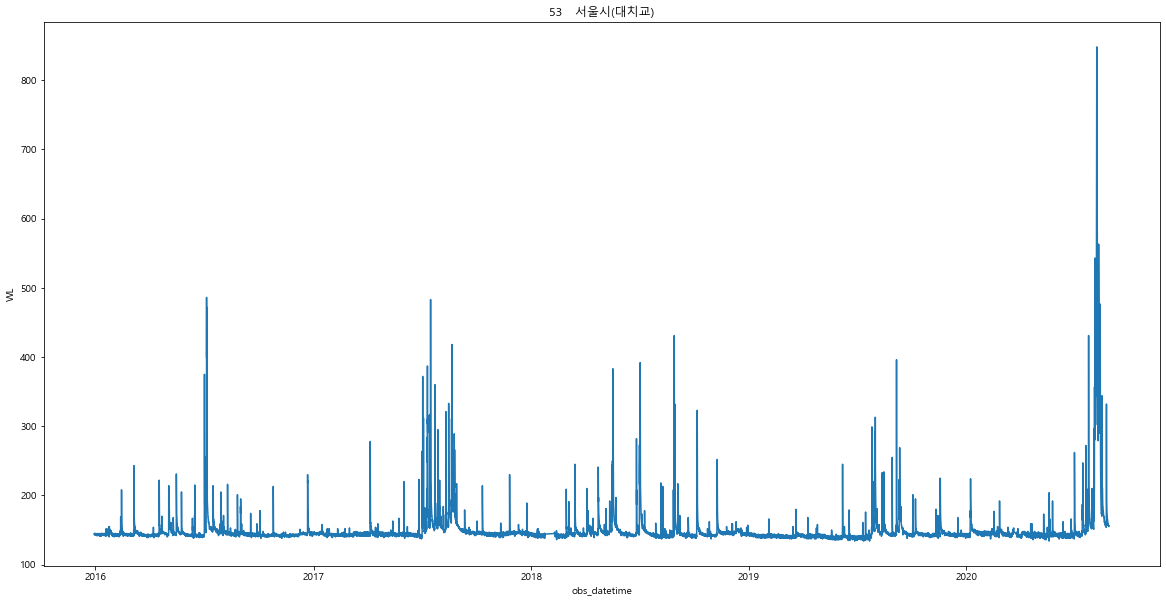

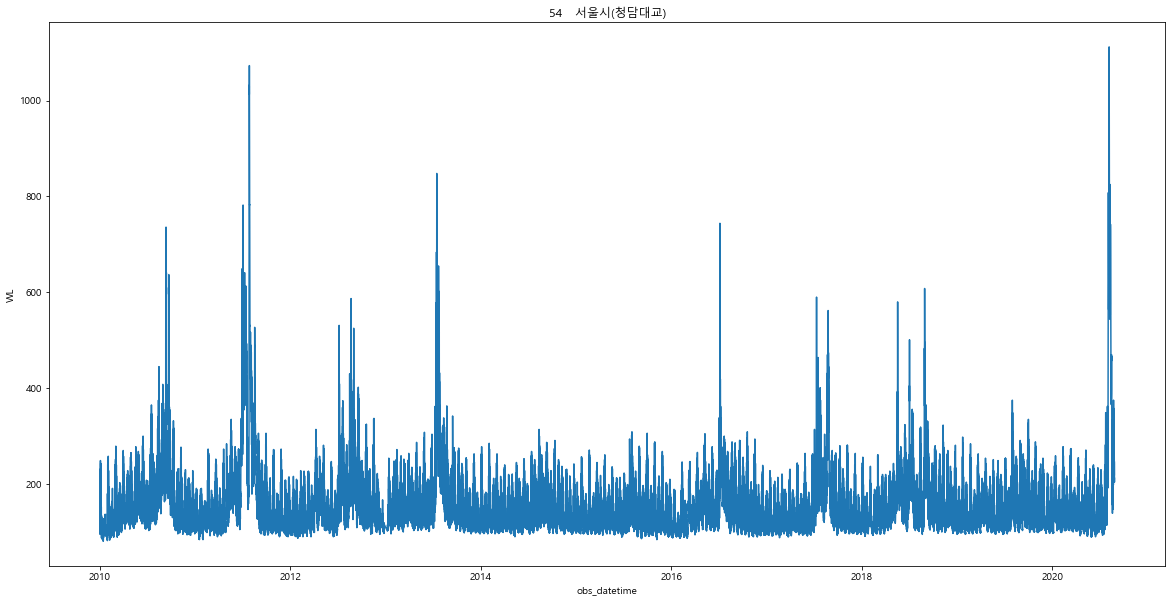

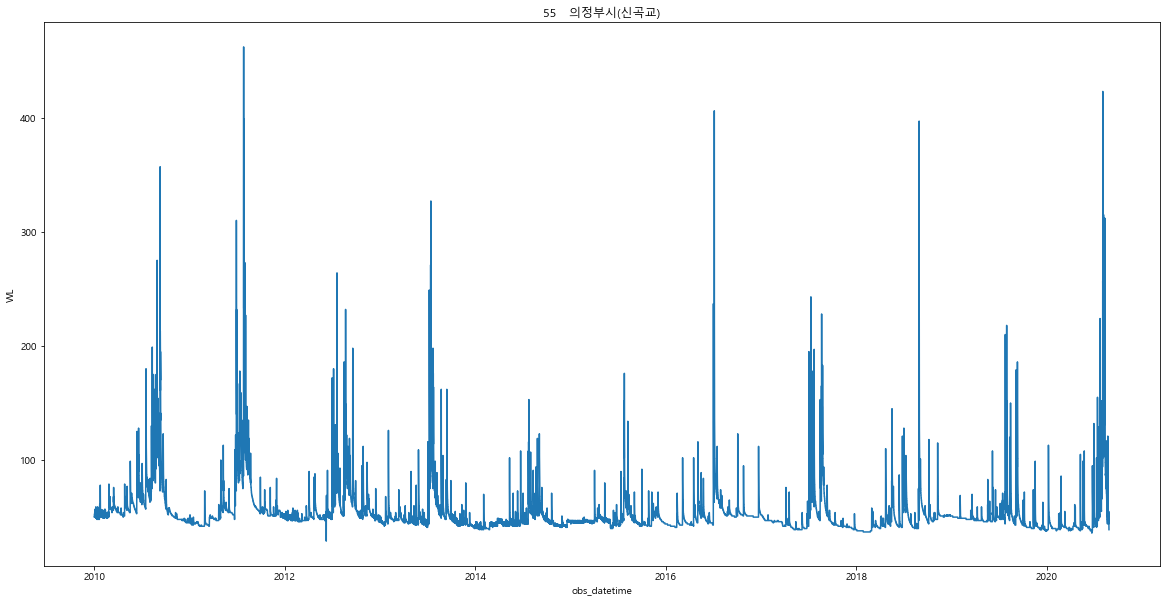

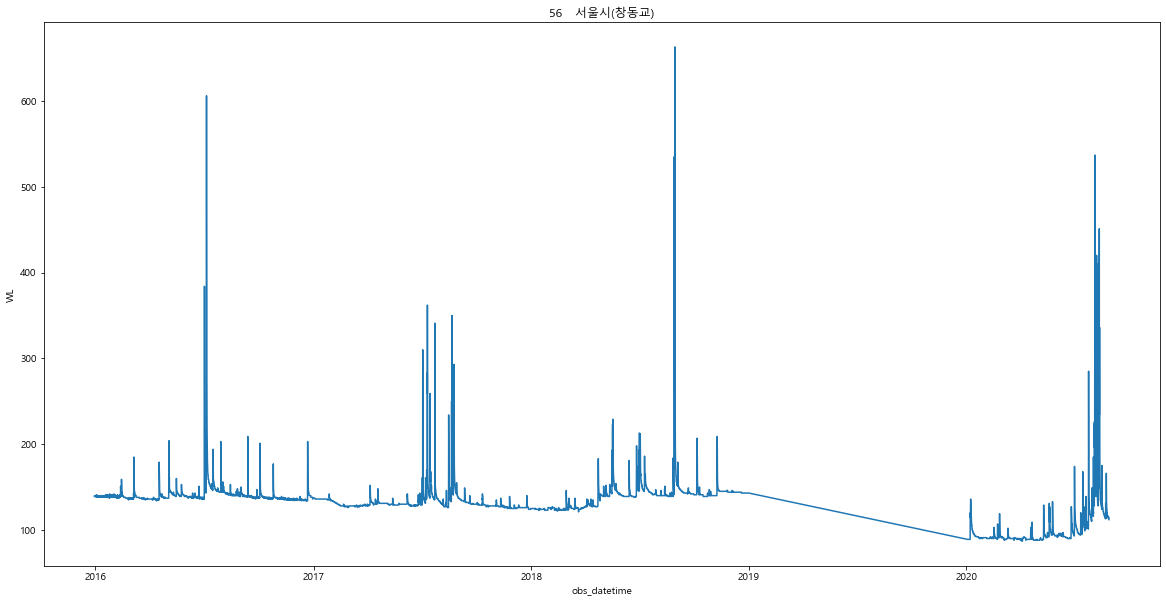

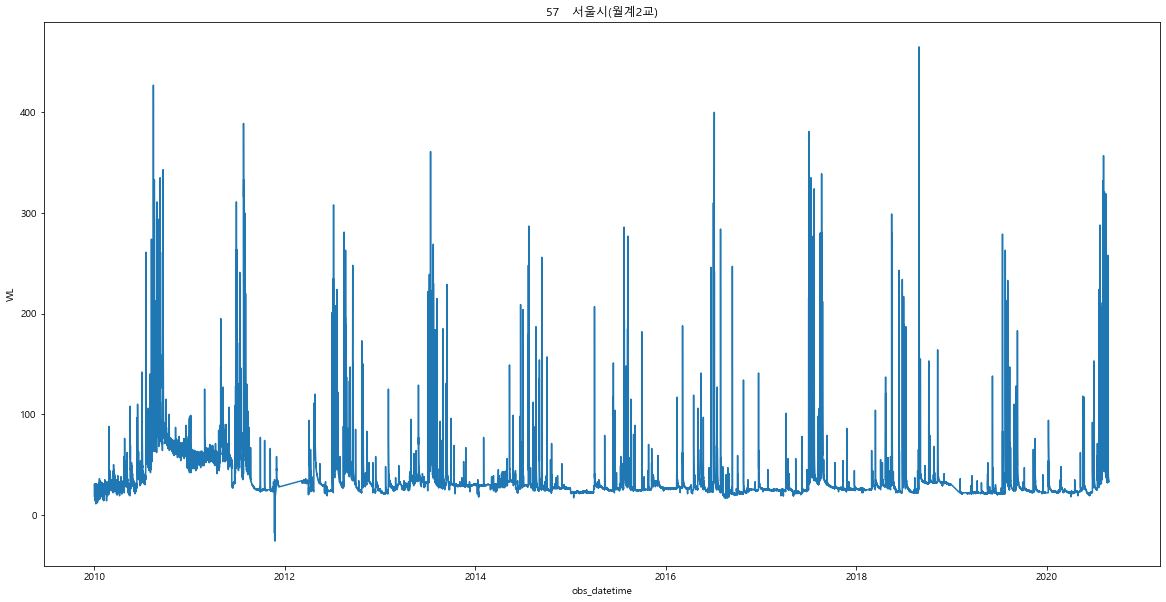

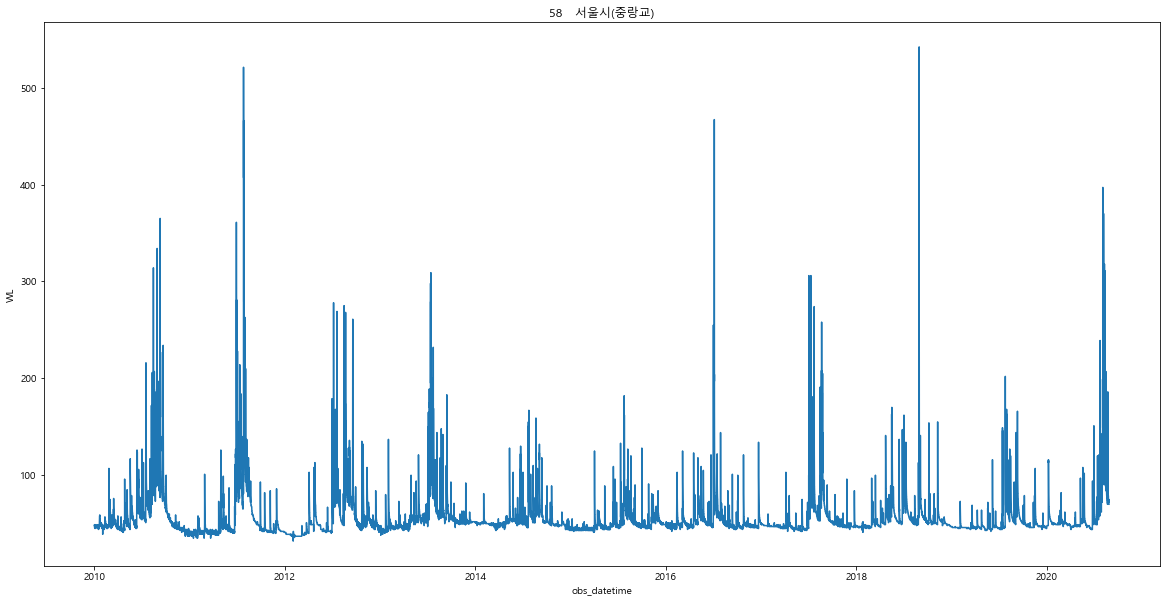

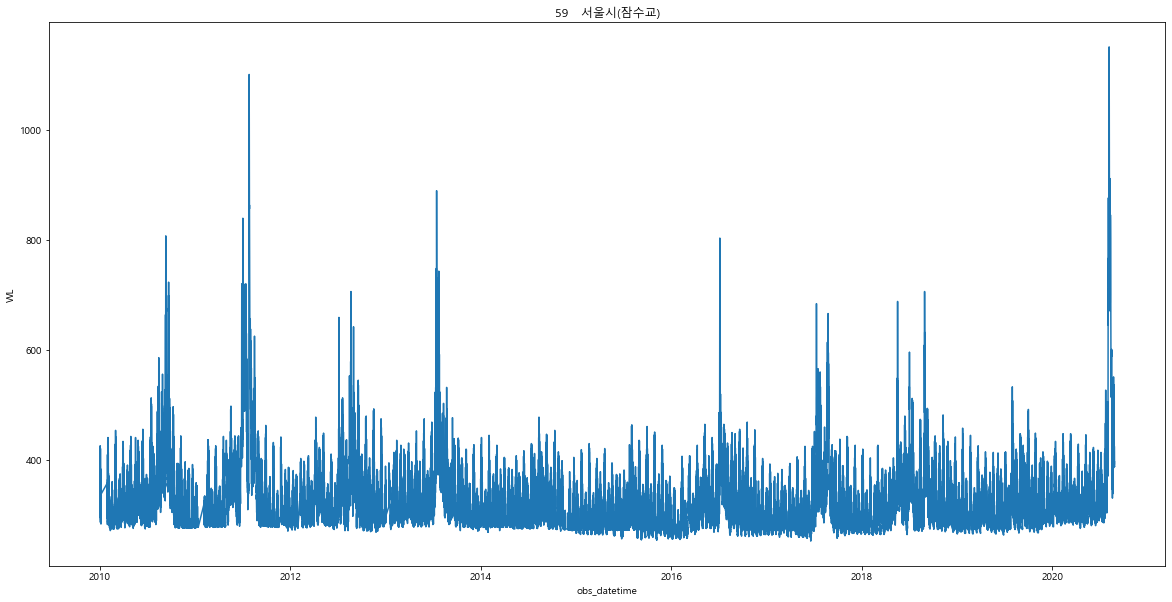

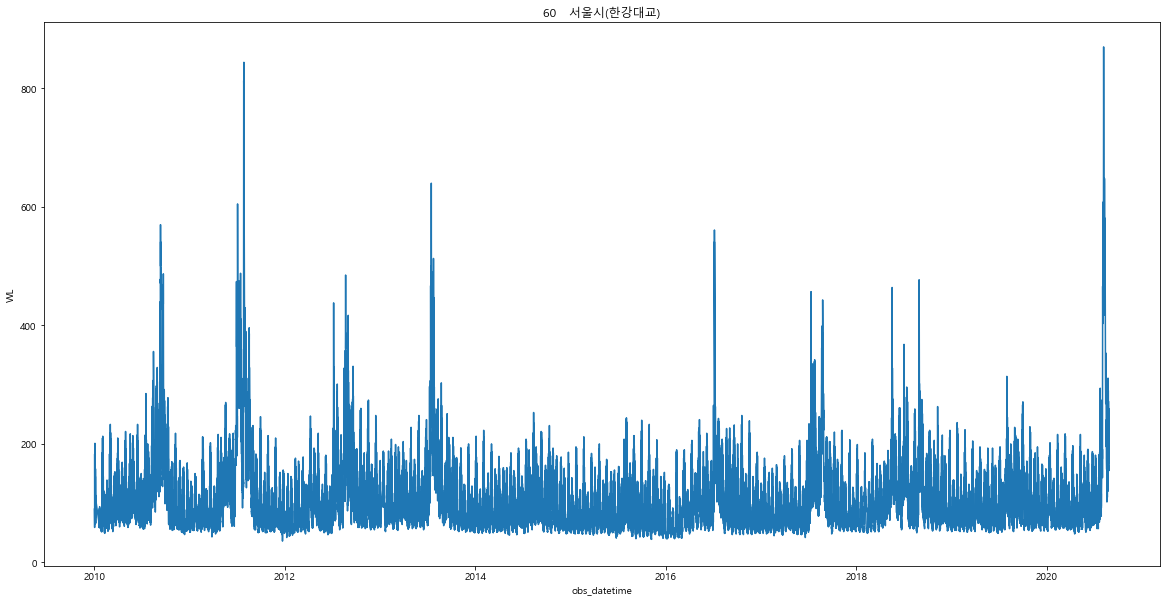

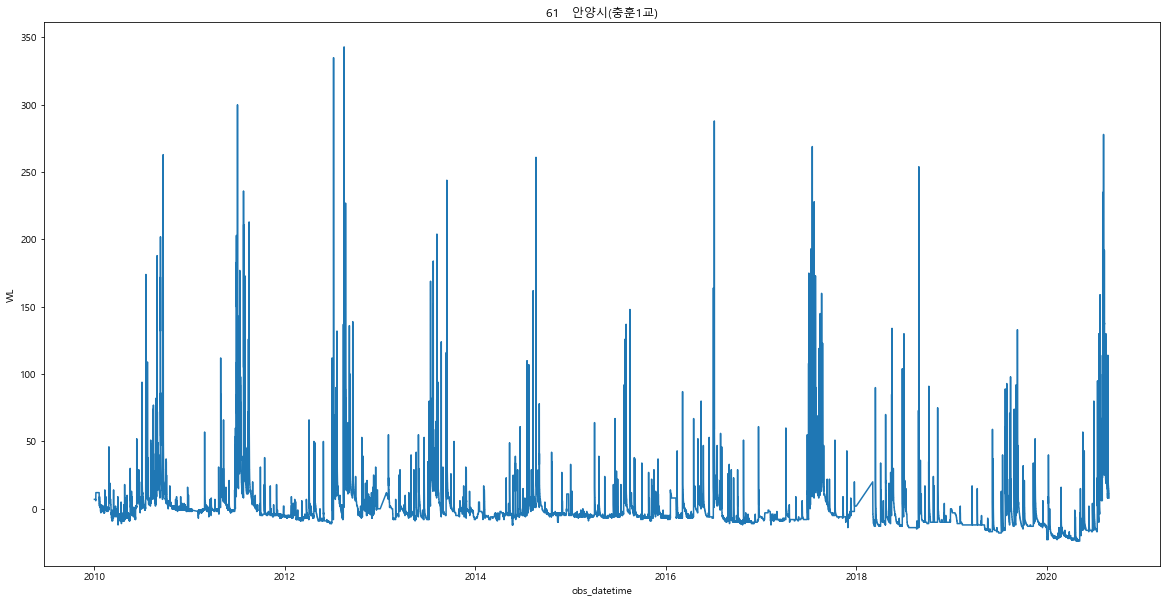

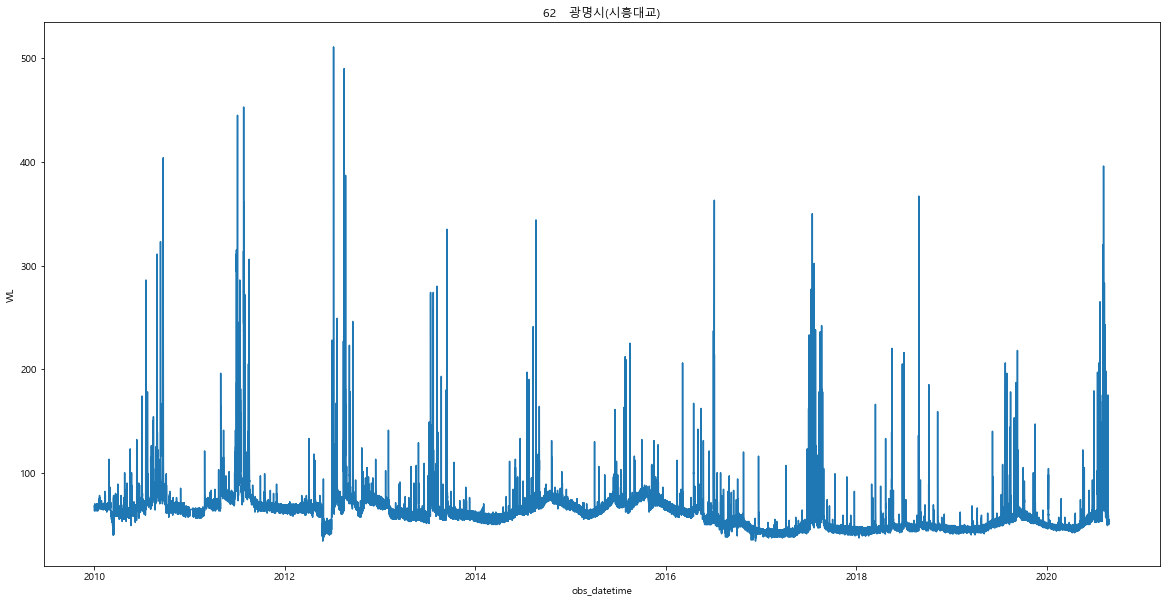

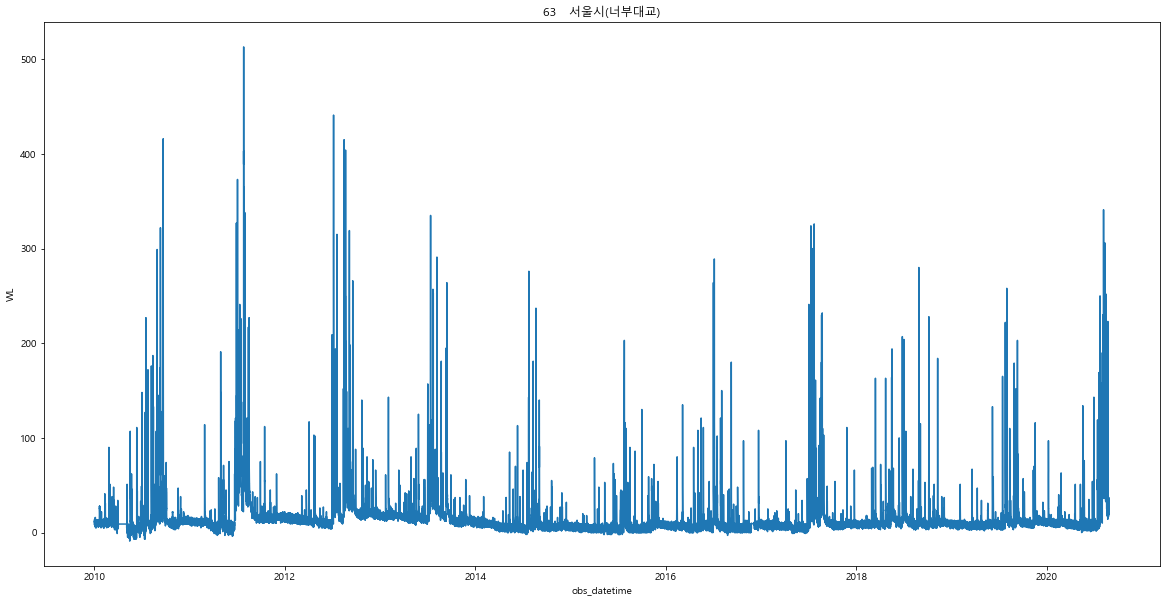

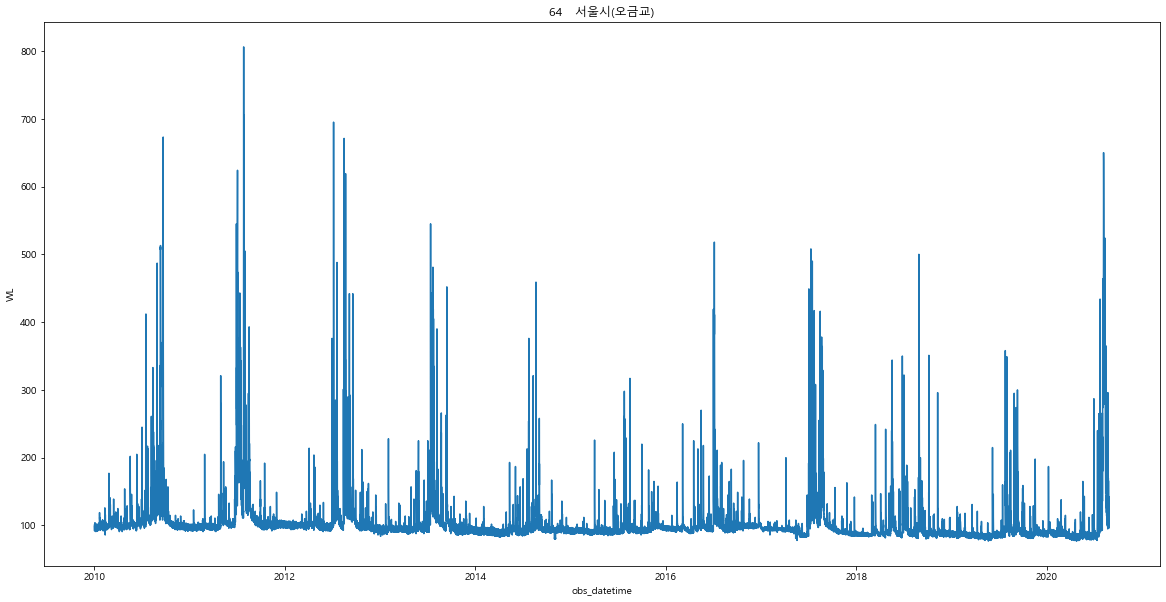

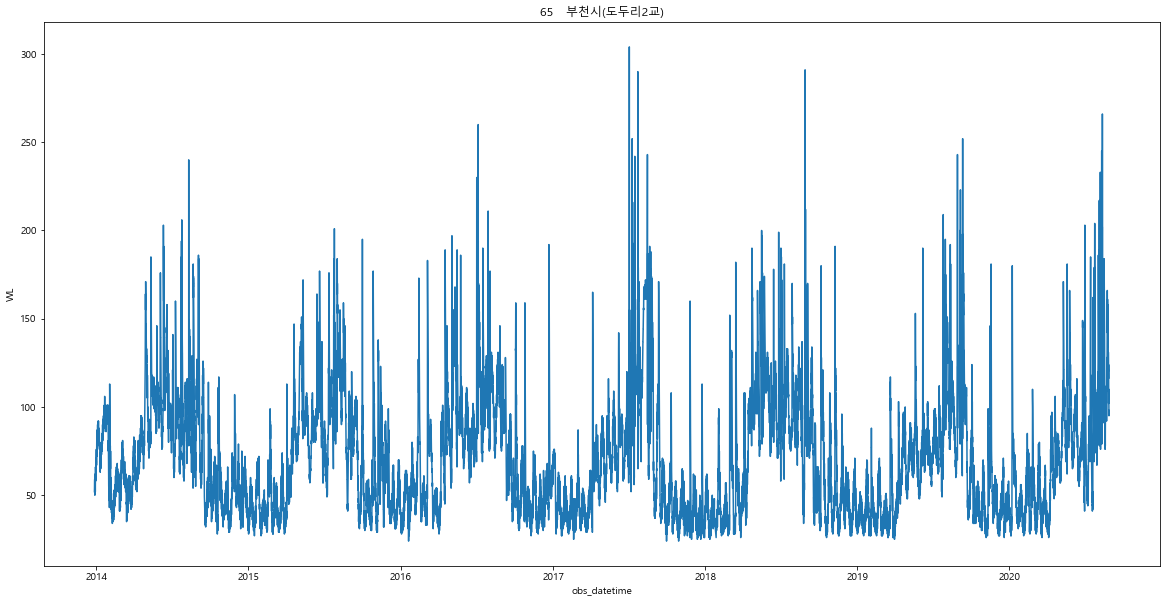

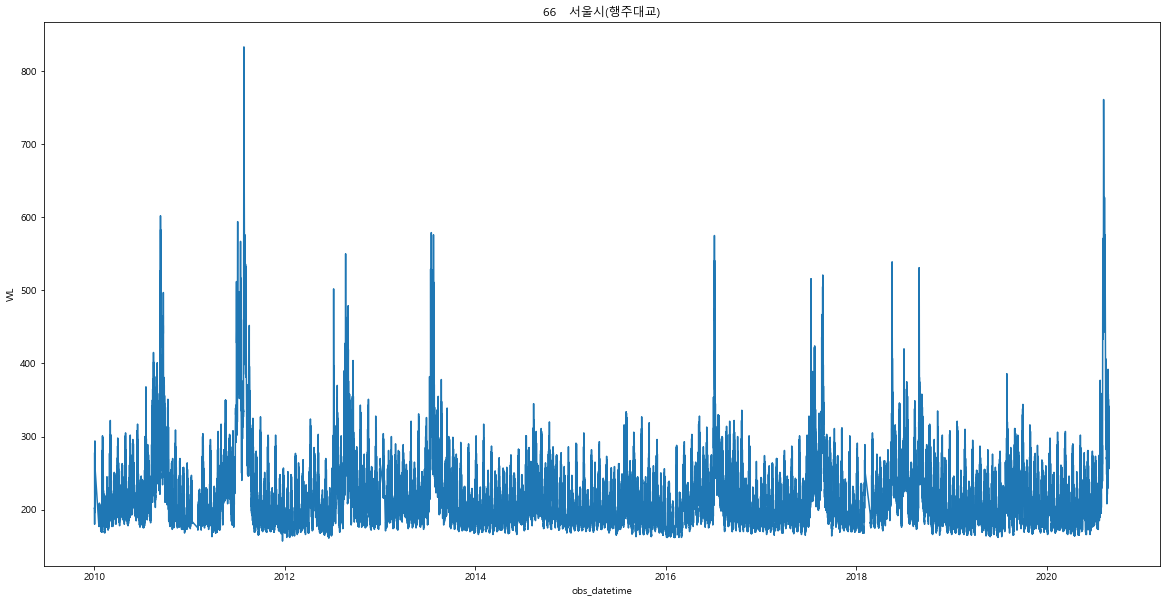

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


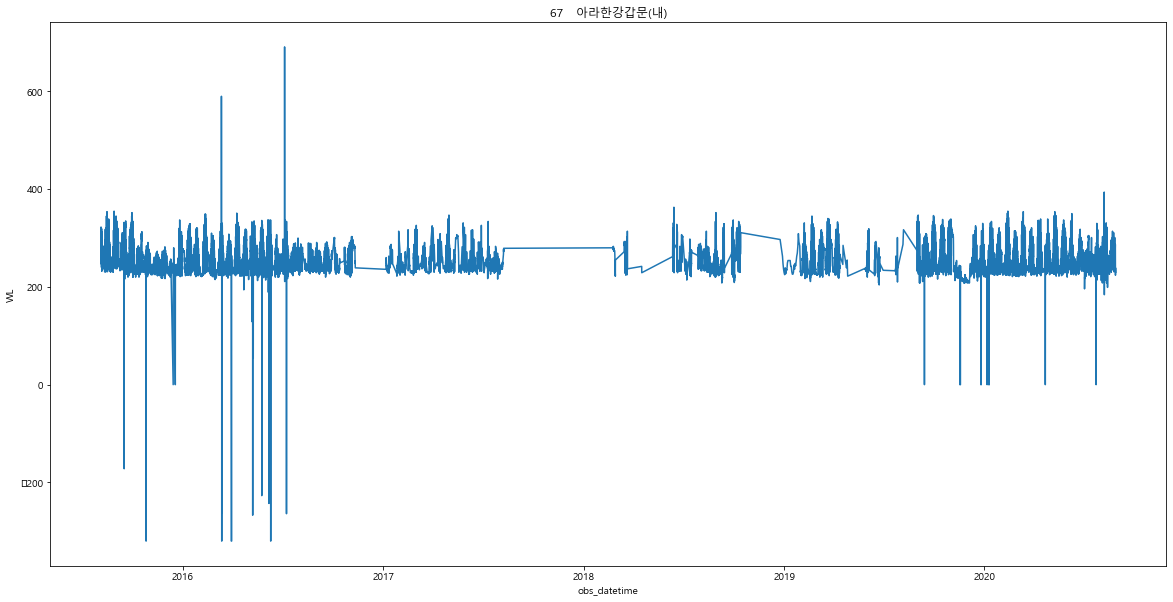

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


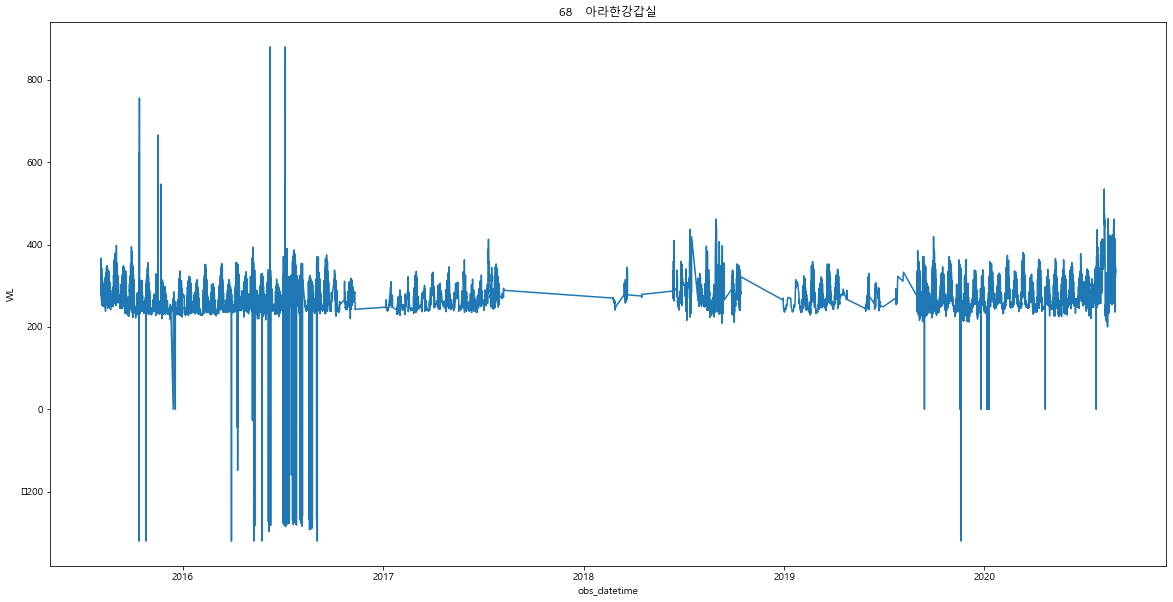

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


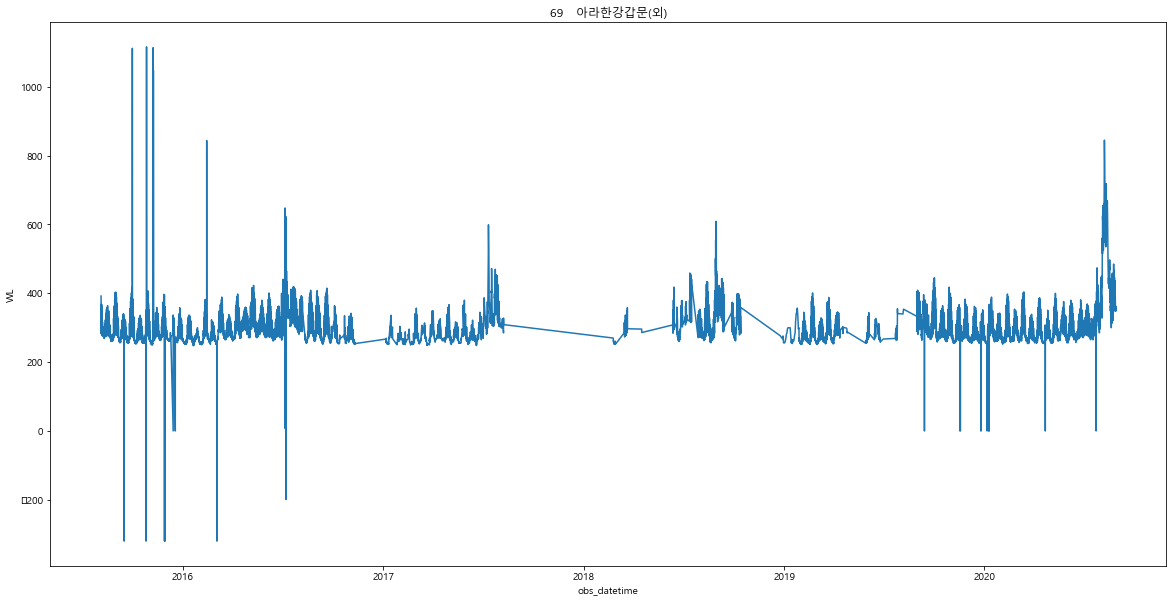

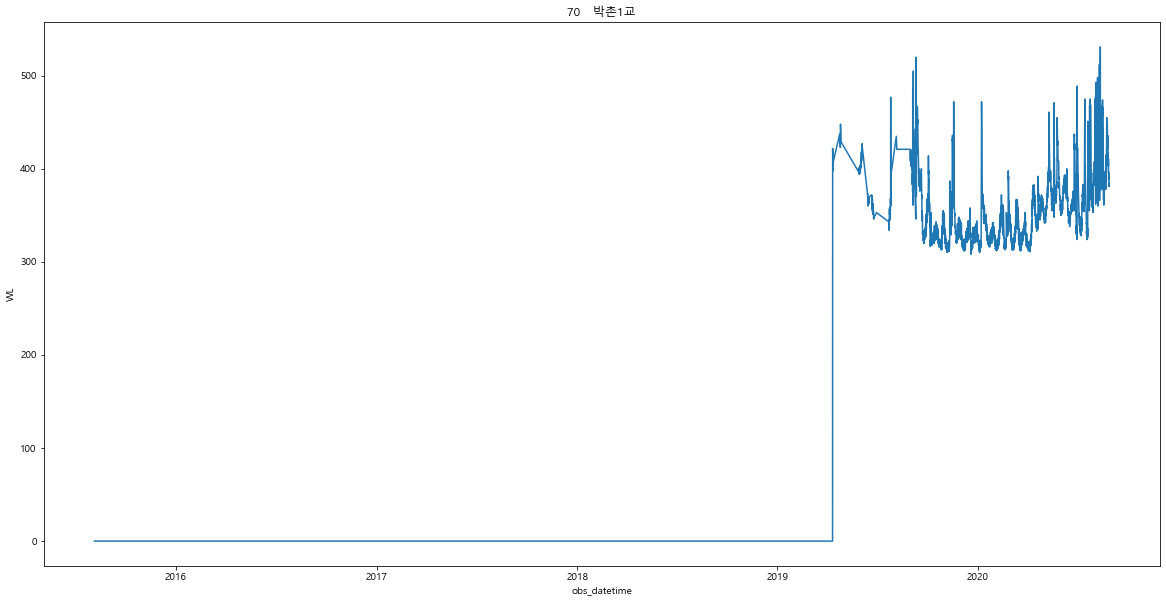

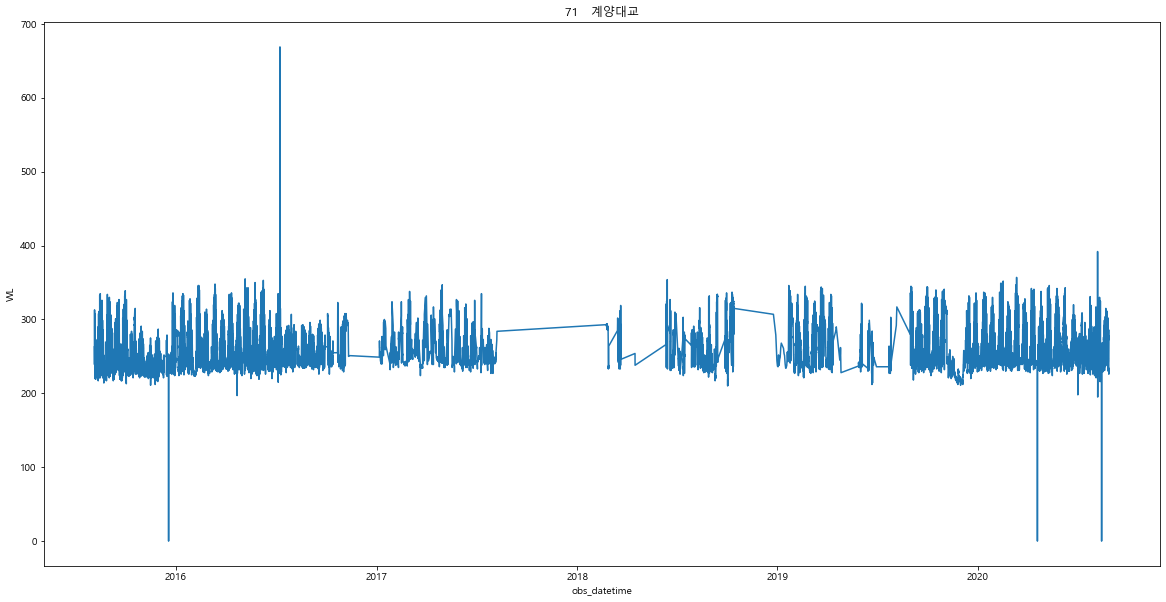

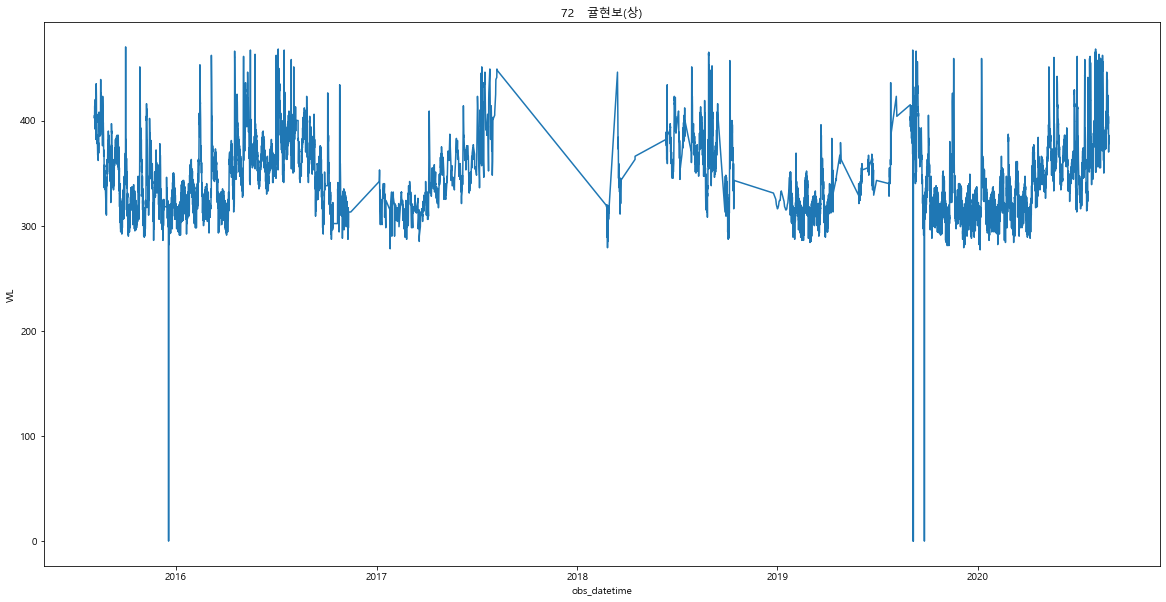

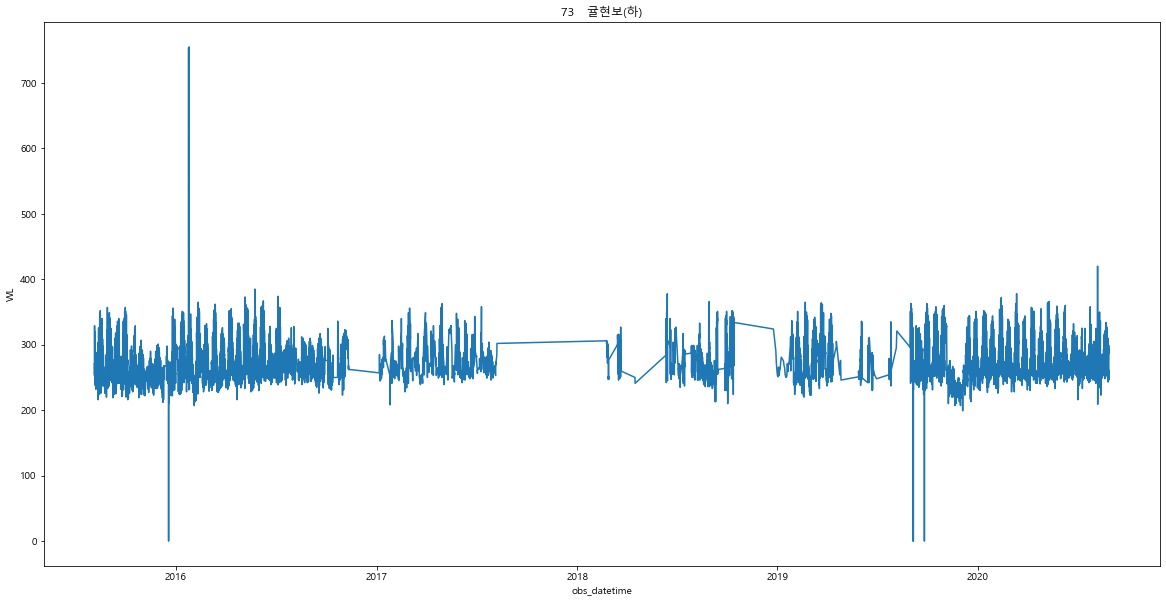

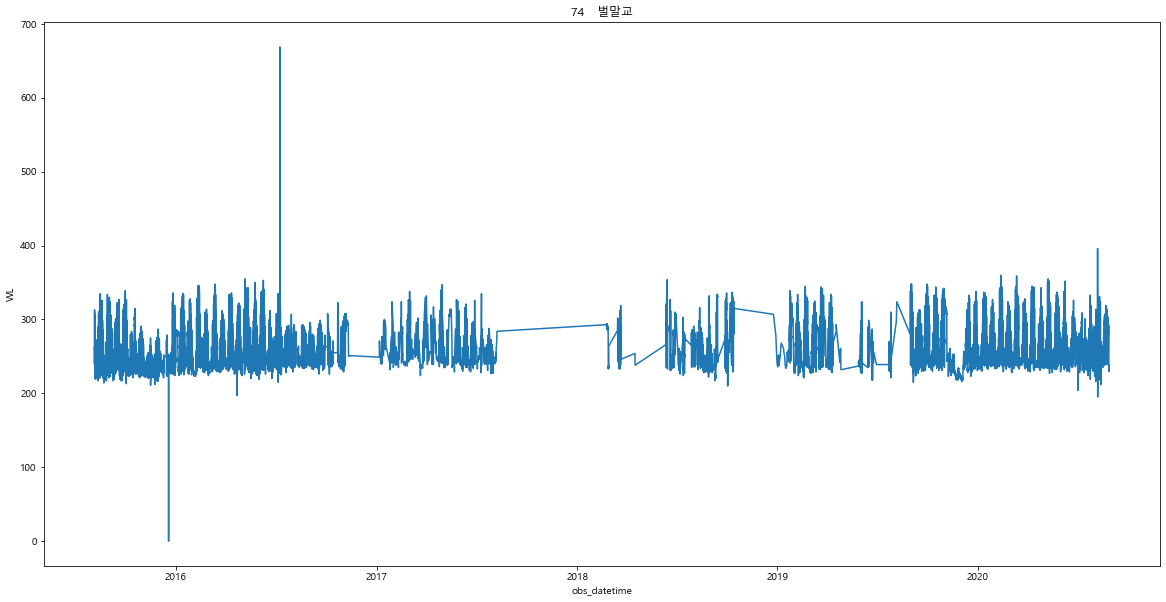

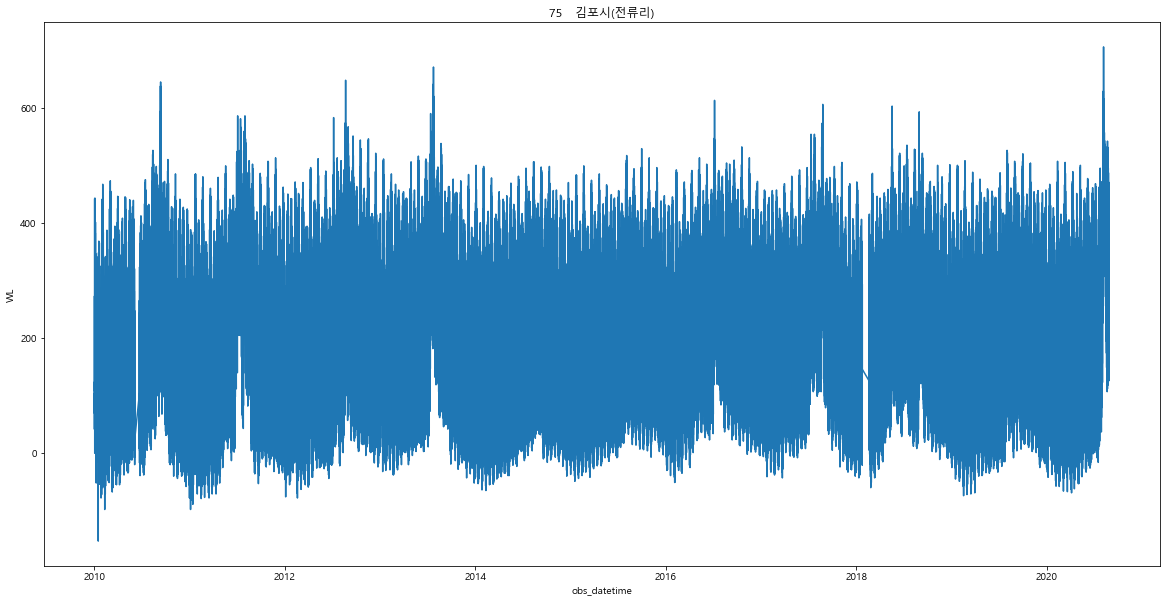

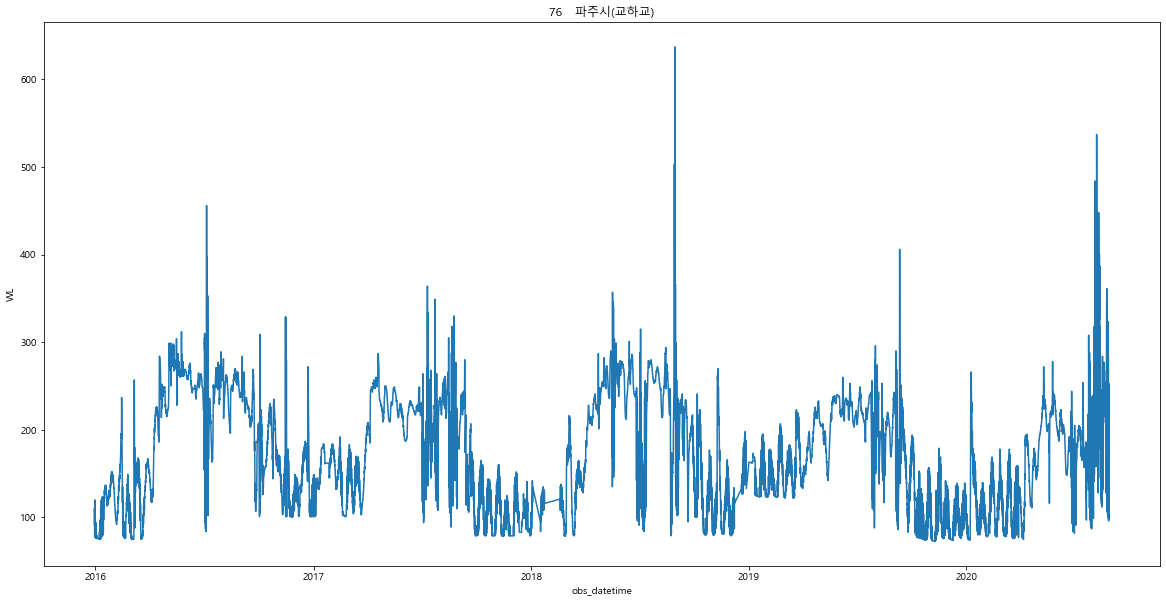

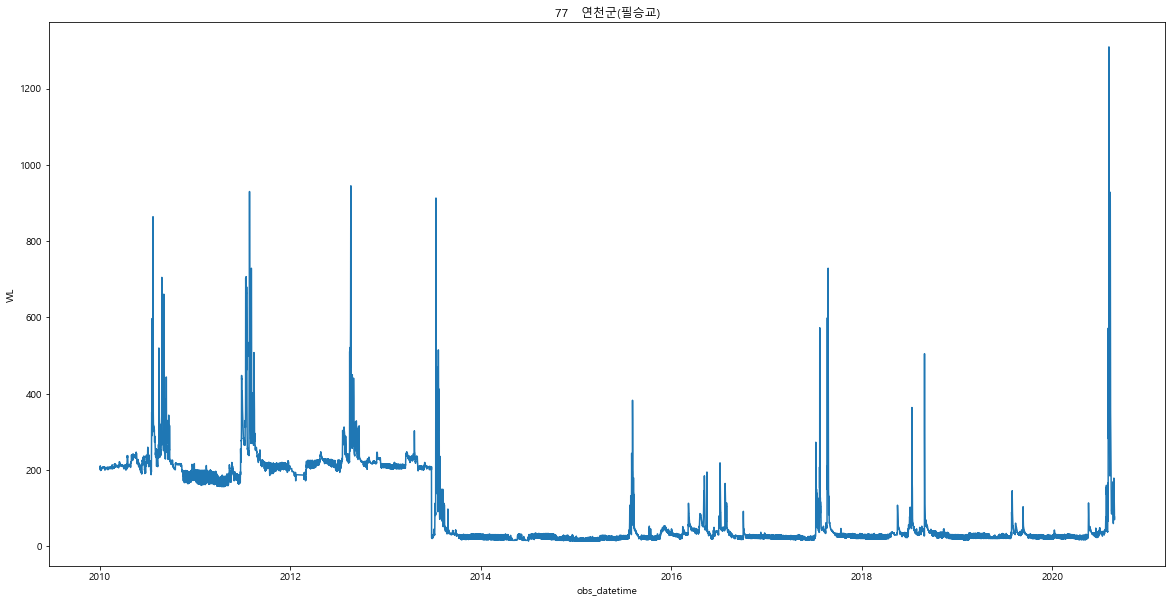

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


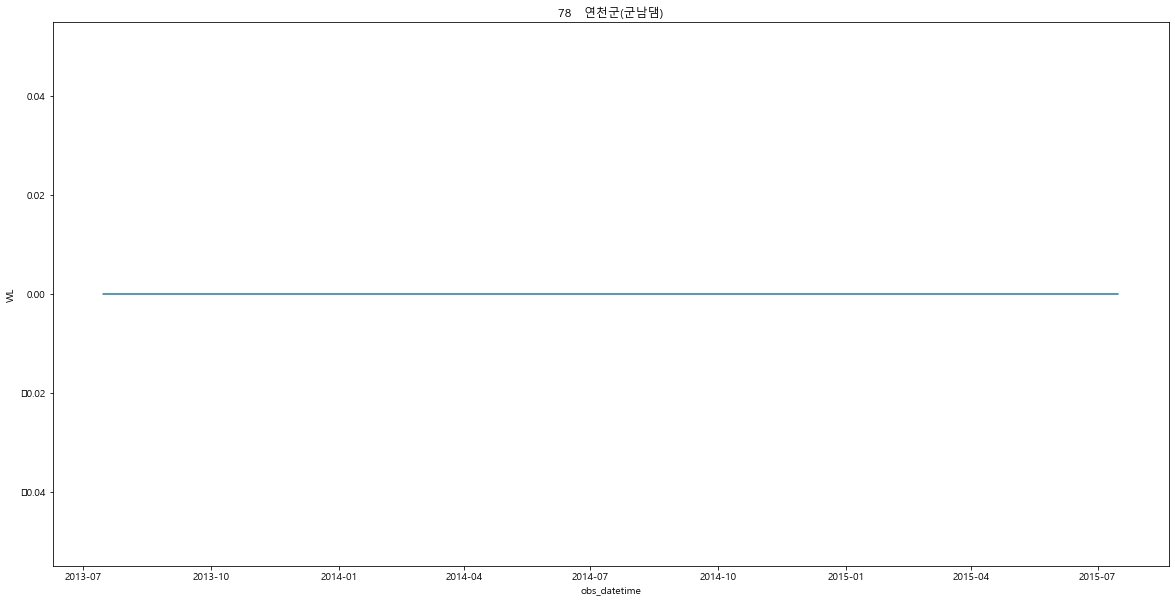

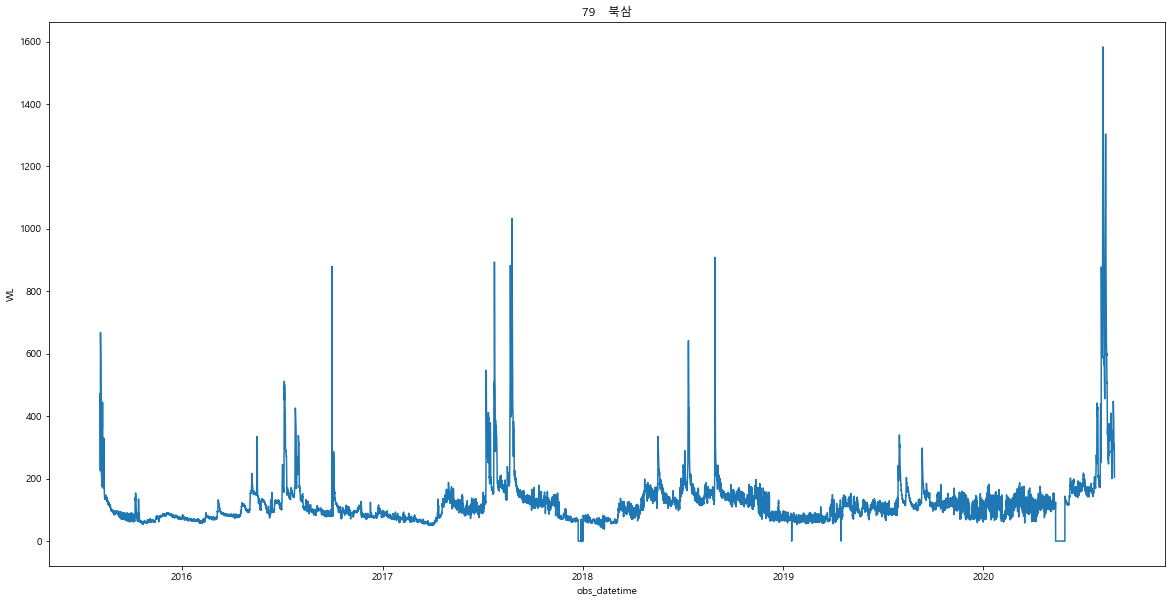

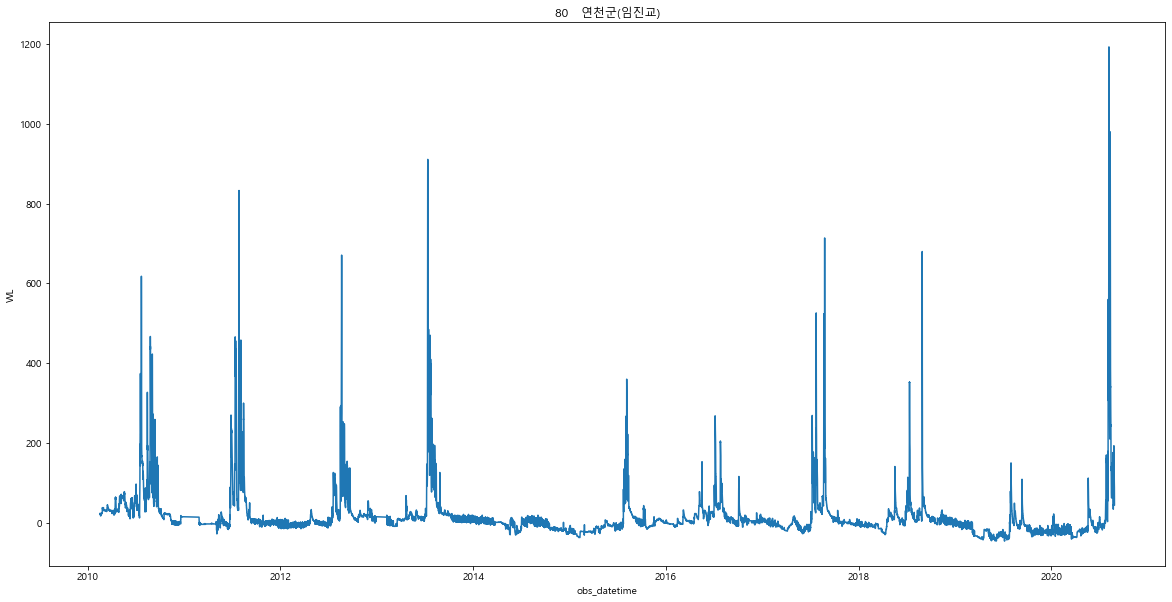

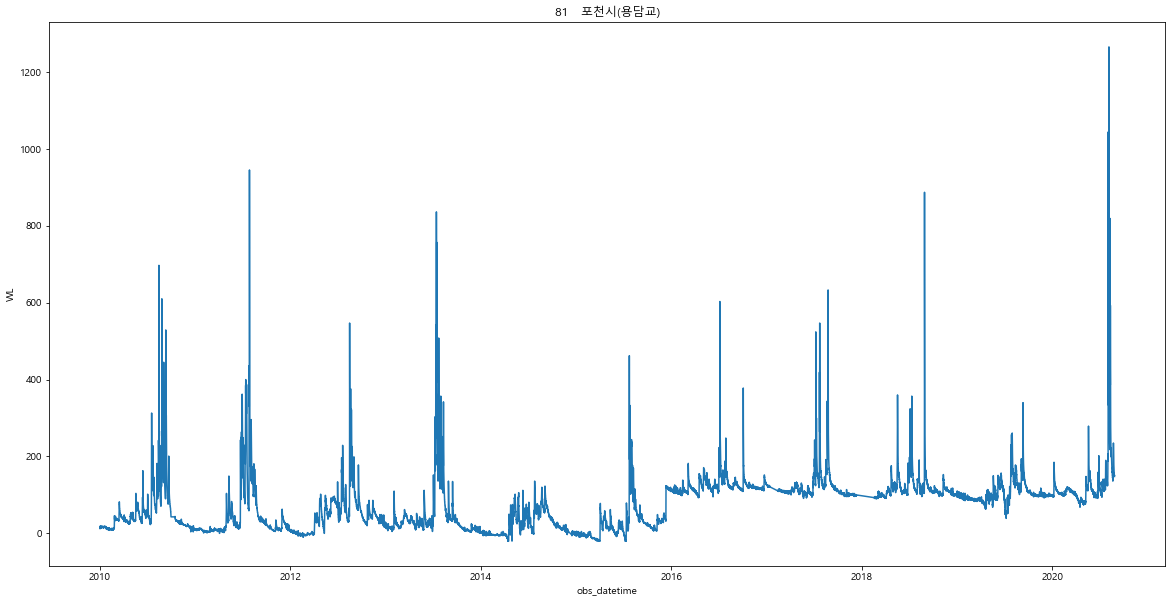

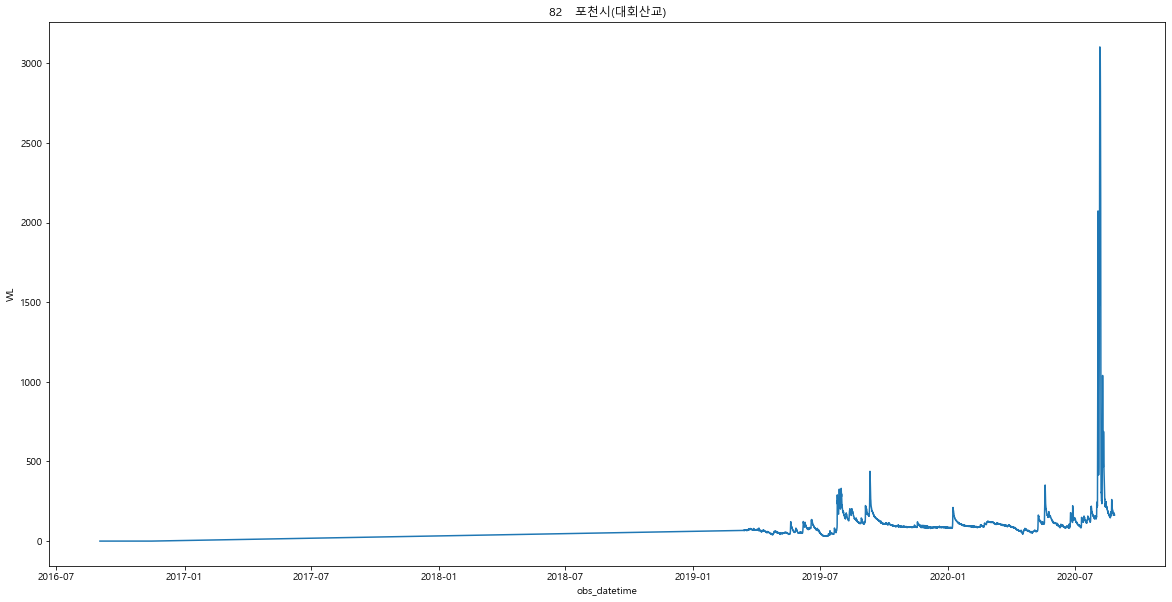

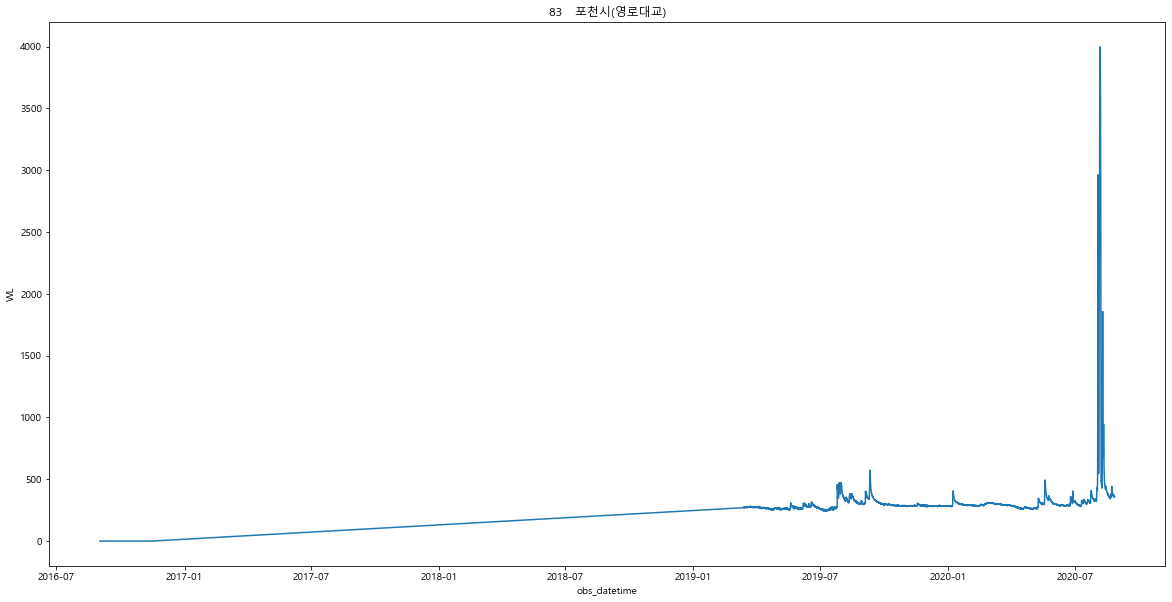

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


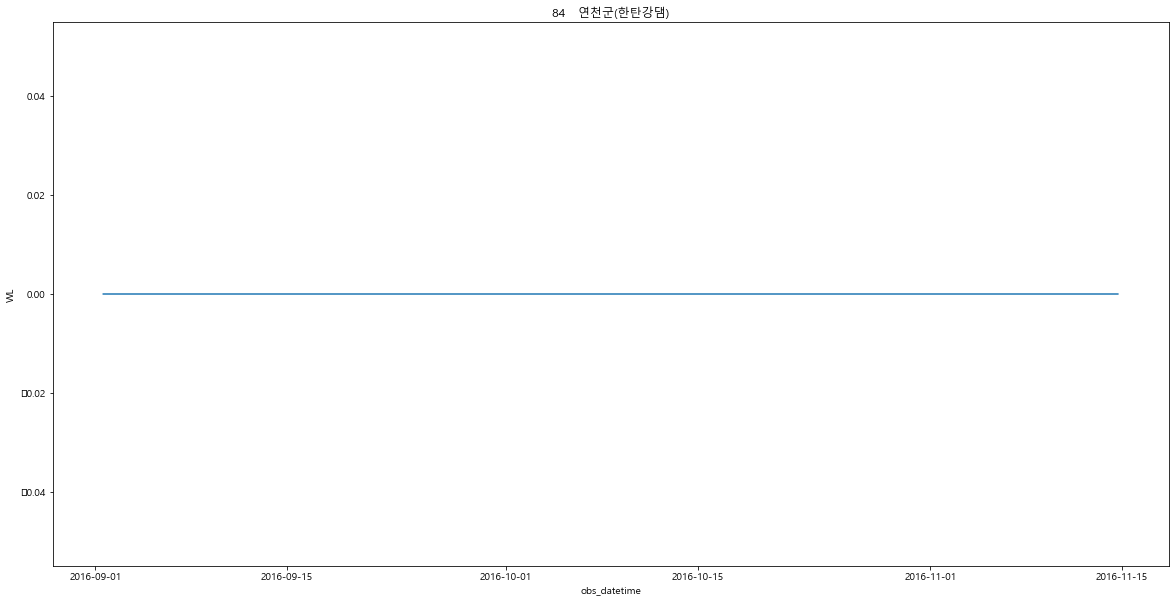

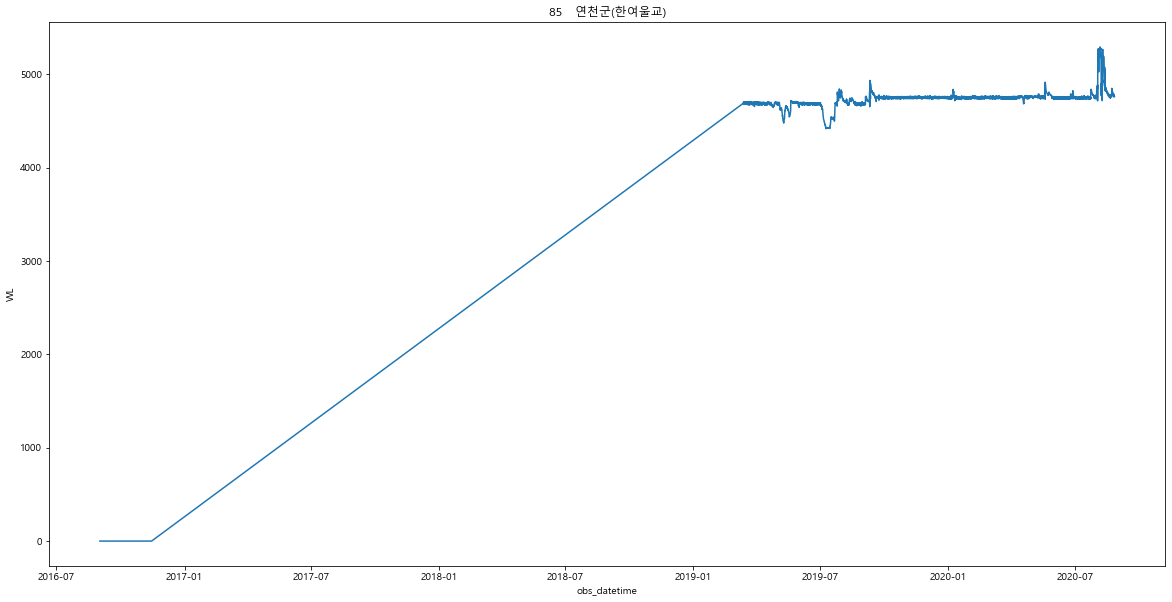

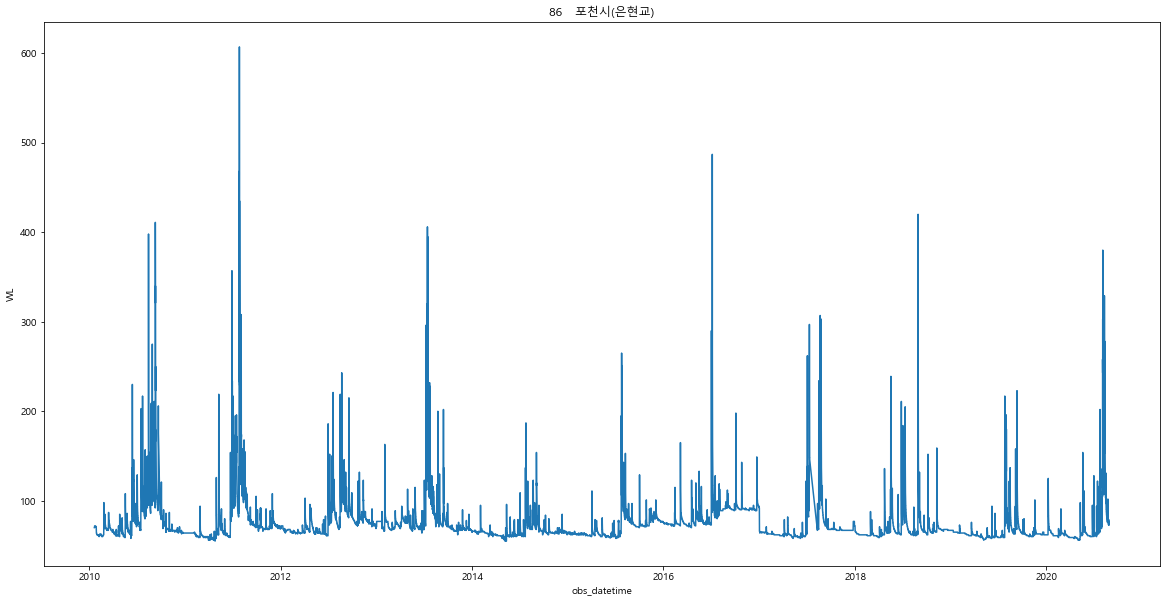

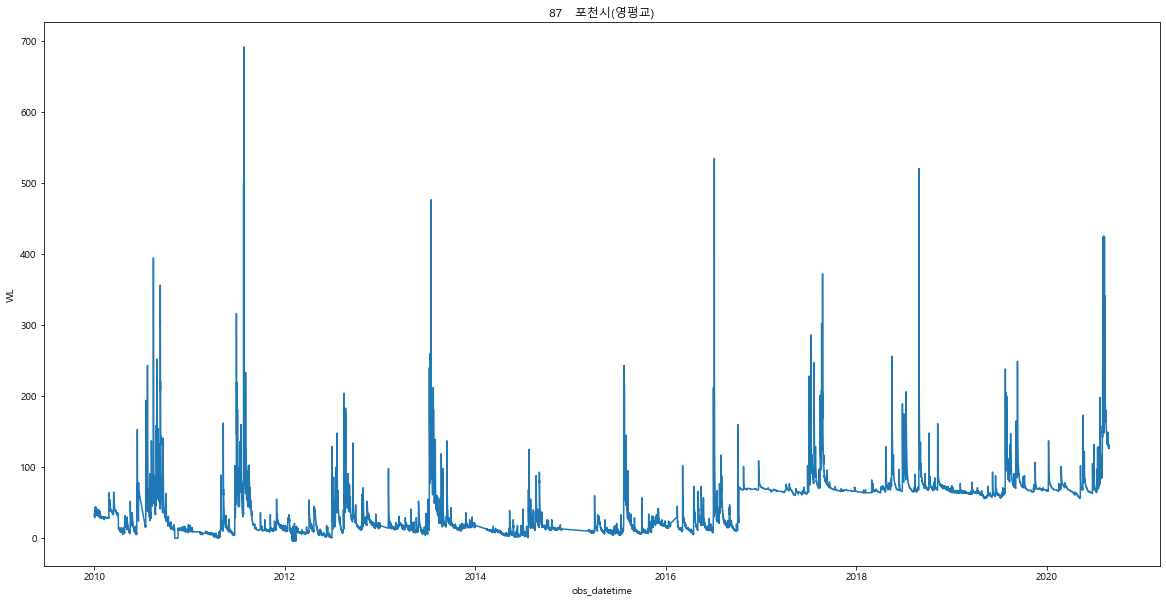

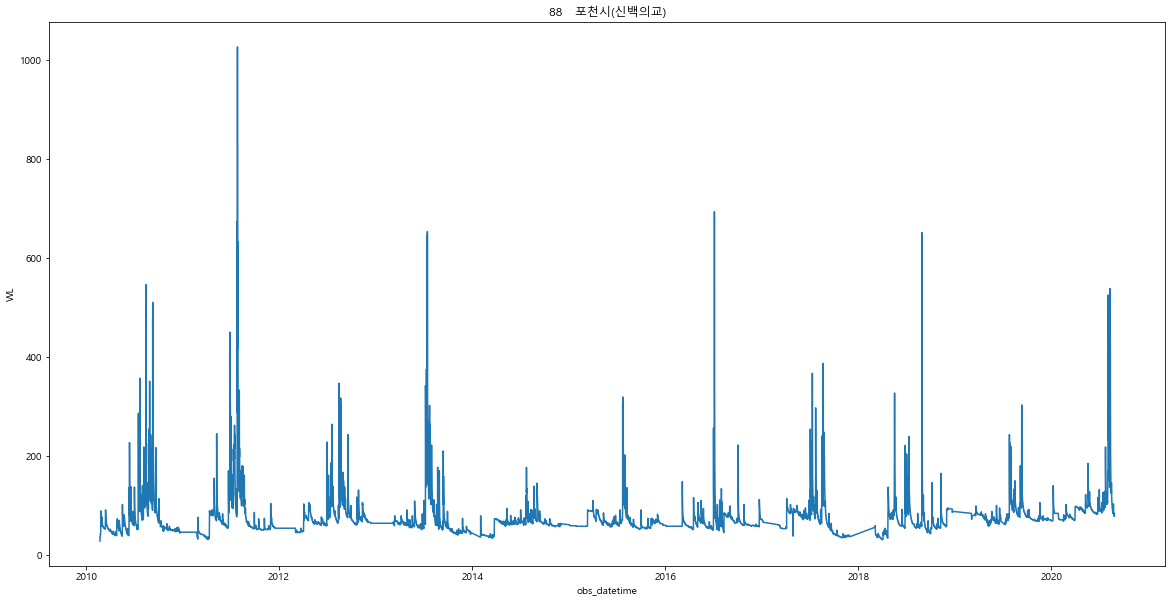

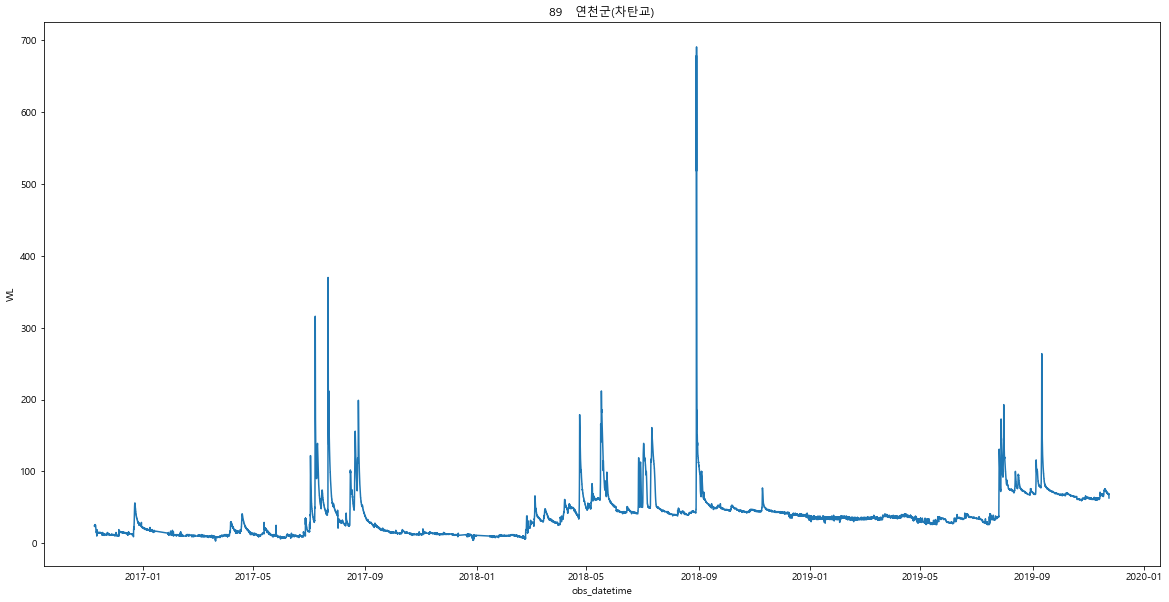

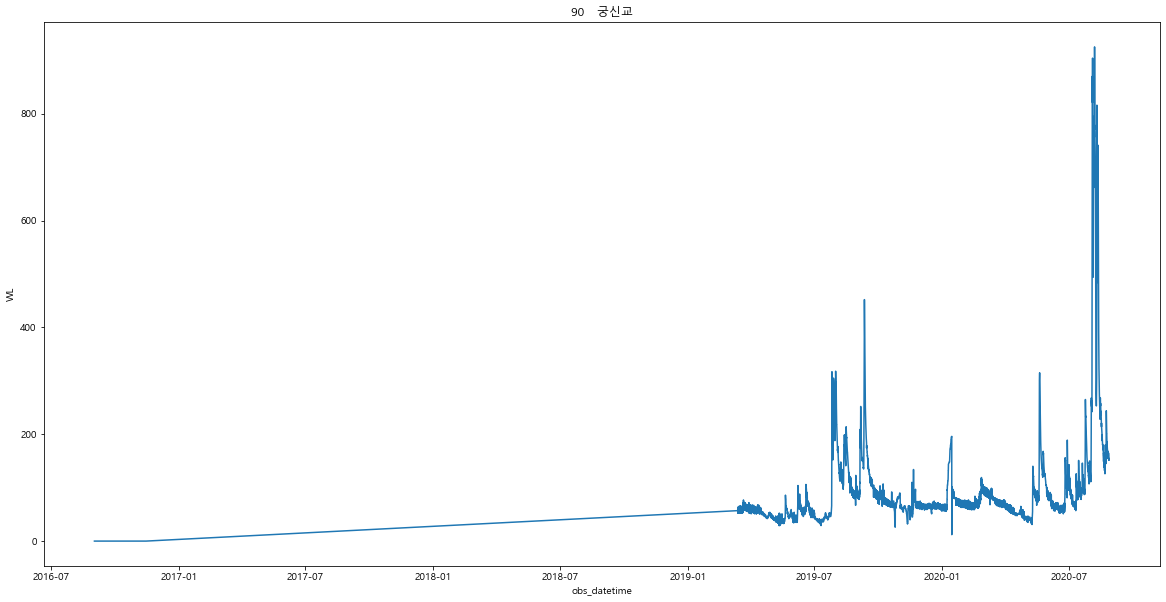

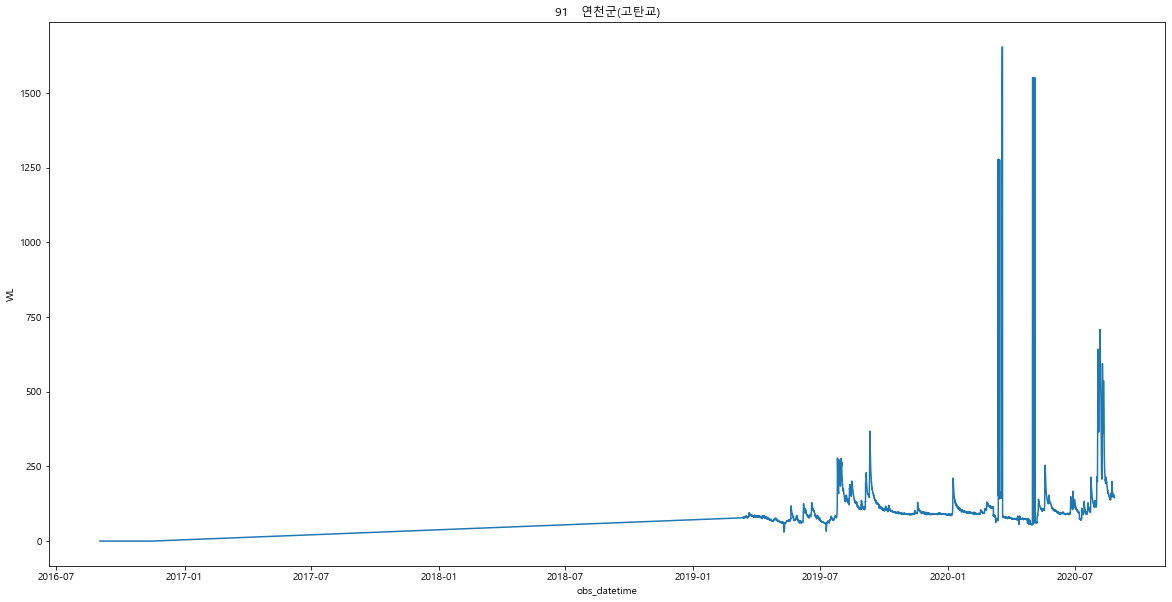

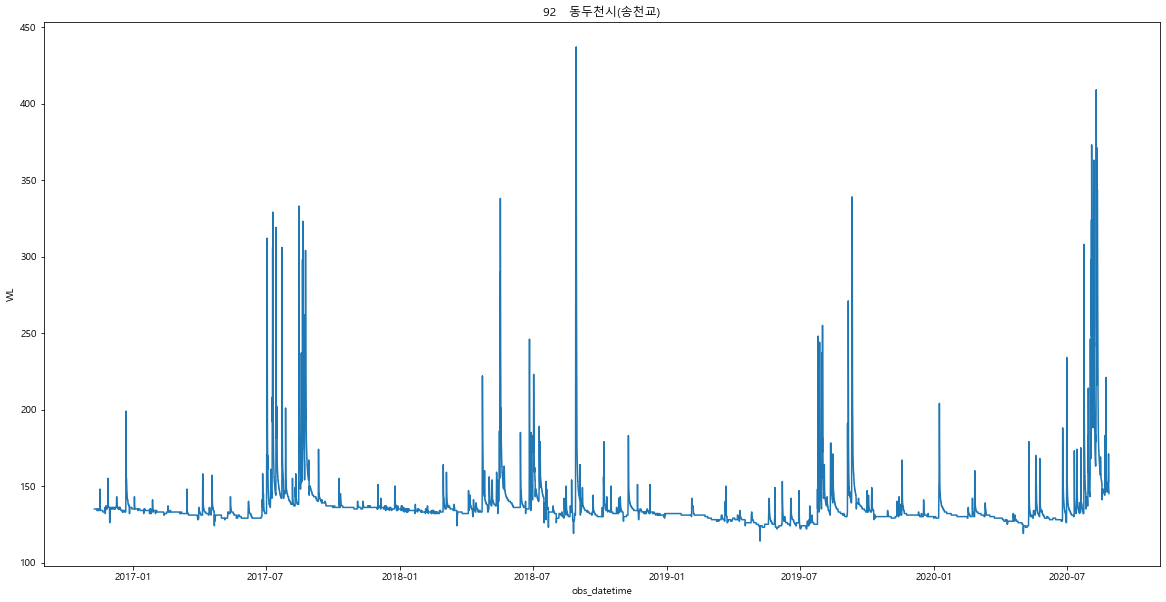

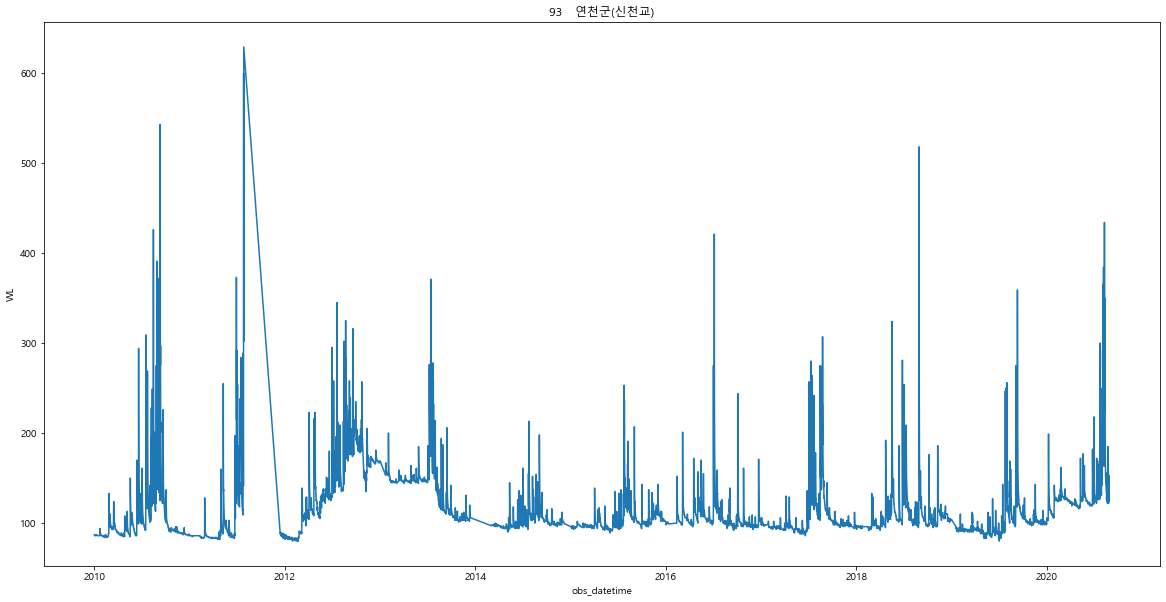

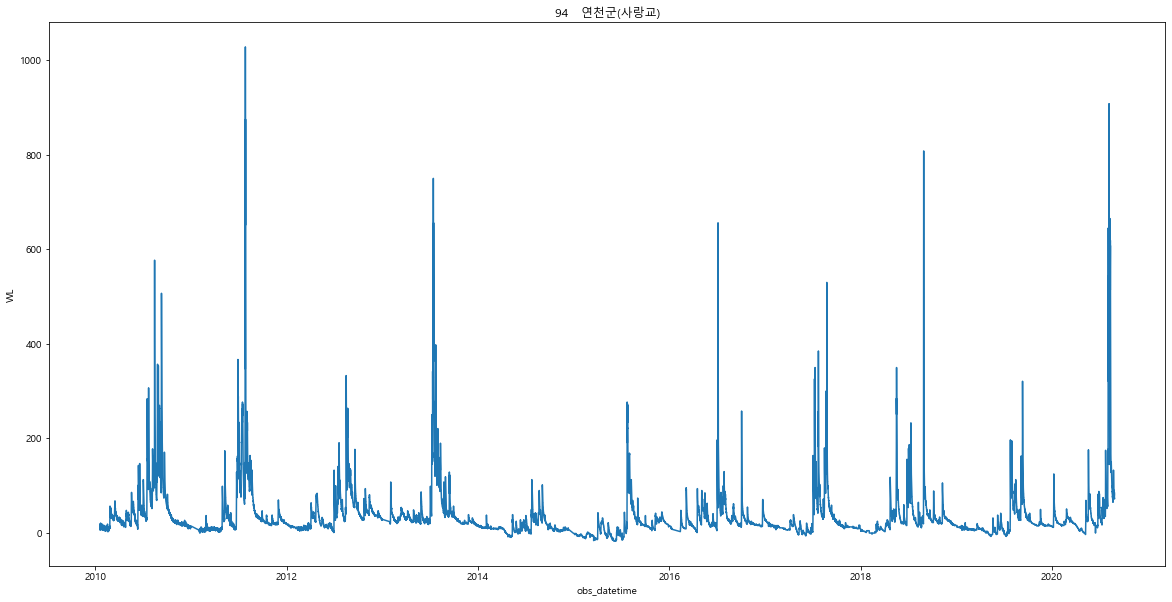

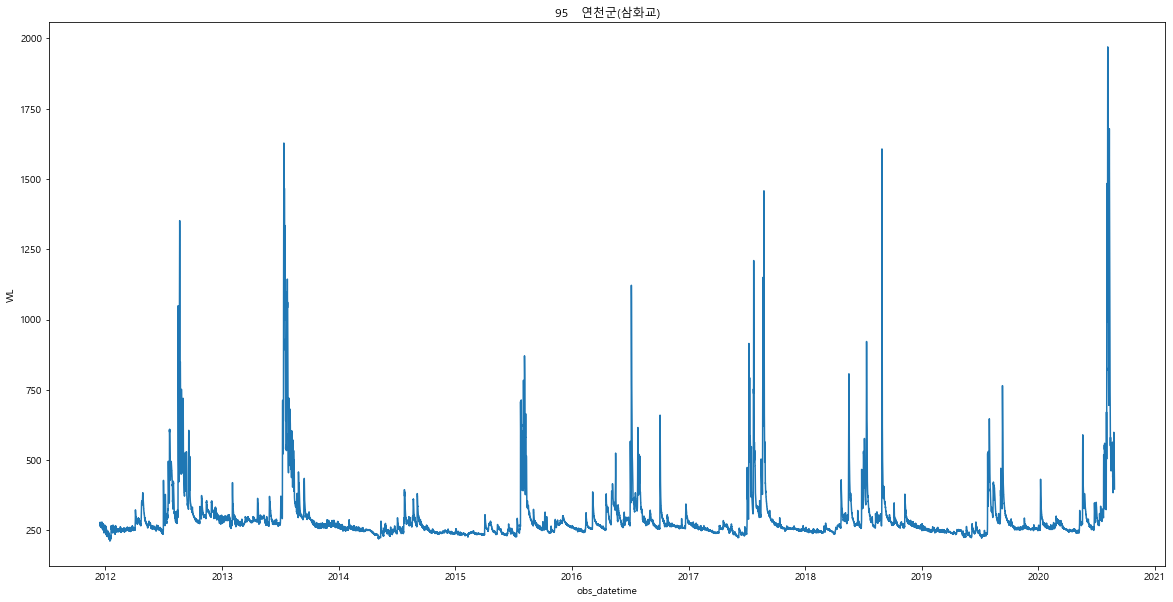

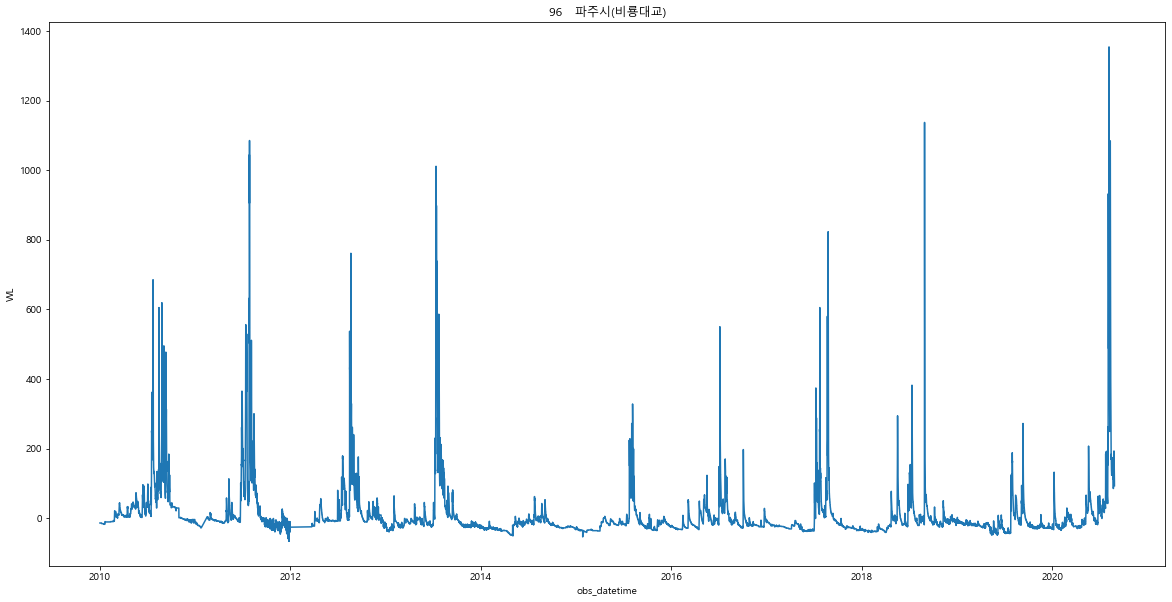

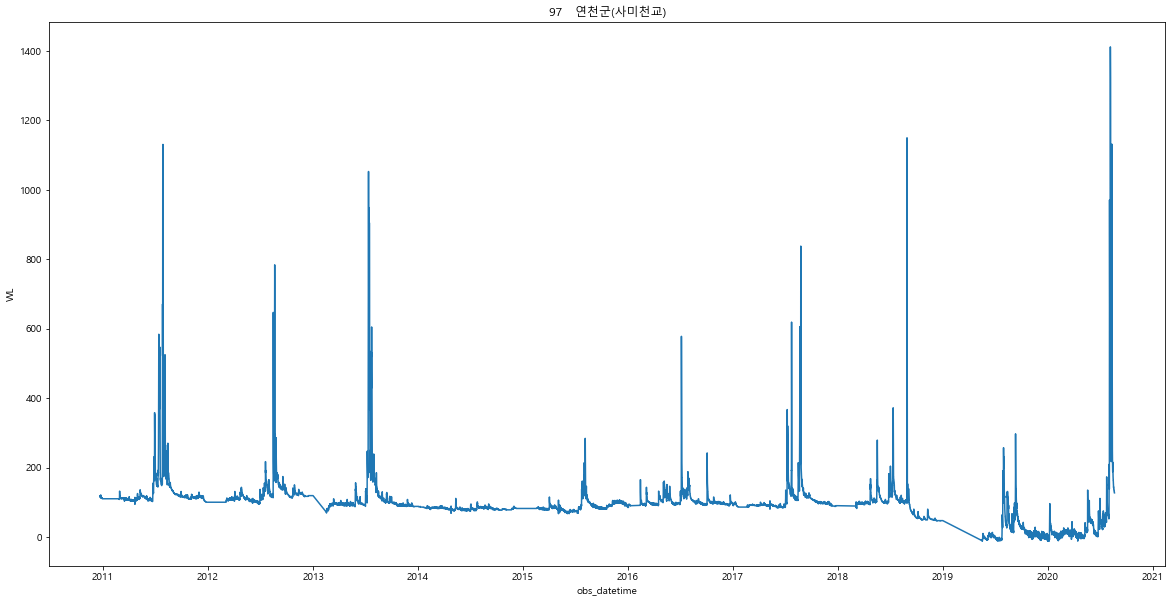

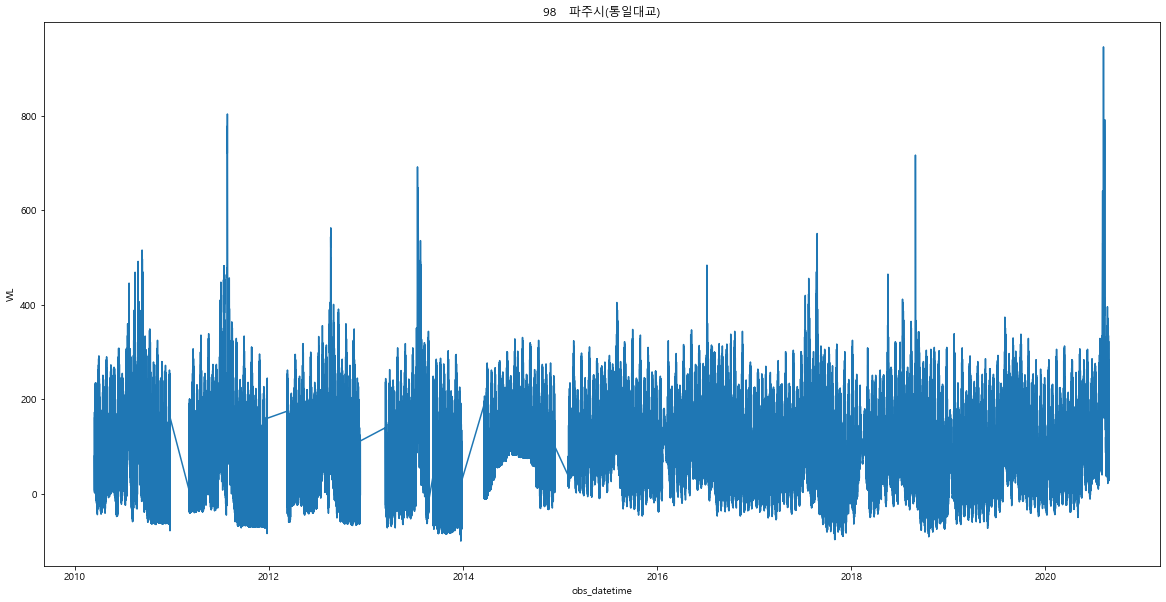

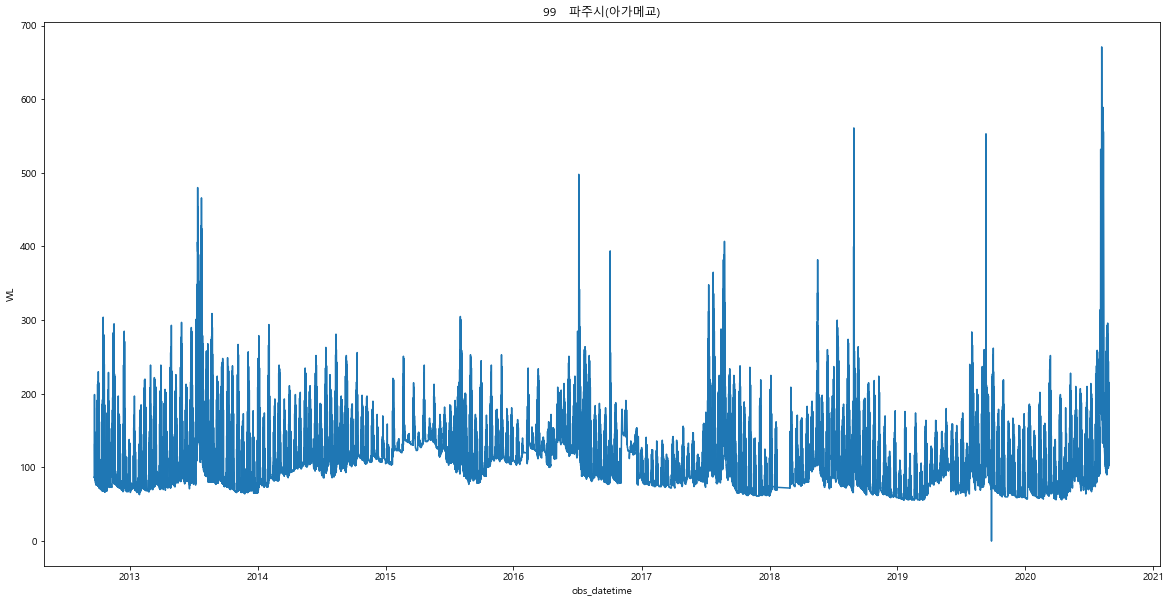

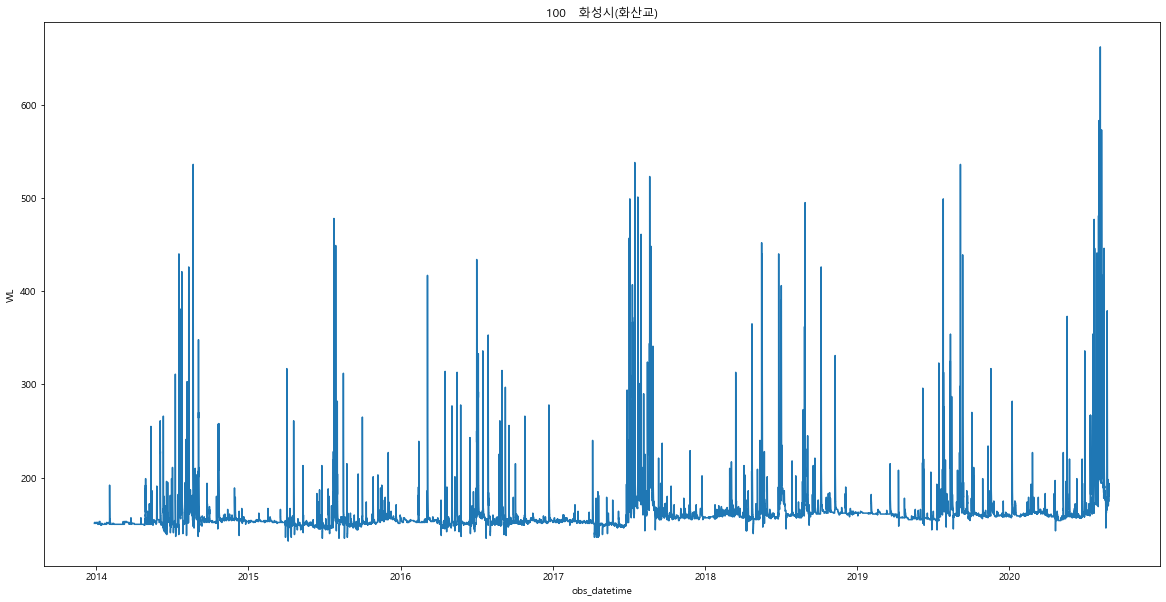

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


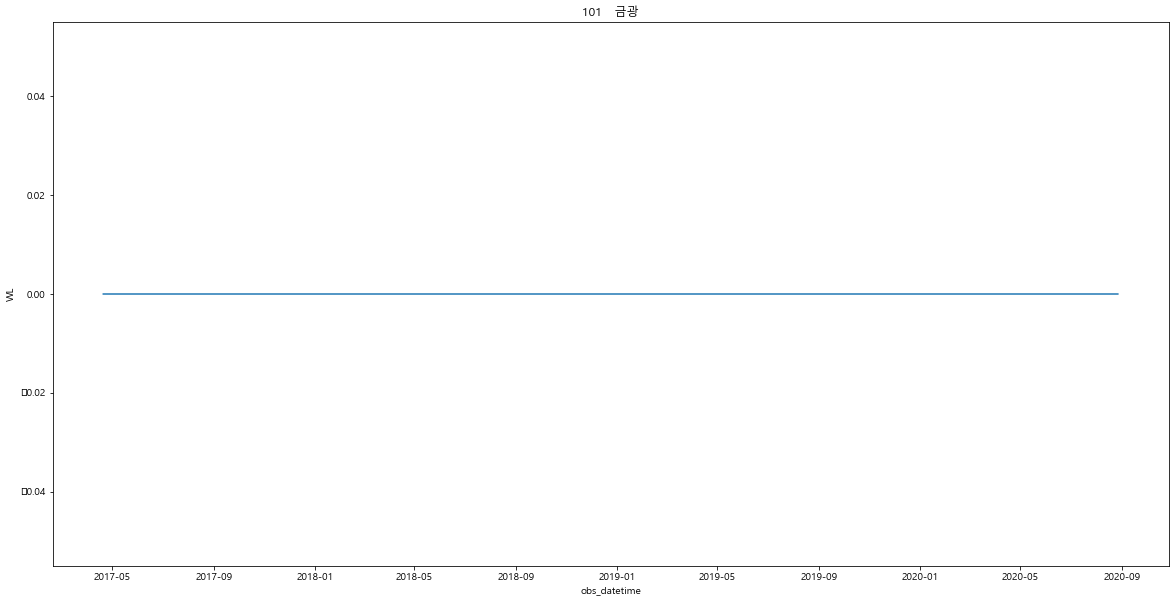

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


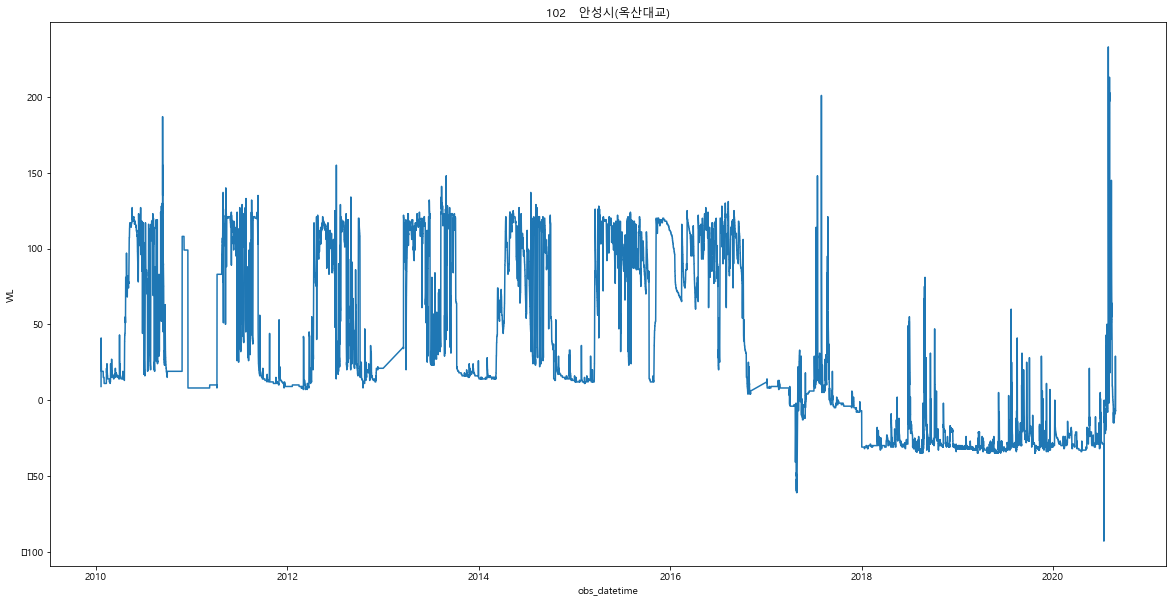

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


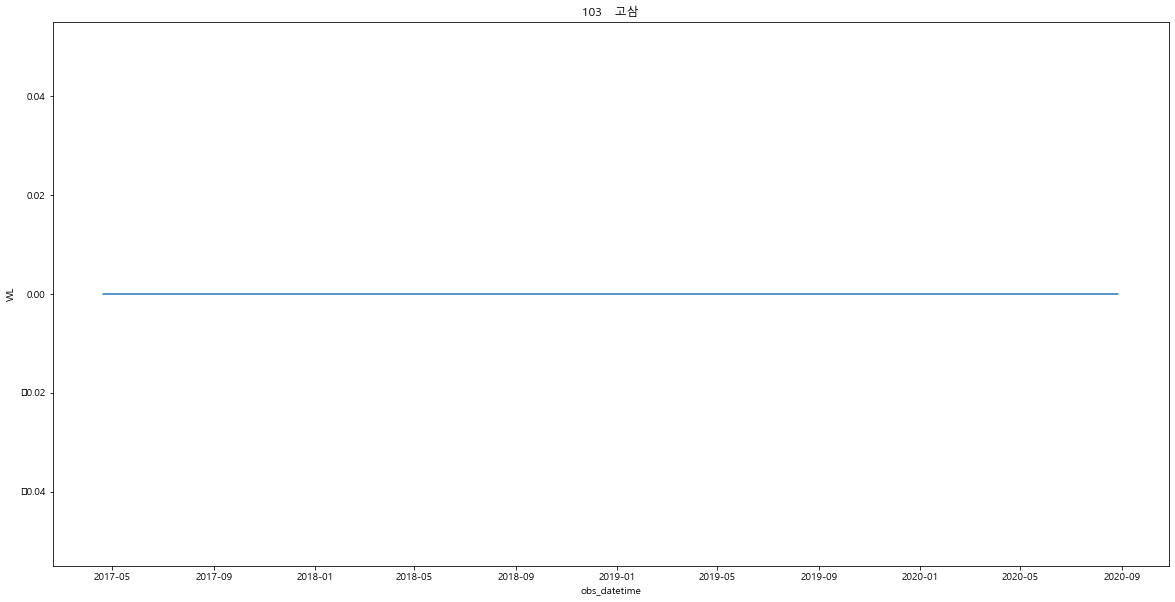

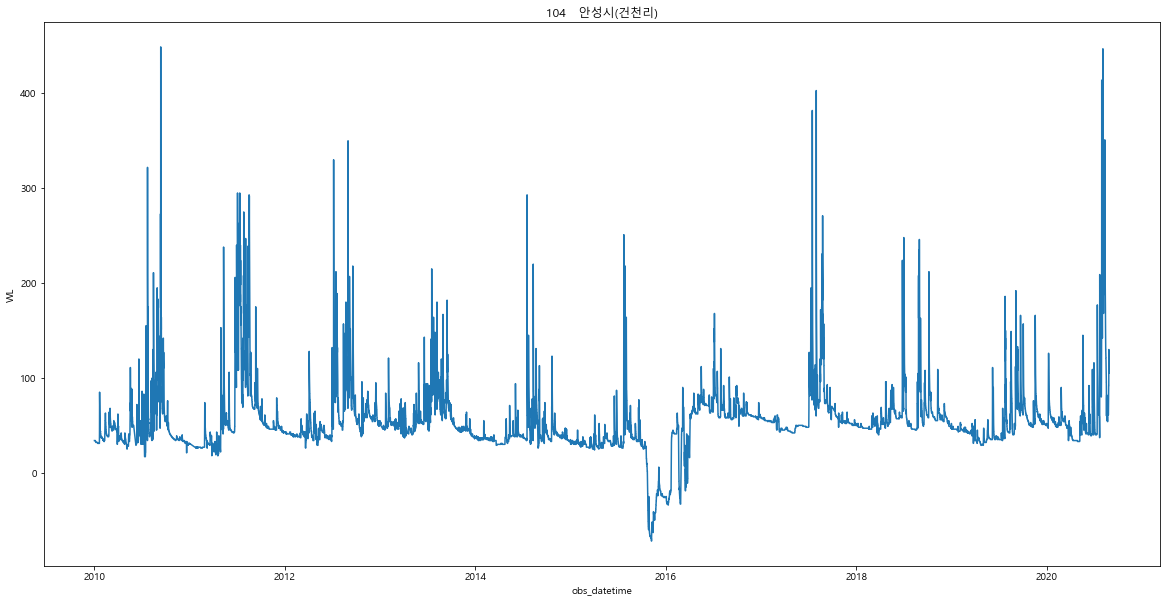

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


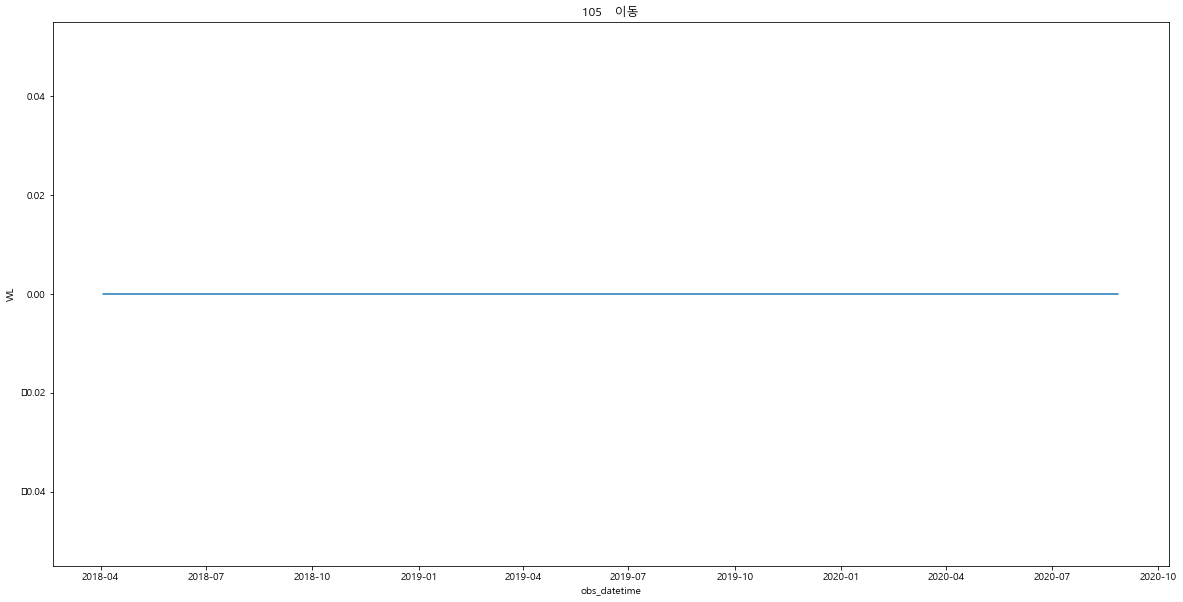

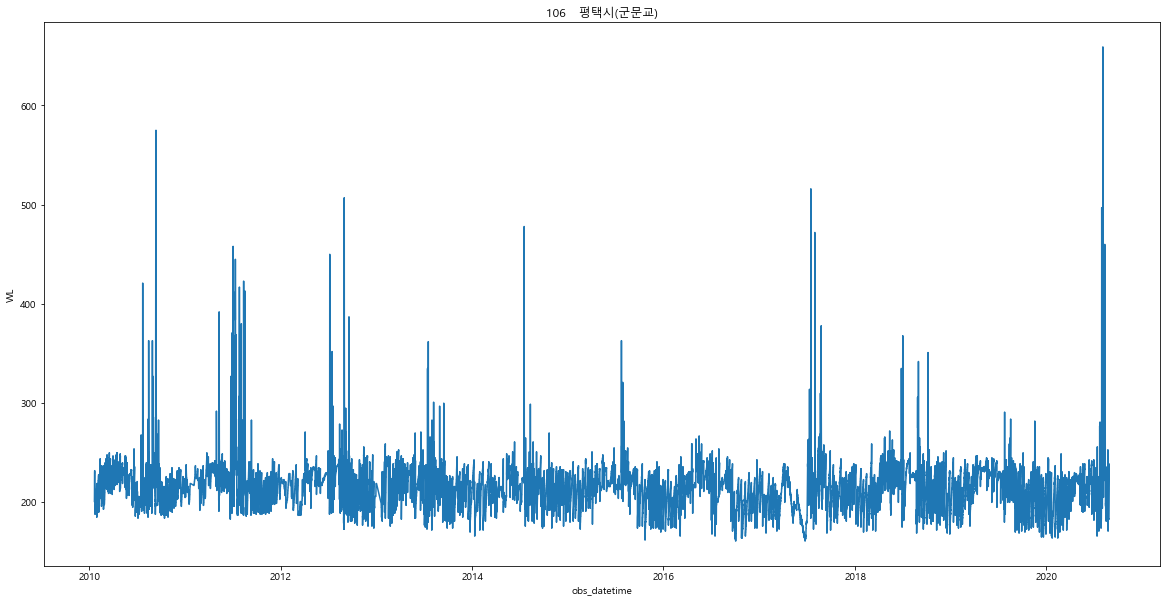

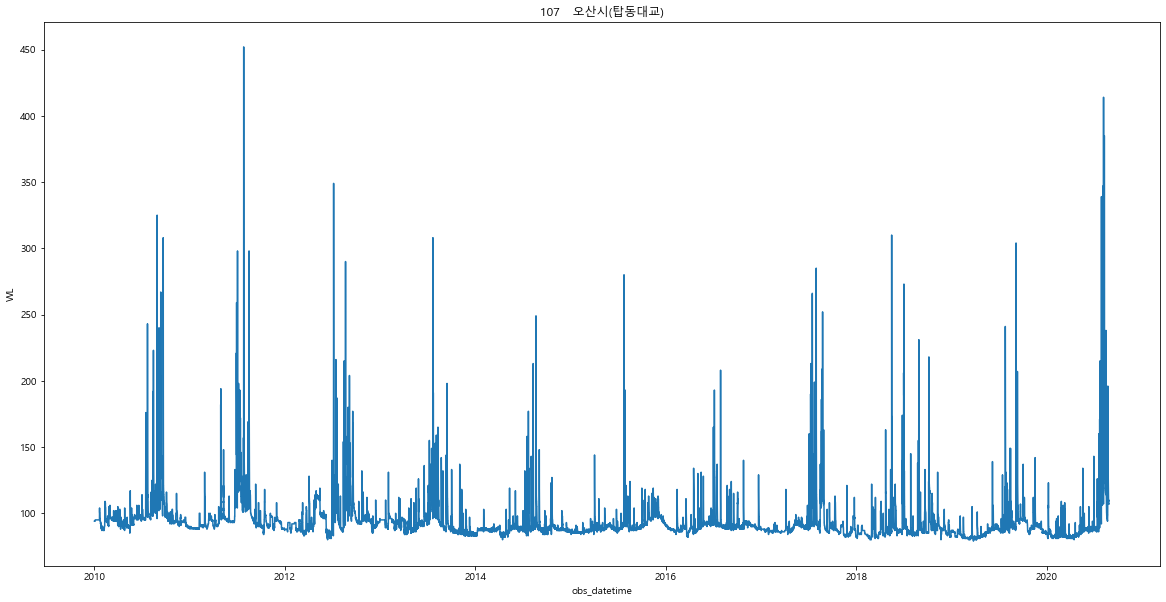

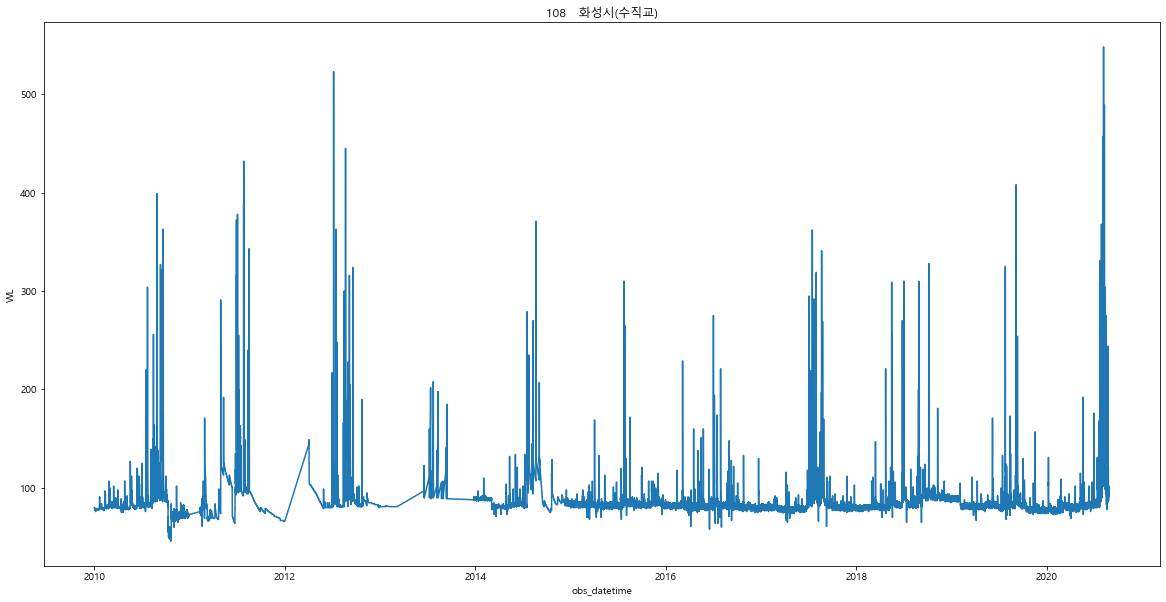

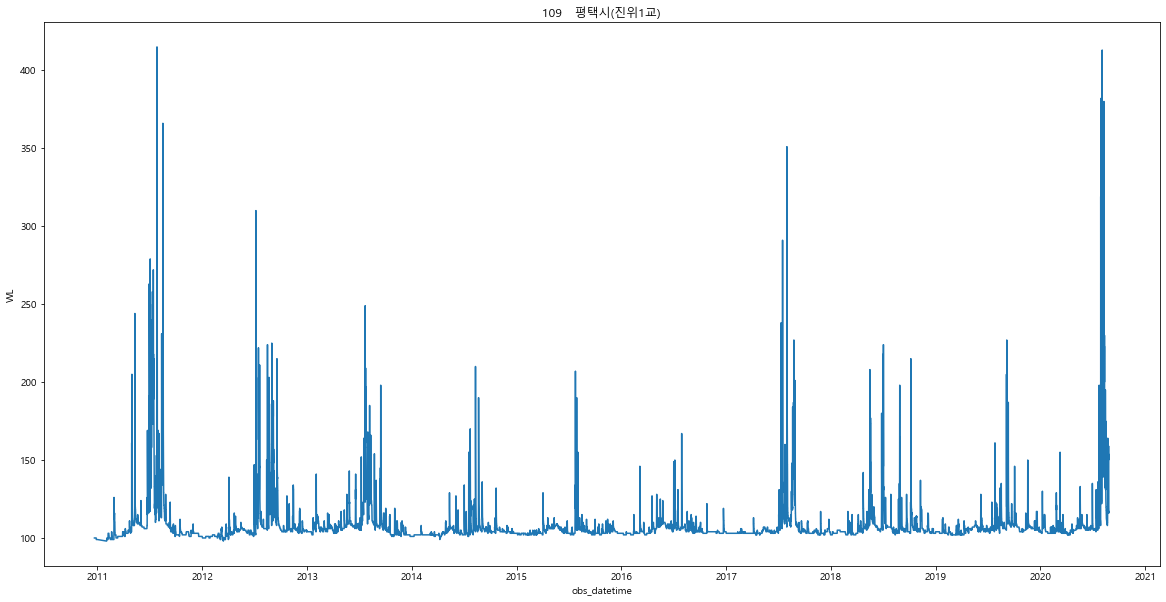

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


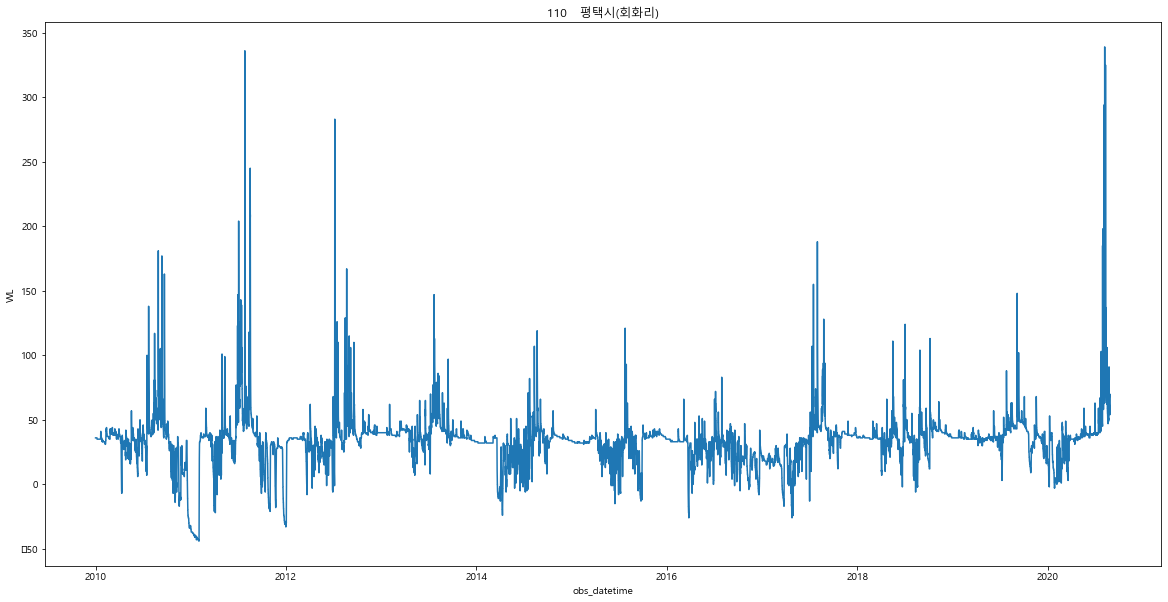

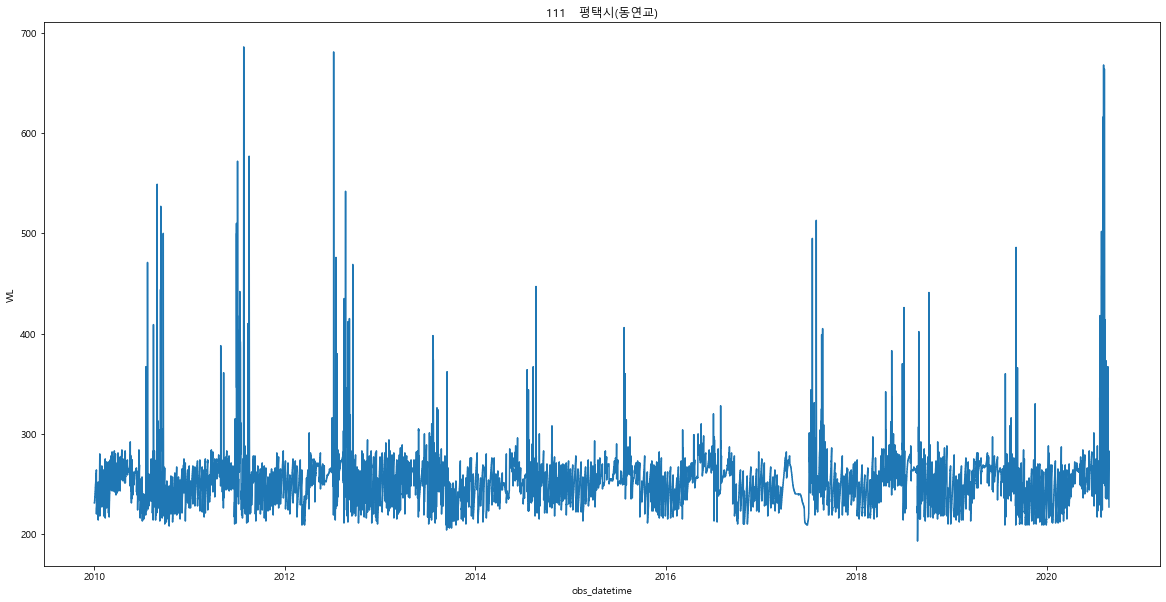

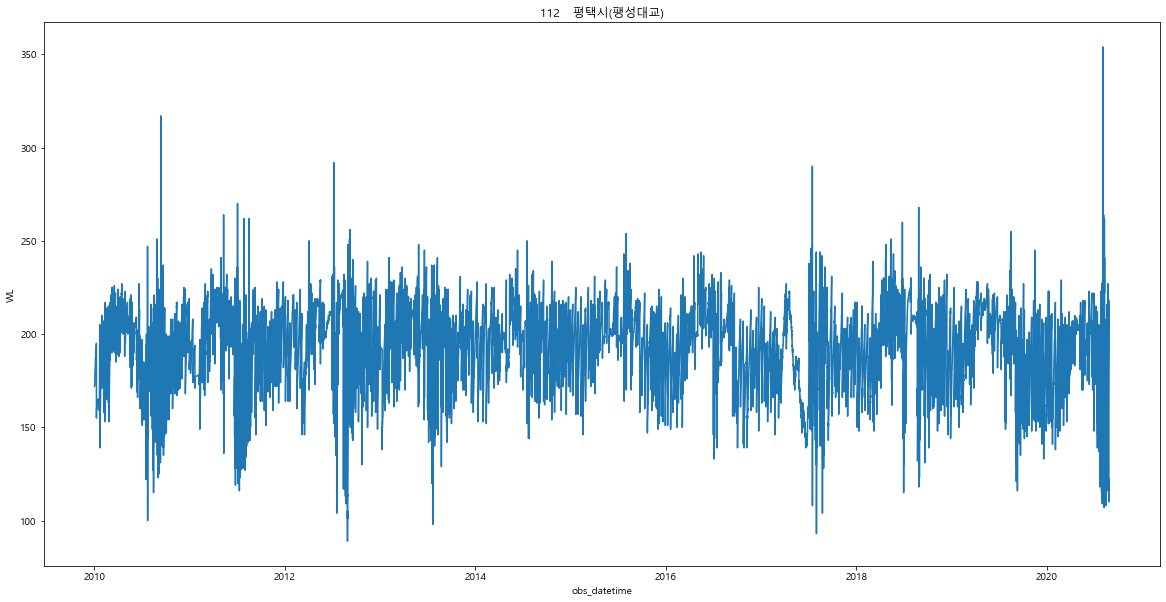

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


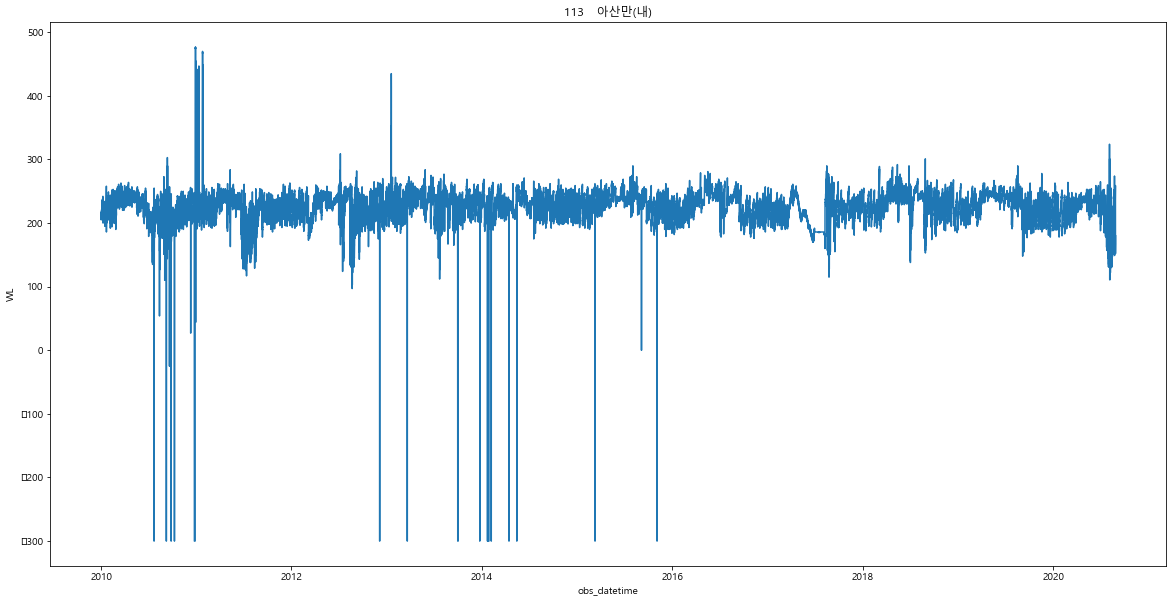

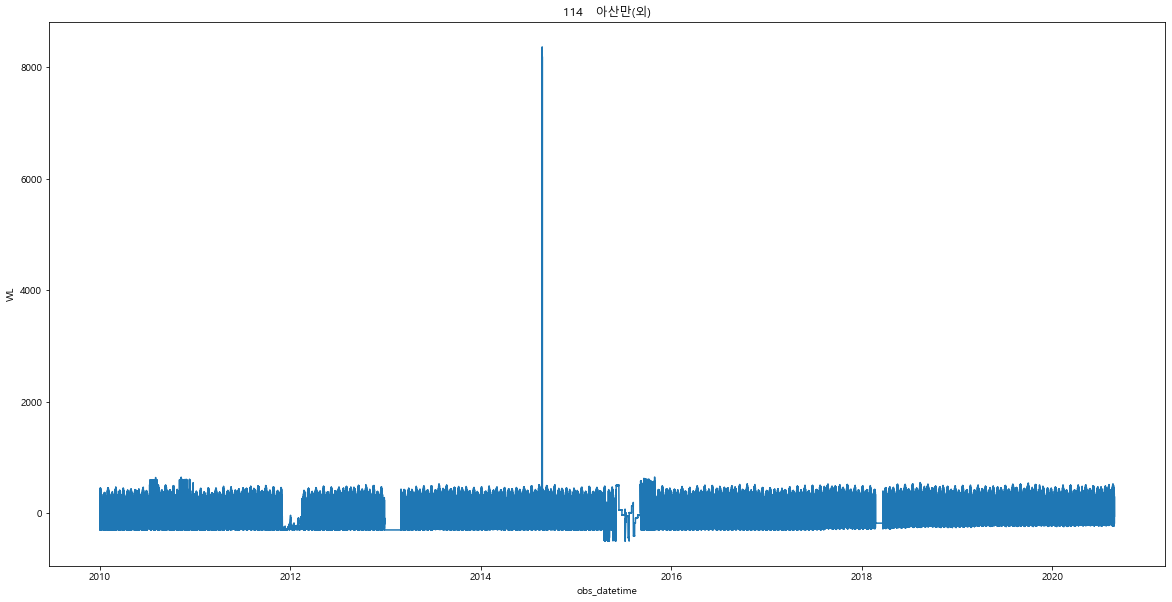

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


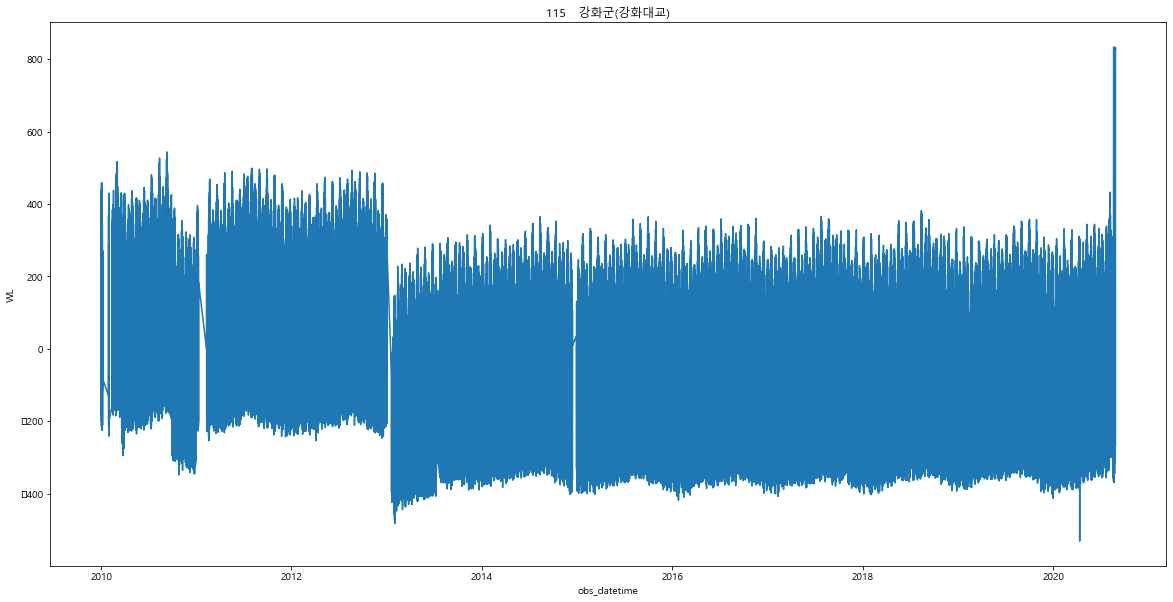

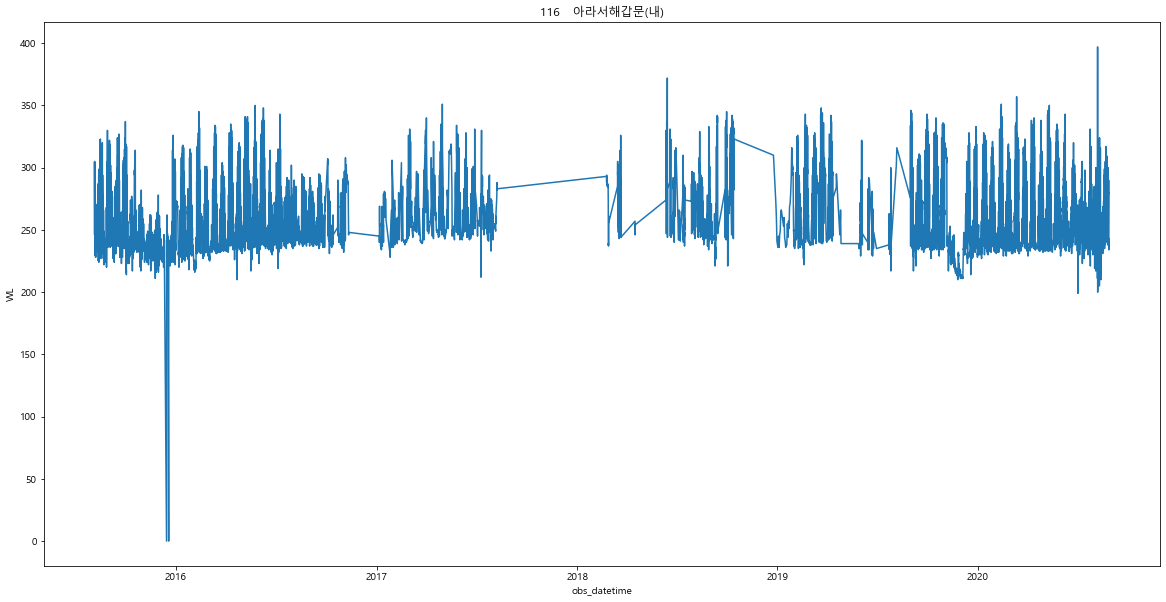

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


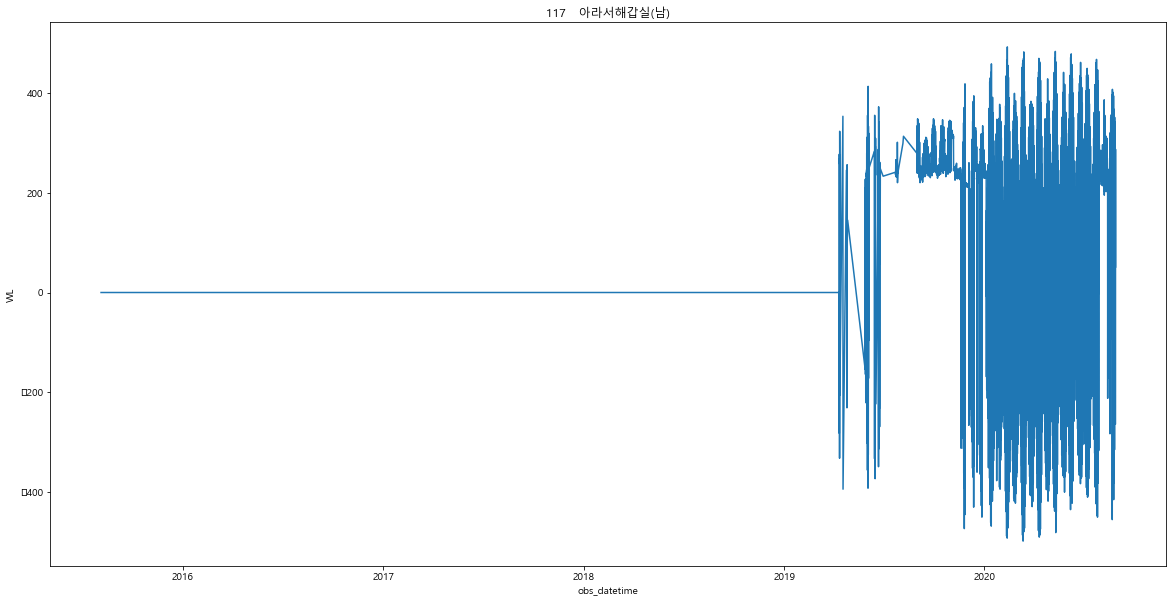

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


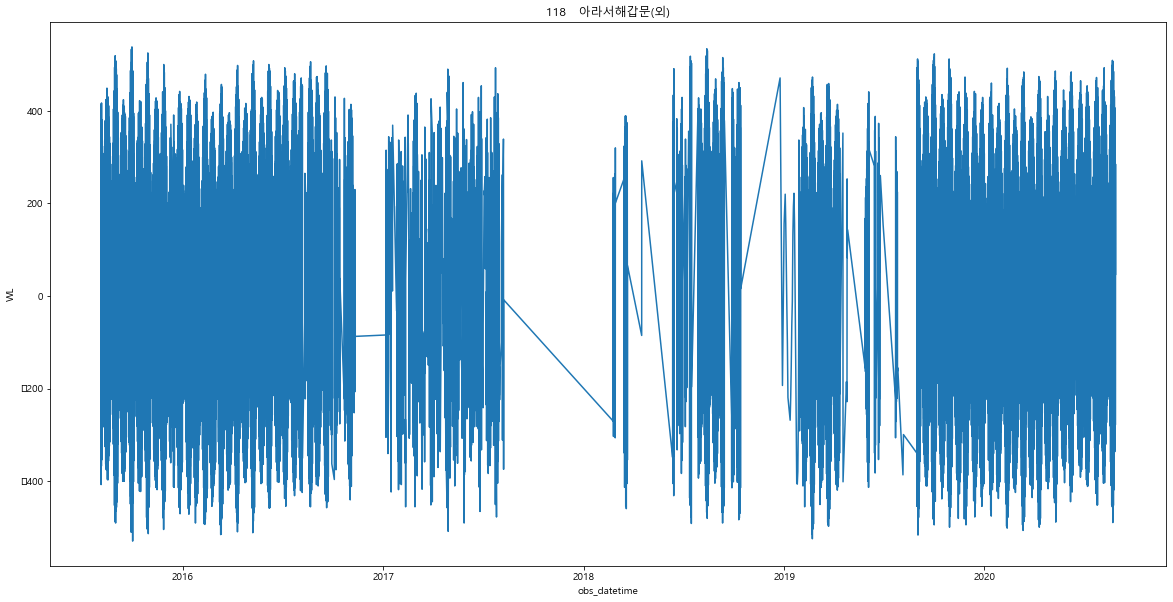

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


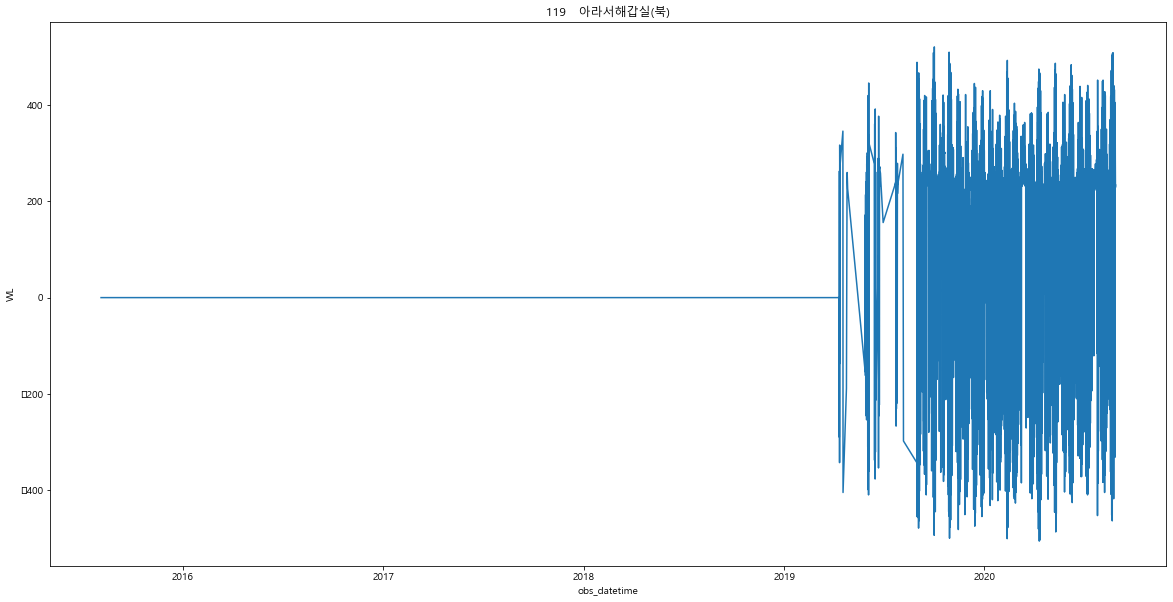

In [37]:
for i in range(120): # 각 관측소마다
    plt.xlabel('obs_datetime') # 시간의 흐름에 따른
    plt.ylabel('WL') # 하천 수위의 변화
    plt.title(str(i) + '   ' + station_name_list[i])
    plt.plot(df_list[i]['obs_date'], df_list[i]['WL'])
    plt.show()

In [ ]:
# 대부분 비슷한 형태를 띠나 독특한 양상을 보이는 그래프들이 있음 -> 원인을 규명하고 어떻게 처리할 것인지
# 기록이 전무하거나 오랜 기간 동안 기록을 하지 않은 관측소들이 있음 -> 제거할 것인지